# CAPSTONE -  EDA BLIND WINE TASTING

As I described in the vino_clean-data_V1, I am working with these two datasets:

- df contains 34814 rows and 12 columns. This data was scraped from the website https://www.winemag.com/?s=&drink_type=wine&page=1
- vino contains 131902 rows and 12 columns. This data was download form Kaggle, last actualization was in March 2019. 

# SMALL WINE  DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns',500)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('small_wine.csv')

In [3]:
df.head()

country                                        description  \
0    France  Buxom and heady, this is a delightfully rich, ...   
1    France  Sultry and silken on the palate, this wine sta...   
2  Portugal  The wine's fine perfumed black plum fruits giv...   
3    France  Veins of vanilla, smoke and toast amplify blac...   
4    France  This juicy, fruit-forward wine drenches the pa...   

                designation  points  price             province      region_1  \
0           Vieilles Vignes      99  114.0  Châteauneuf-du-Pape  Rhône Valley   
1                La Réserve      98  175.0  Châteauneuf-du-Pape  Rhône Valley   
2                       NaN      98  120.0                 Port    Port Blend   
3  Hommage à Henry Tacussel      98   80.0  Châteauneuf-du-Pape  Rhône Valley   
4                   La Muse      97   88.0  Châteauneuf-du-Pape  Rhône Valley   

          taster_name                                              title  \
0  Anna Lee C. Iijima  Domaine de la Janasse 2016 Vieilles Vignes Red...   
1  Anna Lee C. Iijima  Domaine le Clos du Caillou 2016 La Réserve Red...   
2          Roger Voss                                 Fonseca 2017  Port   
3  Anna Lee C. Iijima  Domaine Moulin-Tacussel 2016 Hommage à Henry T...   
4  Anna Lee C. Iijima  Guillaume Gonnet 2016 La Muse Red (Châteauneuf...   

                 variety                      winery  vintage  
0  Rhône-style Red Blend       Domaine de la Janasse   2016.0  
1  Rhône-style Red Blend  Domaine le Clos du Caillou   2016.0  
2                   Port                     Fonseca   2017.0  
3               Grenache     Domaine Moulin-Tacussel   2016.0  
4  Rhône-style Red Blend            Guillaume Gonnet   2016.0

In [4]:
df.describe(include='all')

country                                        description designation  \
count    34813                                              34814       25652   
unique      40                                              34805       15763   
top         US  Dark-skinned fruit, truffle, fragrant blue flo...     Reserve   
freq     12509                                                  2         358   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

              points         price              province       region_1  \
count   34814.000000  34814.000000                 34814          34814   
unique           NaN           NaN                  1112            146   
top              NaN           NaN  Columbia Valley (WA)  Central Coast   
freq             NaN           NaN                   857           2974   
mean       89.272448     39.219447                   NaN            NaN   
std         2.902285     45.440288                   NaN            NaN   
min        80.000000      4.000000                   NaN            NaN   
25%        87.000000     19.000000                   NaN            NaN   
50%        89.000000     29.000000                   NaN            NaN   
75%        91.000000     48.000000                   NaN            NaN   
max        99.000000   2950.000000                   NaN            NaN   

       taster_name                                              title  \
count        34814                                              34814   
unique          18                                              34693   
top     Roger Voss  Domaine François Schmitt NV Rosé Sparkling (Cr...   
freq          7026                                                  2   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

           variety    winery       vintage  
count        34814     34814  32271.000000  
unique         542      8441           NaN  
top     Pinot Noir  Maryhill           NaN  
freq          3804        88           NaN  
mean           NaN       NaN   2015.660221  
std            NaN       NaN     28.017389  
min            NaN       NaN   1010.000000  
25%            NaN       NaN   2015.000000  
50%            NaN       NaN   2016.000000  
75%            NaN       NaN   2017.000000  
max            NaN       NaN   6644.000000

## Distribution of the Wine Prices and Points

- There is a huge difference between the wine prices from \\$4 to \\$2905 
- The mean is \\$39.21 higher if we compare with the 50% value that is \\$29 
- There are many outliers in the prices because of the presence of some expensive wines in France wineries.

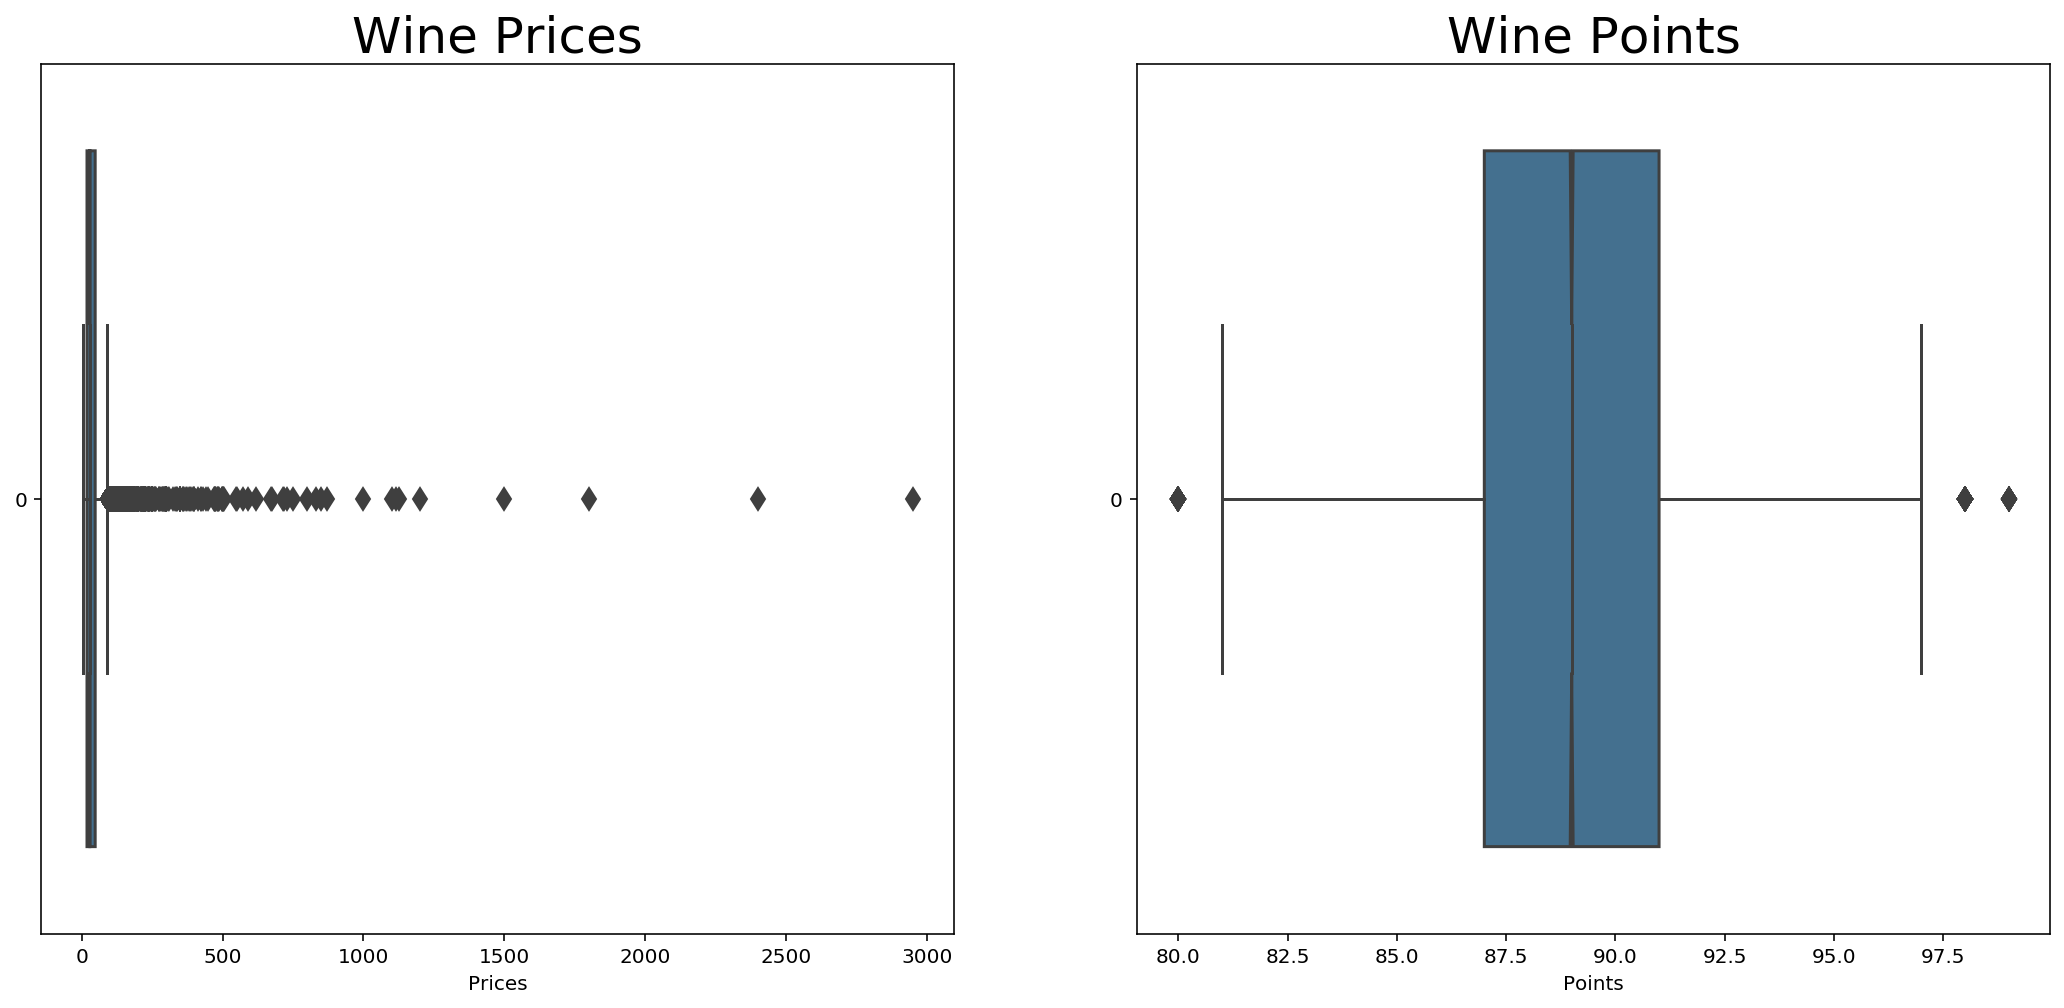

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(data=df.price, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax[0])
sns.boxplot(data=df.points, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax[1])
ax[0].set_title('Wine Prices', fontsize=25)
ax[1].set_title('Wine Points', fontsize=25)
ax[0].set_xlabel('Prices')
ax[1].set_xlabel('Points')



plt.show()


In [6]:
price_500 = df[df["price"]<500].price.value_counts()
df1 = pd.DataFrame({'price': price_500.index,'number of wines': price_500.values})

In [7]:
point = df.points.value_counts()
df2 = pd.DataFrame({'points': point.index, 'number of points':point.values})


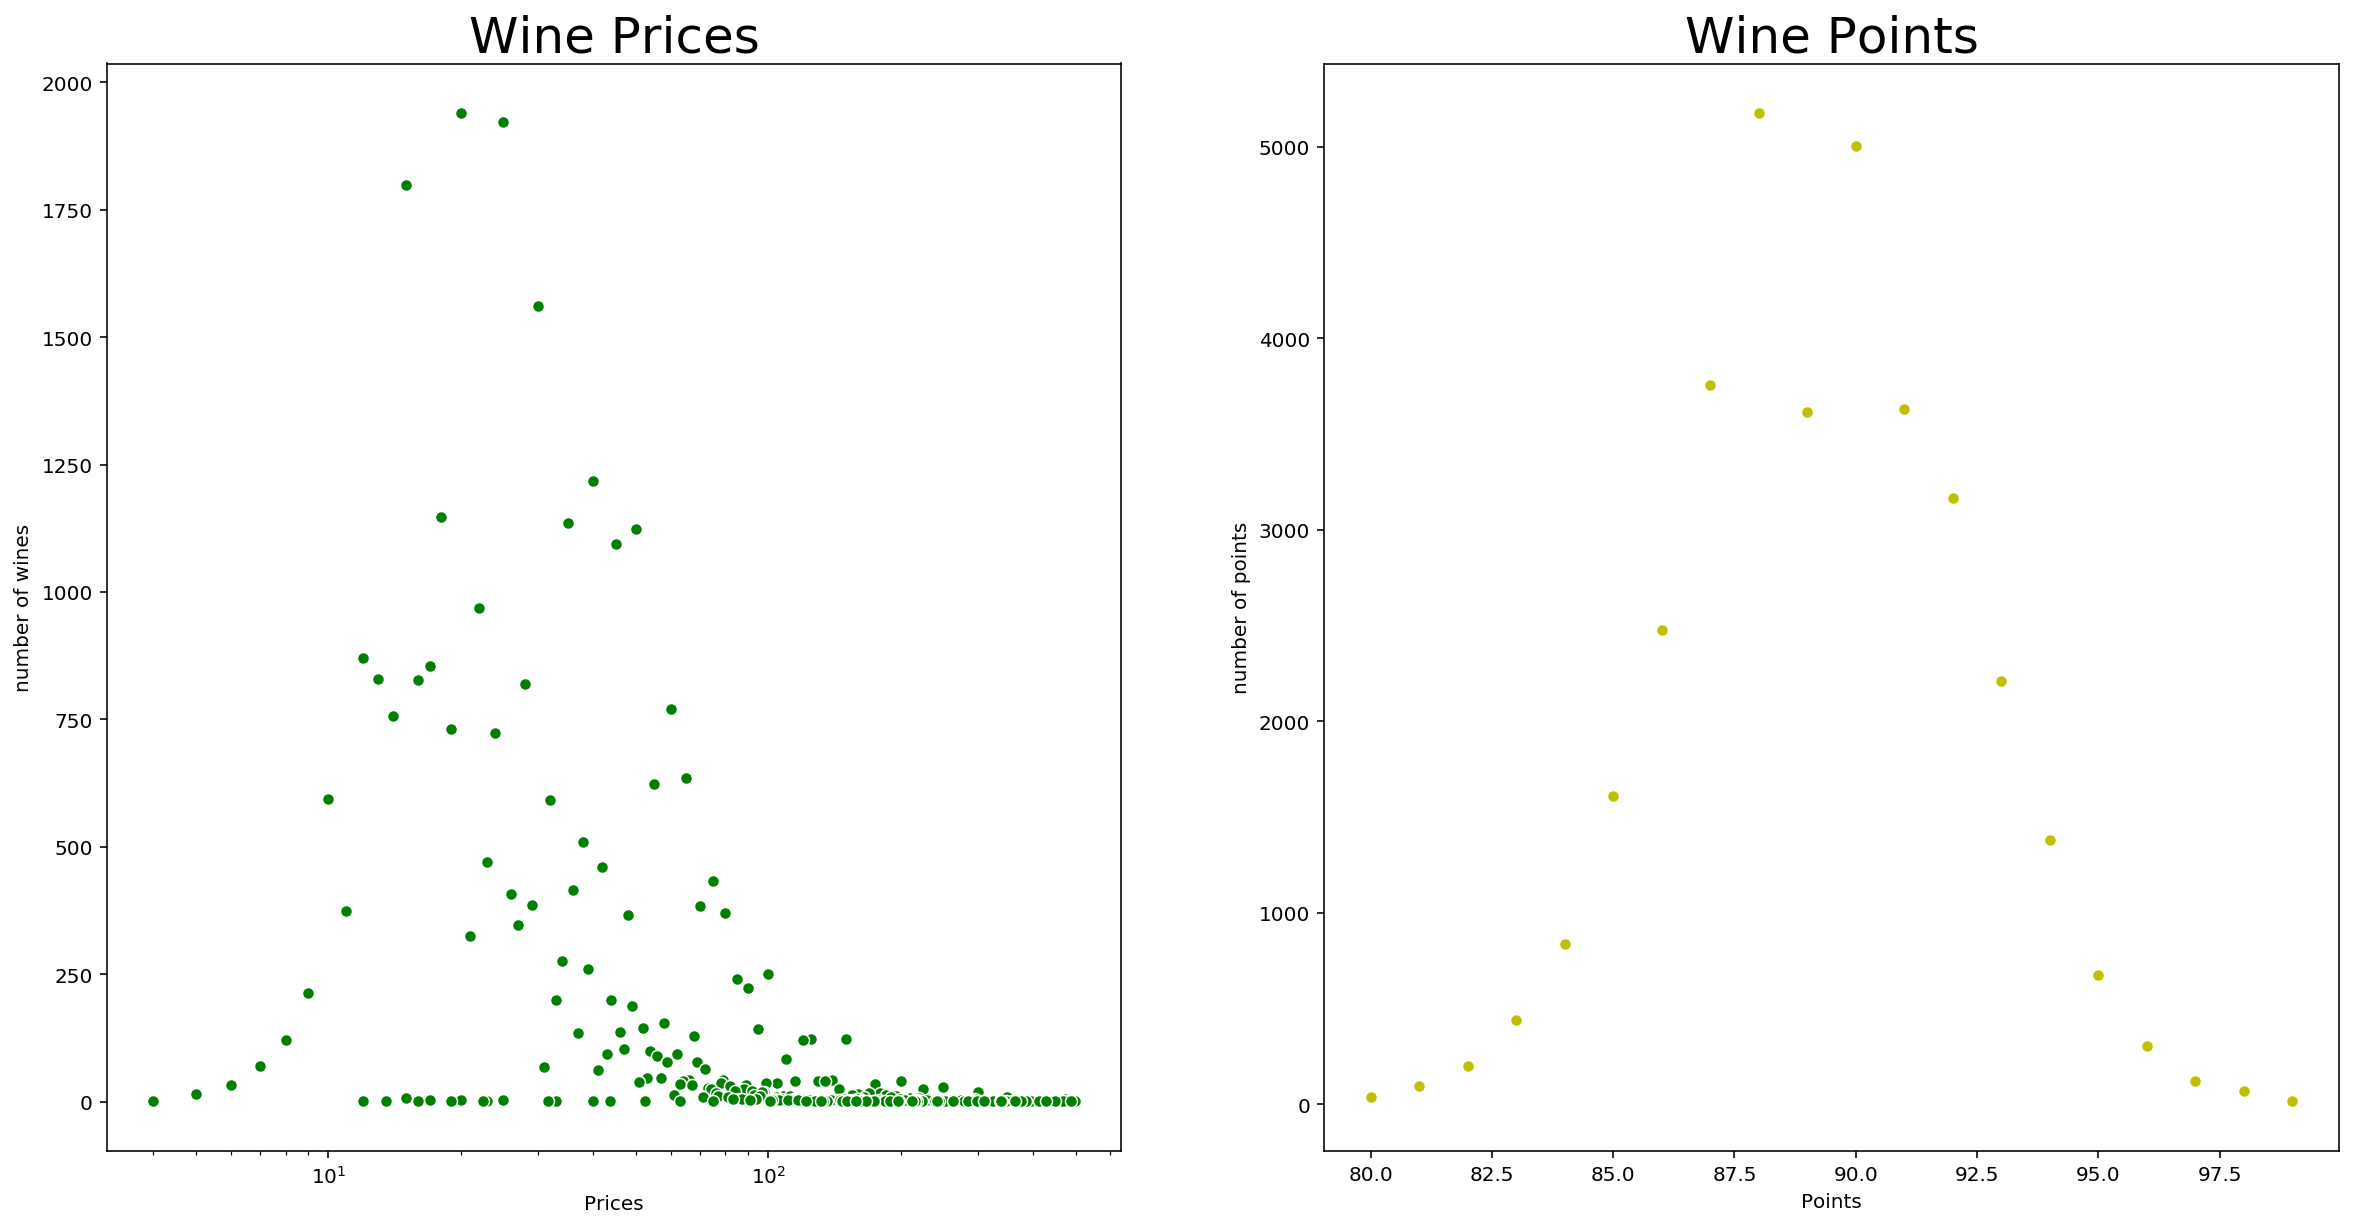

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x = 'price', y='number of wines', data=df1, color='g', ax=ax[0])
sns.scatterplot(x = 'points', y='number of points', data=df2, color='y', ax=ax[1])
ax[0].set_title('Wine Prices', fontsize=25)
ax[1].set_title('Wine Points', fontsize=25)
ax[0].set_xscale('log')

ax[0].set_xlabel('Prices')
ax[1].set_xlabel('Points')
plt.show()

## Relation between Points and Prices

There is a positive relationship between reviews and wine prices. 

In [9]:
df[['points', 'price']].corr()
#there is no so much correlation between the points and the wine price.

points     price
points  1.000000  0.409799
price   0.409799  1.000000

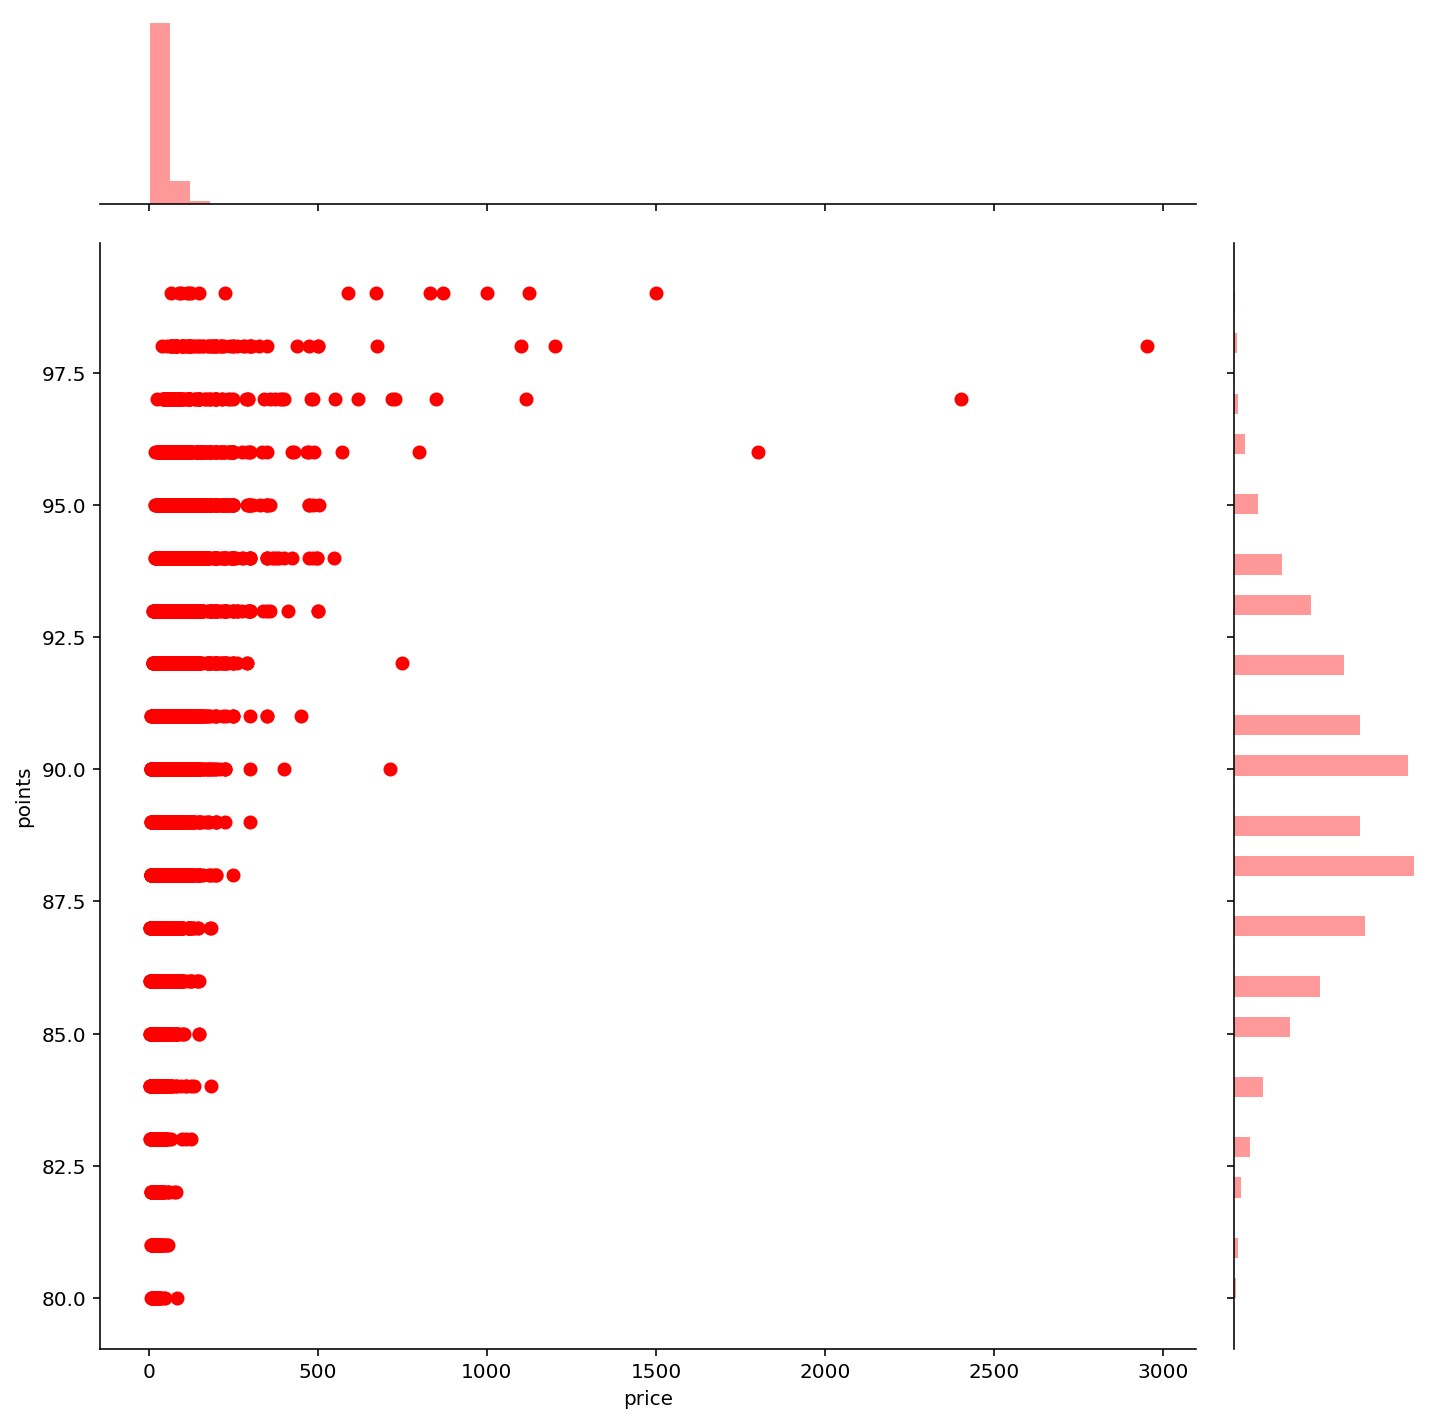

In [10]:
ax = sns.jointplot(x="price", y="points", data=df, color='r', height=10)
plt.show()

- Most of the prices wines are between 0 and \\$150 with some outliers data extending to \\$3000.
- Most of the points reviews are around $80 and 100.
- Below its the association between the points and the wines which price is below of \\$150. 
- Price between \\$4 to \\$20 have points between 80 and 90. Prices from \\$80 have mostly points between 90 and 97.5 with not values of 100. 

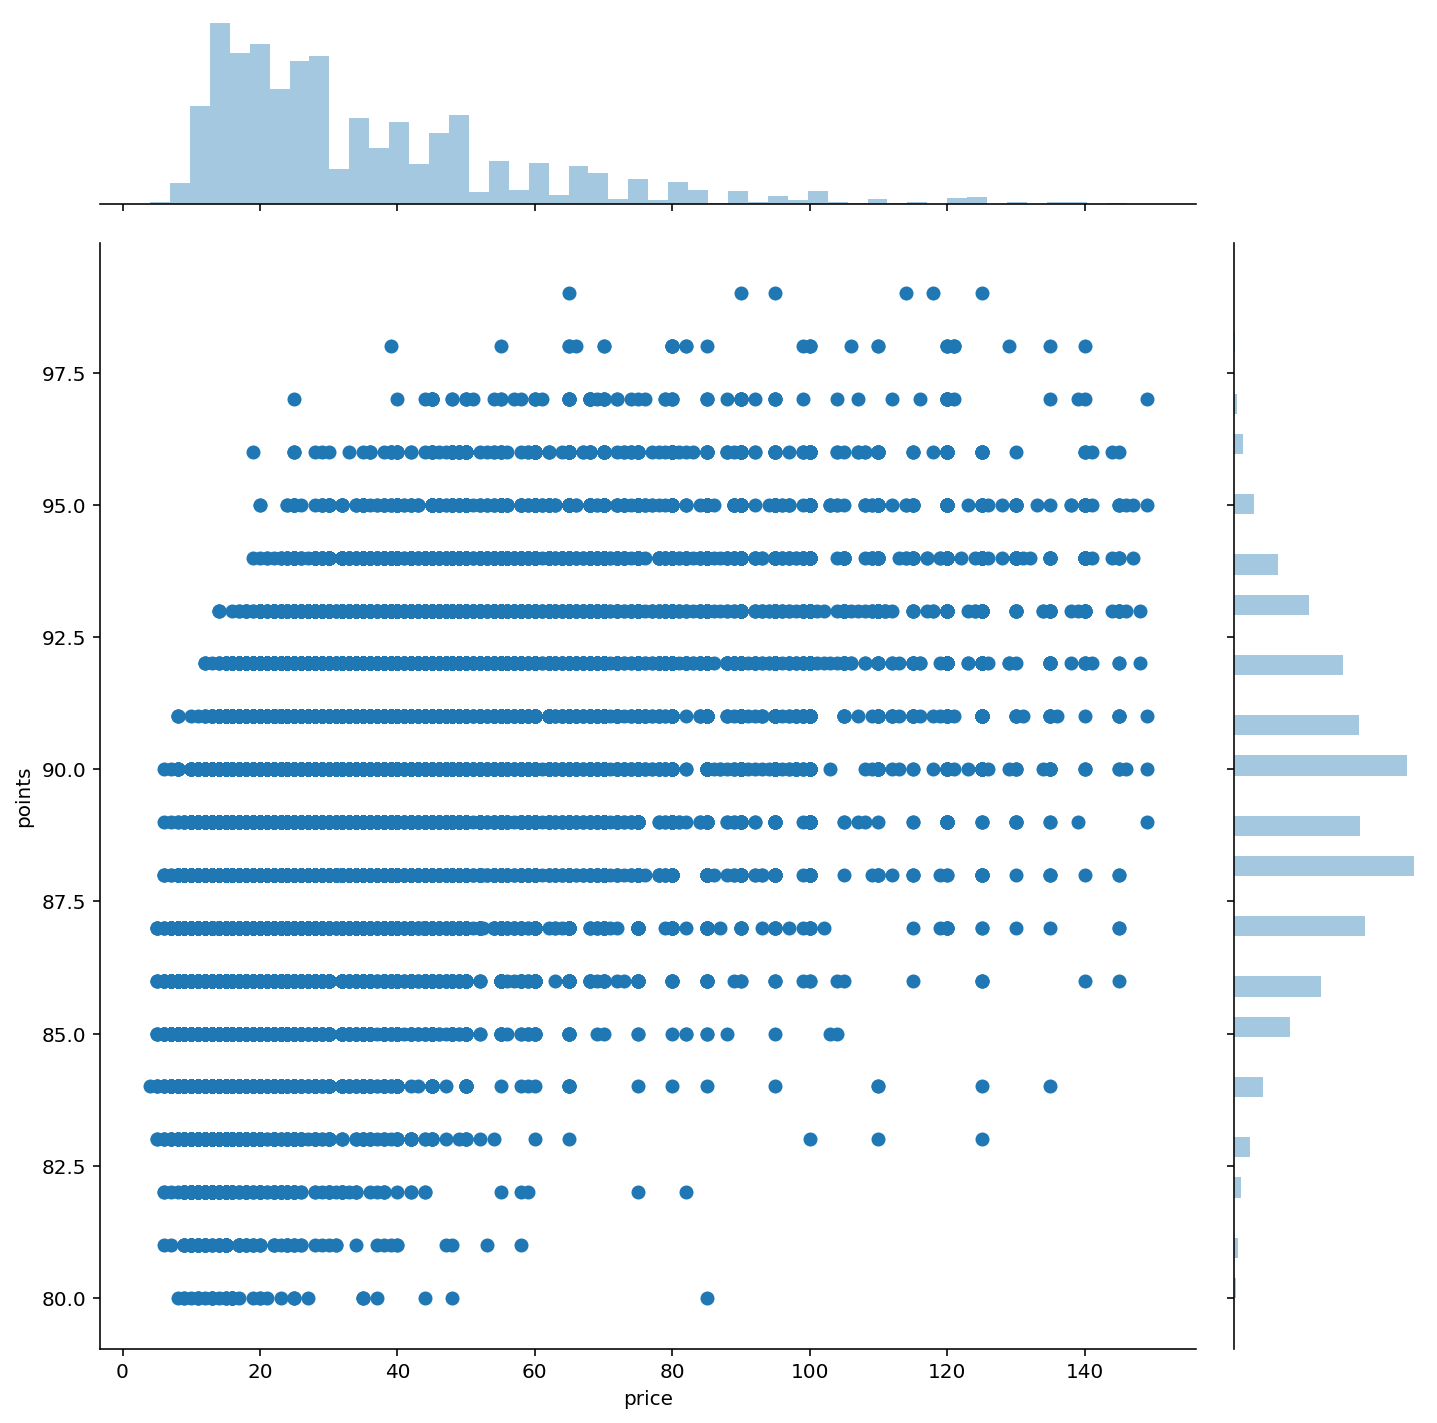

In [11]:
#wines with prices less than $150
price_150= df[df['price']<150]
sns.jointplot(x="price", y="points", data=price_150, height=10)
plt.show()

## Relation between Variety and Prices and Points

I realase that the Boal variety it's the same than the Bual variety. Boal is the name of the variety in Portuguese. I will replace the Boal for Bual

In [12]:
df.variety = ['Boal'if x == 'Bual' else x for x in df.variety ]

- Boal, Sercial and Morillon are the varieties from the wines with higher average of points. Boal is original from Spain, Portugal and Madeira and is used to elaborate white wine. However, the highest points of the wines reviews are form varieties from France (Champagne), Italy (Sangiovese) and Portugal (Port)

- The Mix of Tempranillo and Cabernet Sauvignon are the varieties with the average of the most expensive wines. Both varieties are also very common. Tempranillo is original from Spain and Cabernet Sauvignon is original from France. The most expensive wine is from Bourdeaux style red Blend (France).

- Mix of Merlot and Cabernet Sauvignon are the varieties with the wines with higher quality/prices. Merlot and Cabernet Sauvignon are very common varieties. Both varieties are original from France. 

### Average

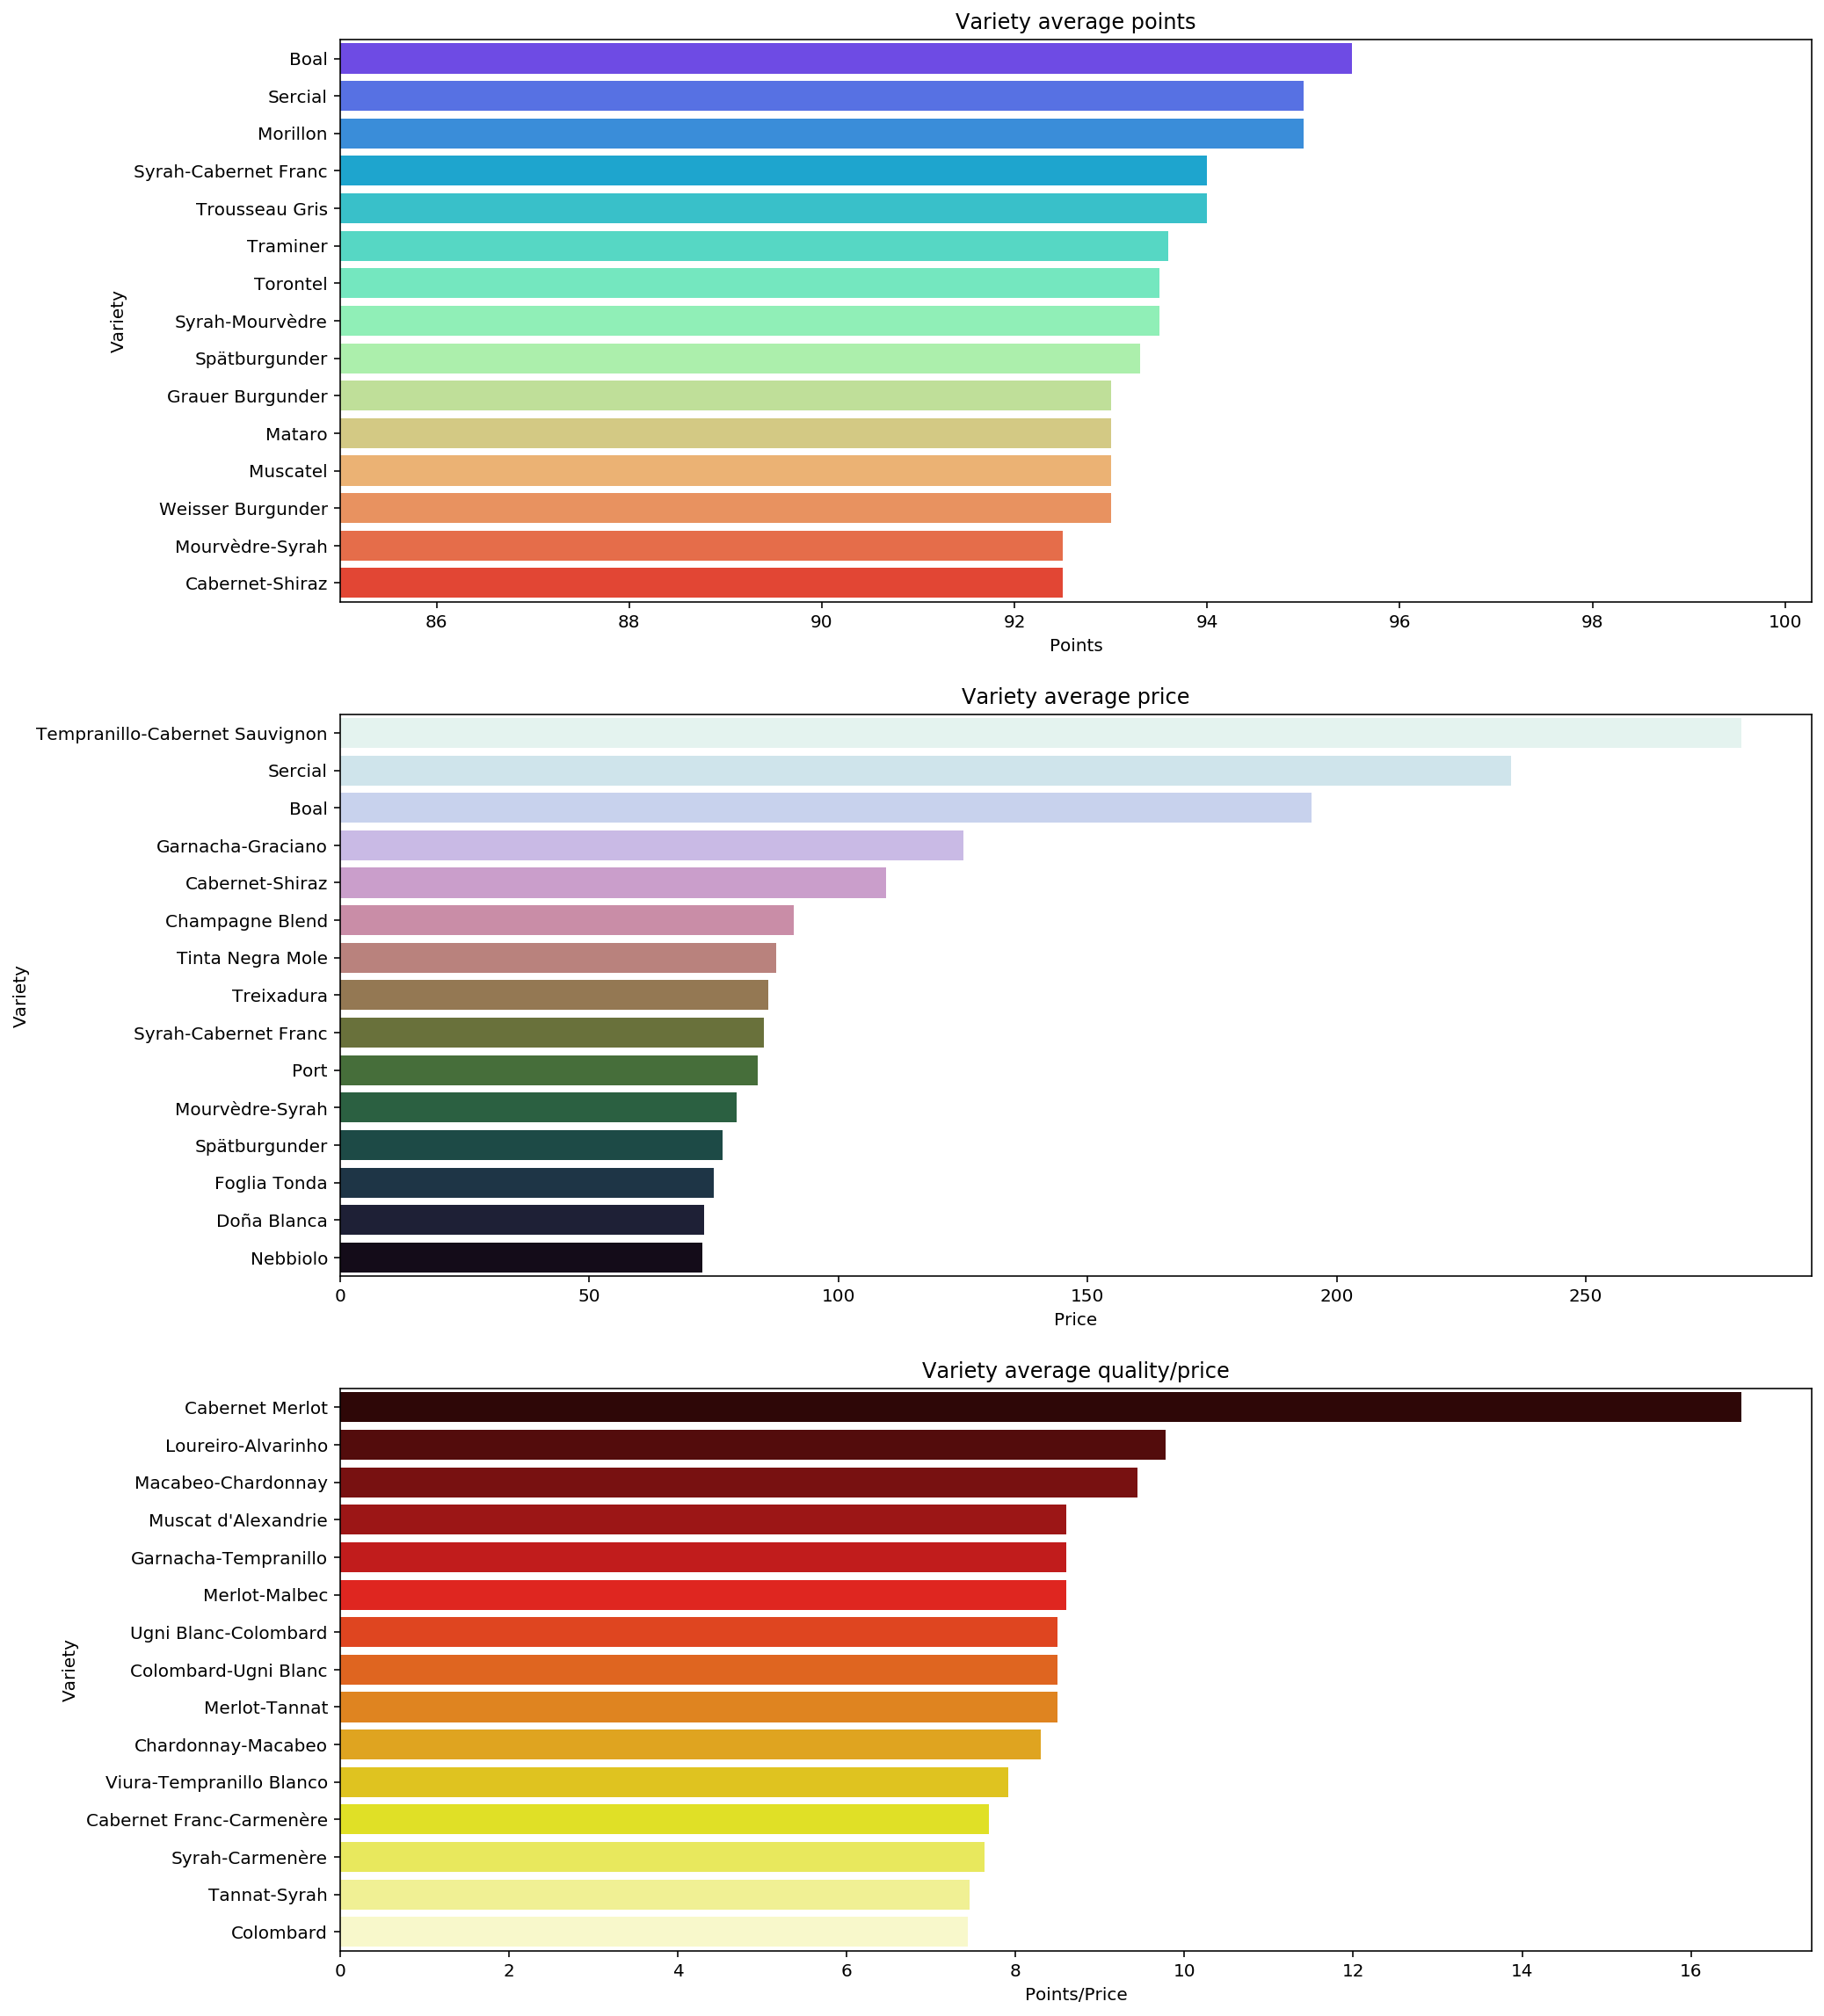

In [13]:
df_variety_points = df.groupby('variety').mean().sort_values(by='points', ascending = False)[:15]
df_variety_price = df.groupby('variety').mean().sort_values(by='price', ascending = False)[:15]
df_variety = df.groupby('variety').mean()
df_variety['points/price'] = (df_variety.points / df_variety.price)
df_variety = df_variety.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = df_variety_points['points'], y = df_variety_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = df_variety_price['price'], y = df_variety_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = df_variety['points/price'], y = df_variety.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Variety average points')
ax[0].set_ylabel('Variety')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Variety average price')
ax[1].set_ylabel('Variety')
ax[1].set_xlabel('Price')
ax[2].set_title('Variety average quality/price')
ax[2].set_ylabel('Variety')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

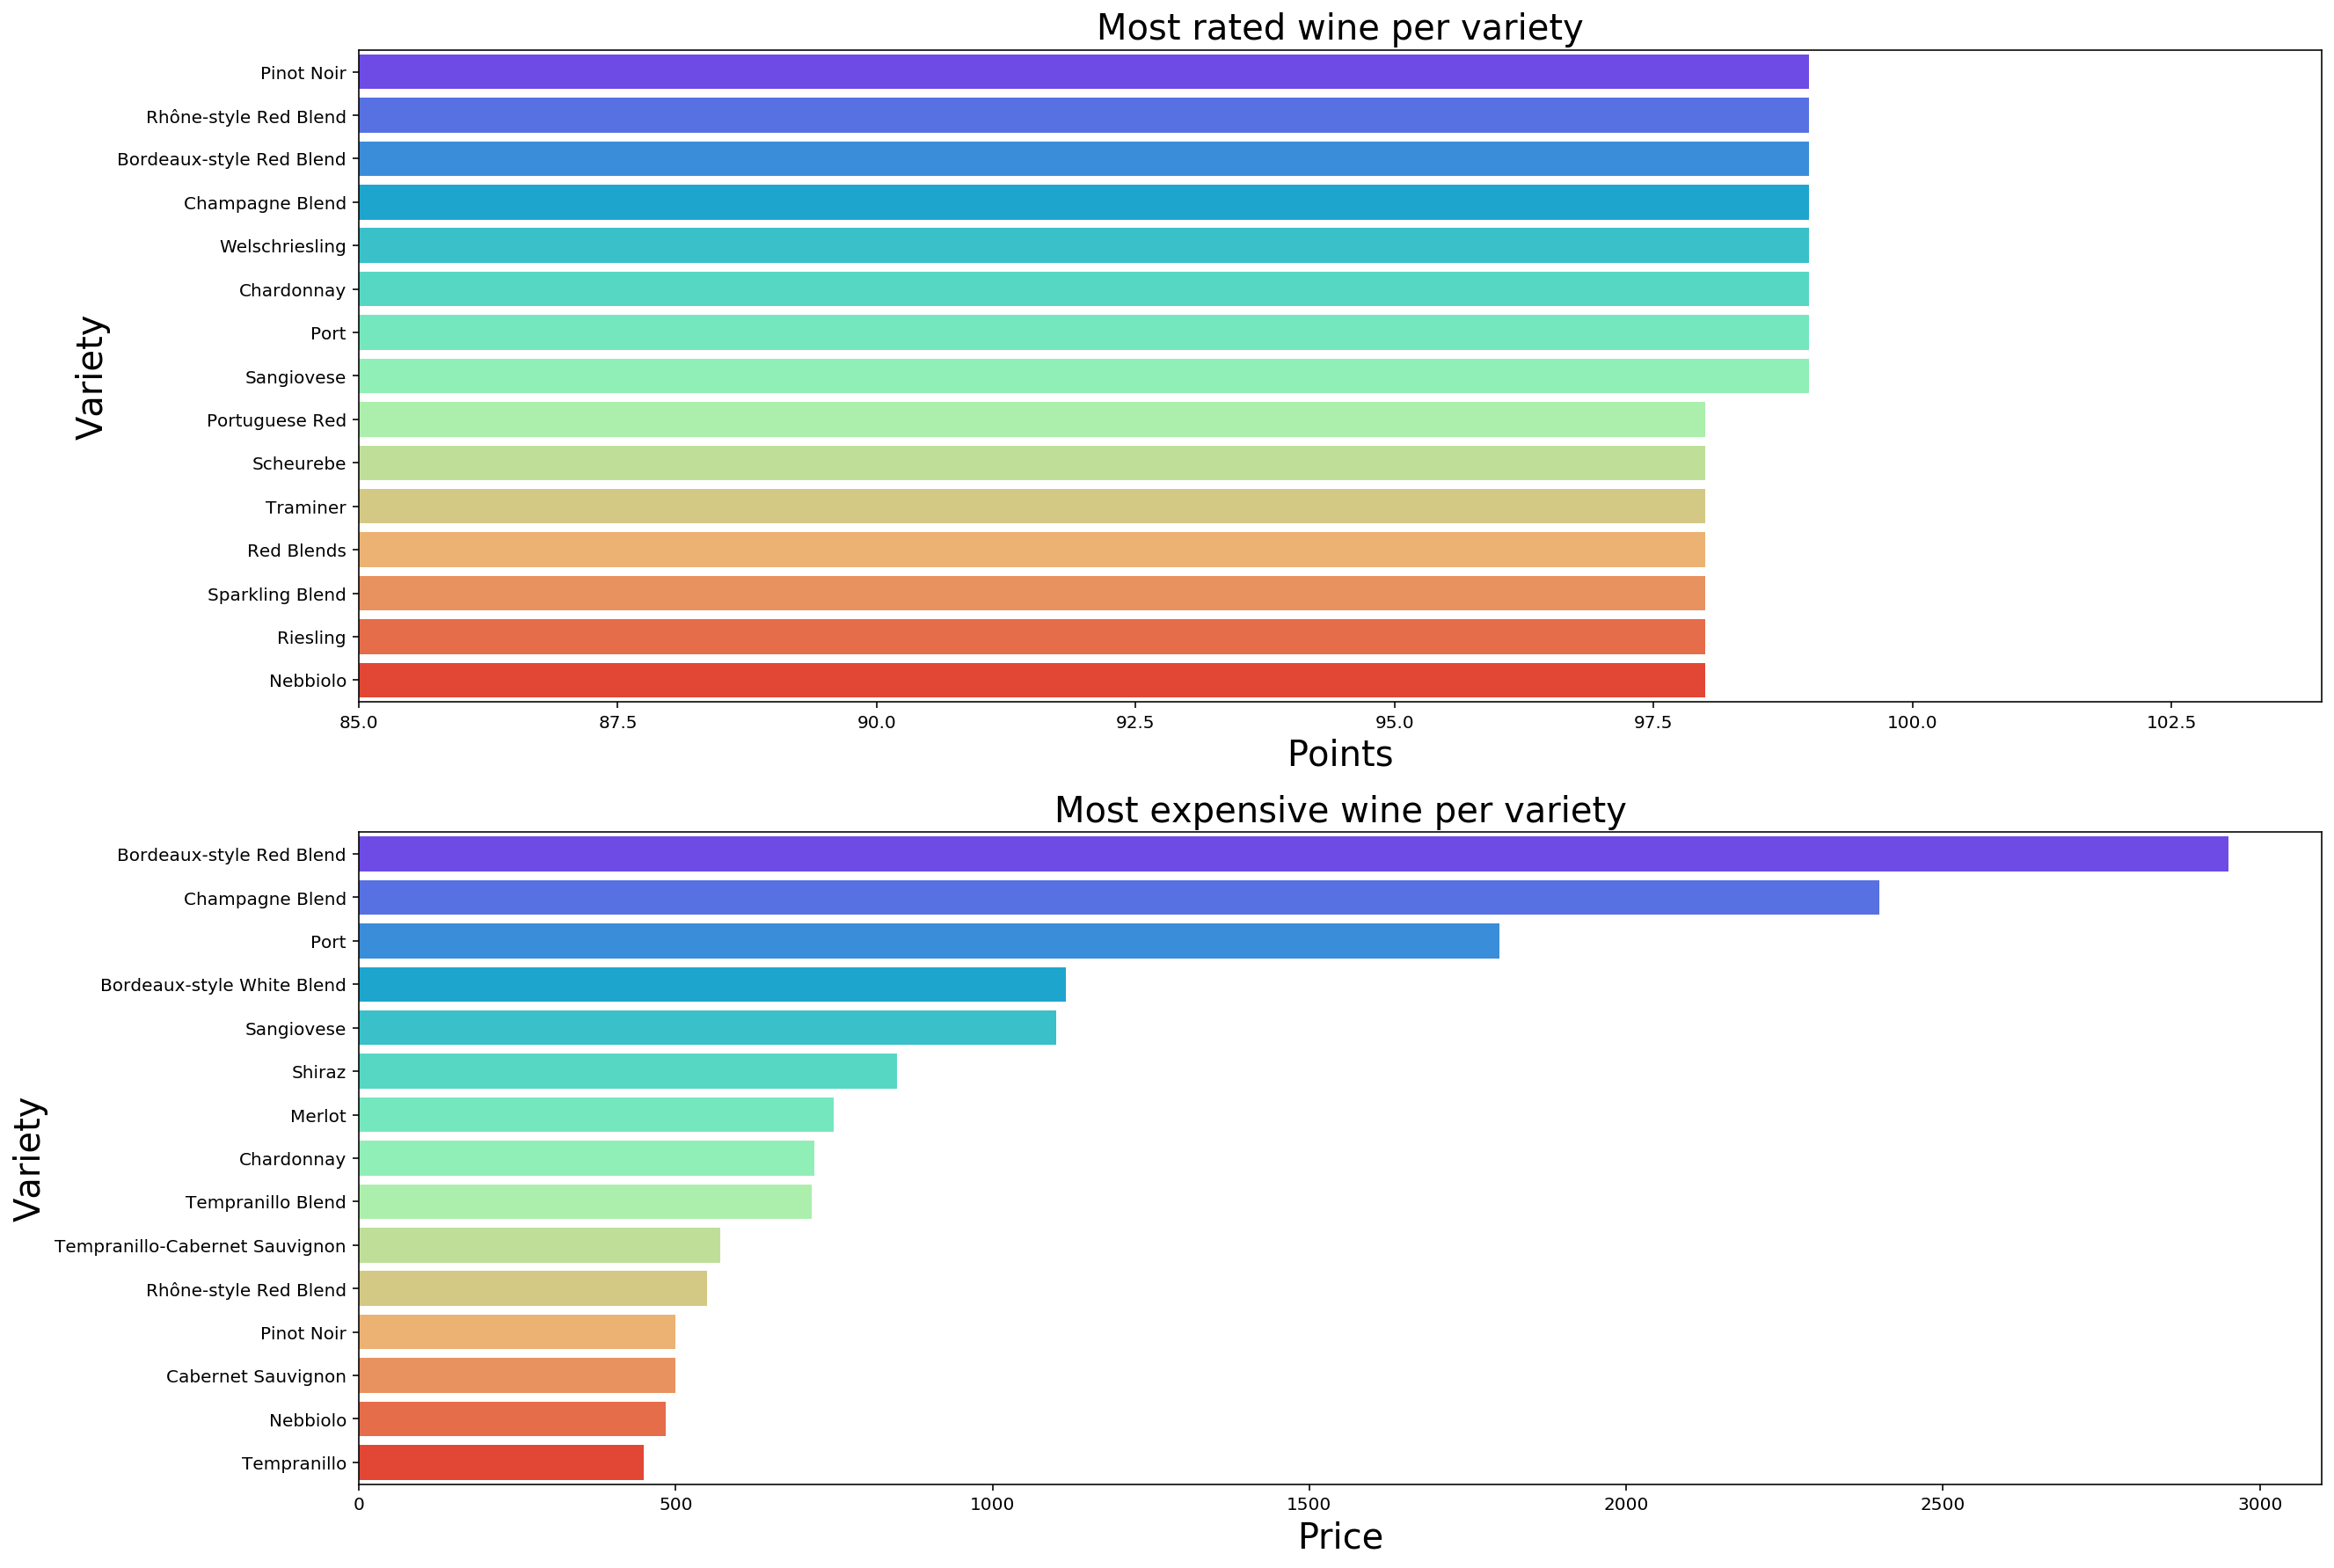

In [14]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = df.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per variety', fontsize=20)
ax1.set_ylabel('Variety',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per variety', fontsize=20)
ax2.set_ylabel('Variety',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Relation between Country and Prices and Points 

- I surprised so much with these results. 
- The wine from England has the highest average of points. However, France, US, Austria, France and Portugal are the countries with the highest points in the wines reviews
- The wine from China has the highest average of price. The most expensive wines are from France, but this country has also a lot of cheap wines. 
- Kosovo is the country with the best average quality/price wines. 

### Average

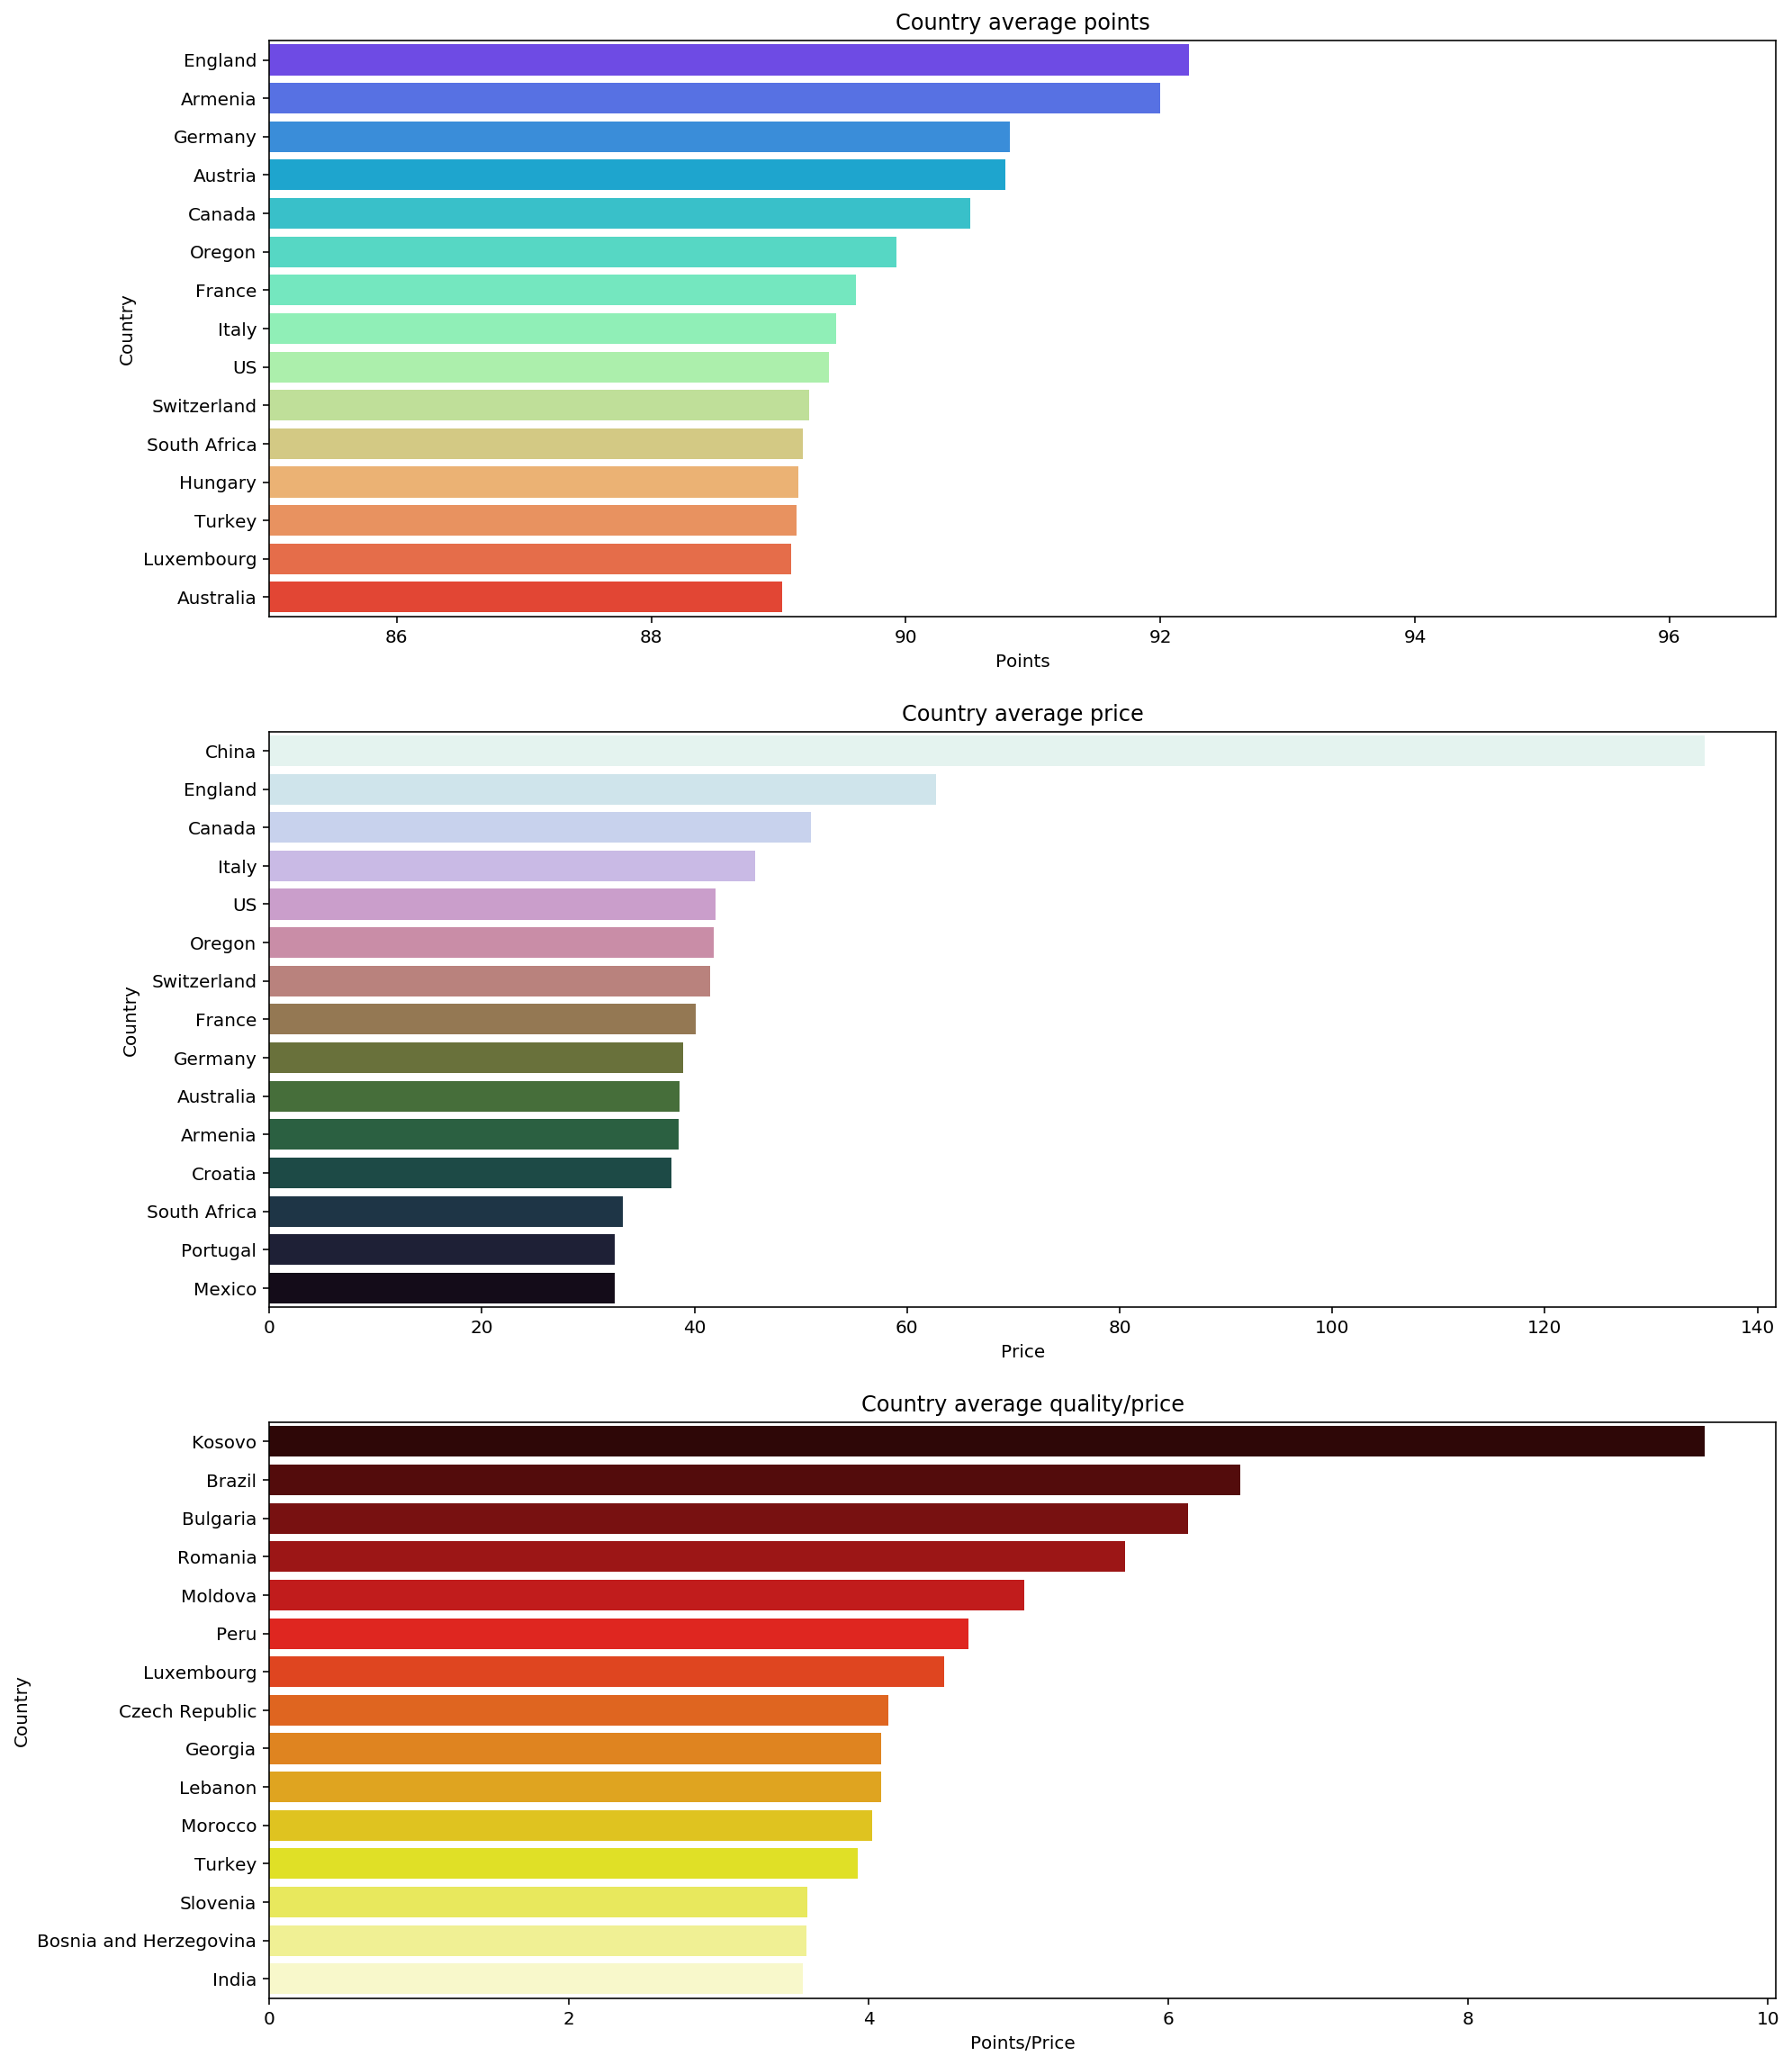

In [13]:
df_country_points = df.groupby('country').mean().sort_values(by='points', ascending = False)[:15]
df_country_price = df.groupby('country').mean().sort_values(by='price', ascending = False)[:15]
df_country = df.groupby('country').mean()
df_country['points/price'] = (df_country.points / df_country.price)
df_country = df_country.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = df_country_points['points'], y = df_country_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = df_country_price['price'], y = df_country_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = df_country['points/price'], y = df_country.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Country average points')
ax[0].set_ylabel('Country')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Country average price')
ax[1].set_ylabel('Country')
ax[1].set_xlabel('Price')
ax[2].set_title('Country average quality/price')
ax[2].set_ylabel('Country')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum


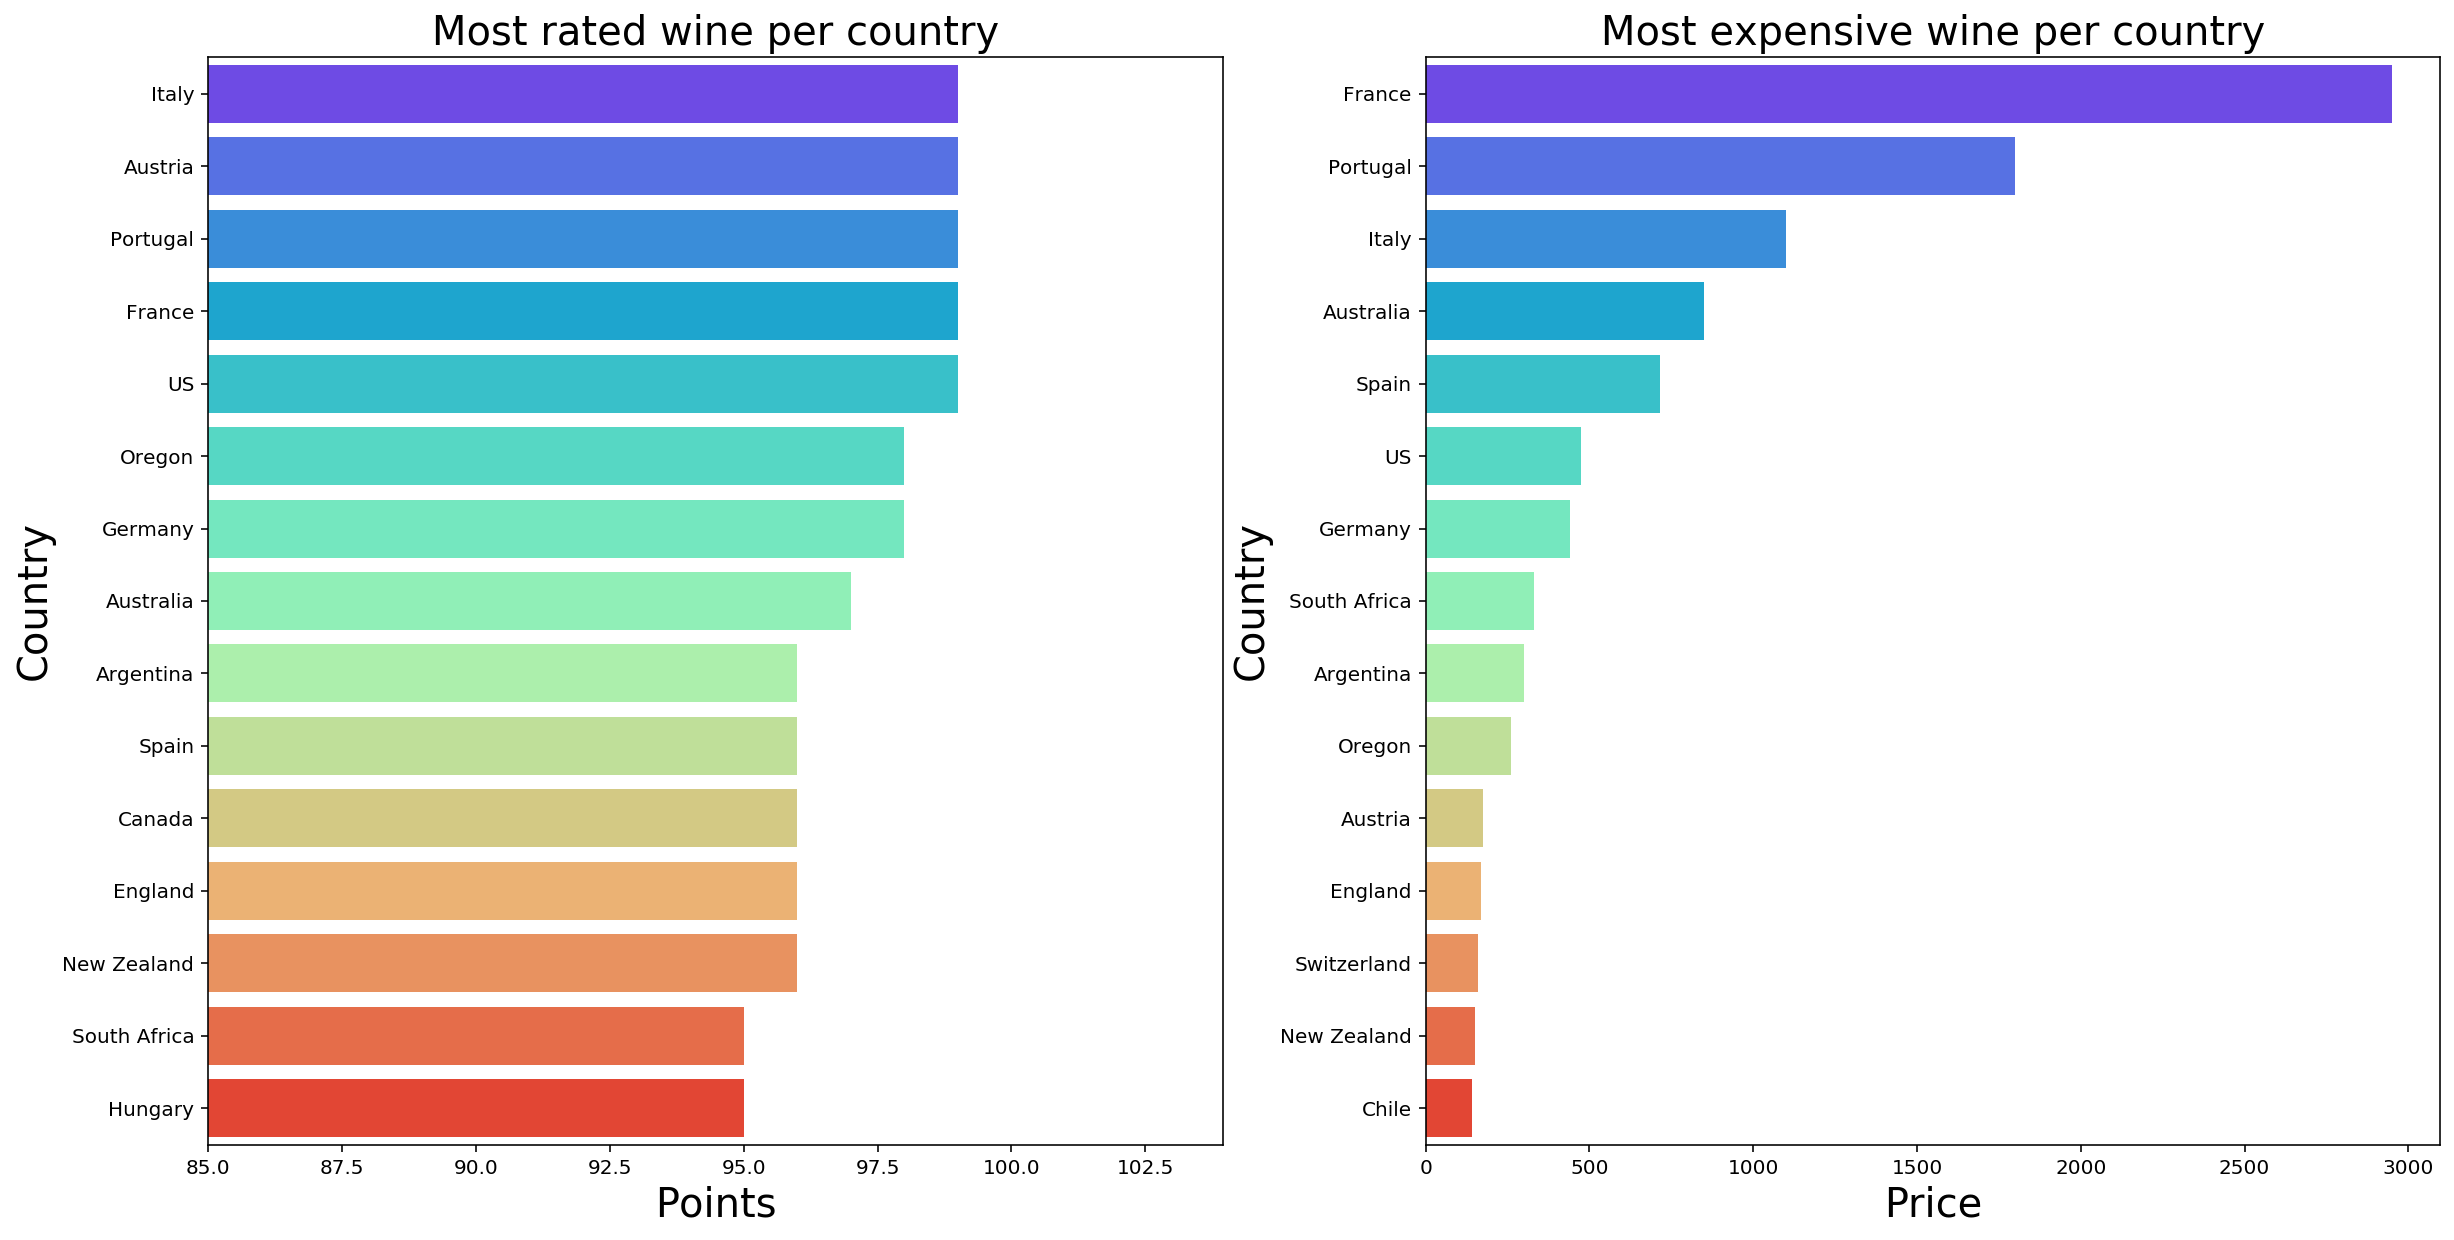

In [14]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1,ax2 = ax.flatten()

country_points_max = df.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per country', fontsize=20)
ax1.set_ylabel('Country',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per country', fontsize=20)
ax2.set_ylabel('Country',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Relation between Winery and Prices and Points

- The wineries with the highest average of points are from France and Ferreira from Portugal. The most rated wines are from wineries in France, Portugal, Austria and Italy. 
- The wineries with the highest average of prices are from France. The highest price in the wine are from wineries in France.
- The wineries with the hihgest average of quality/price are from USA.


### Average

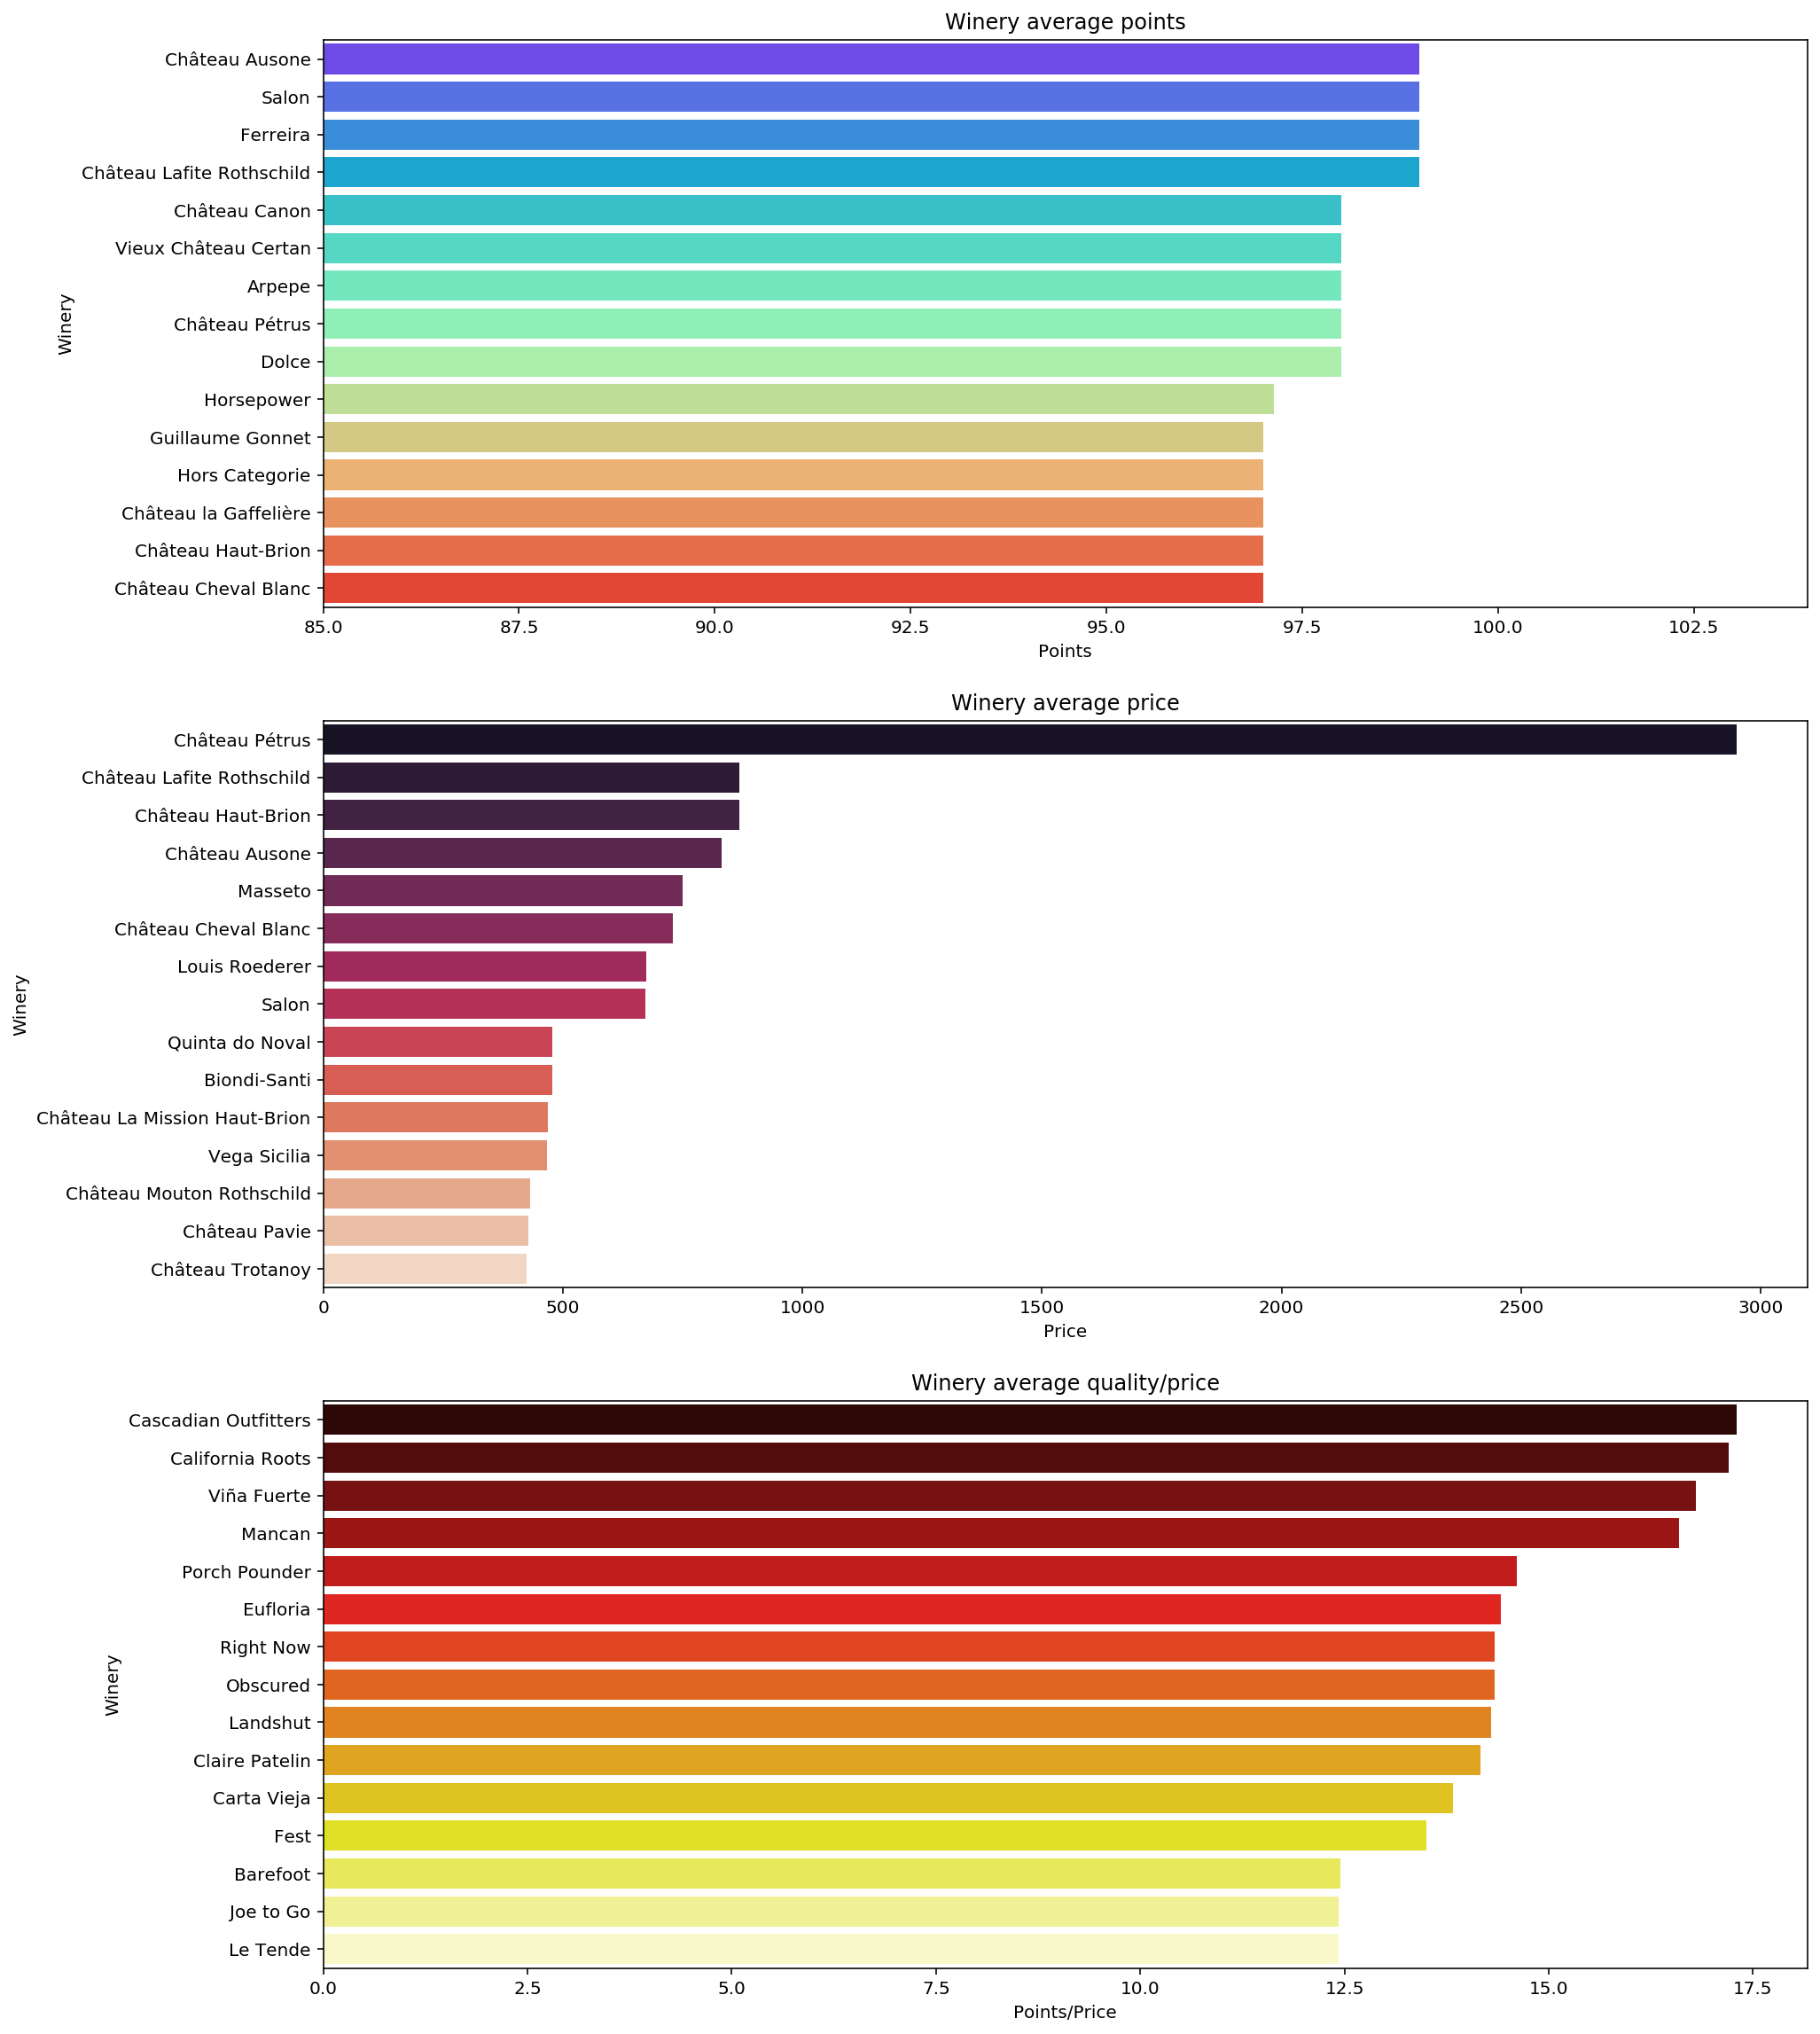

In [15]:
df_winery_points = df.groupby('winery').mean().sort_values(by='points', ascending = False)[:15]
df_winery_price = df.groupby('winery').mean().sort_values(by='price', ascending = False)[:15]
df_winery = df.groupby('winery').mean()
df_winery['points/price'] = (df_winery.points / df_winery.price)
df_winery = df_winery.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = df_winery_points['points'], y = df_winery_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = df_winery_price['price'], y = df_winery_price.index, palette= 'rocket', ax=ax[1])
sns.barplot(x = df_winery['points/price'], y = df_winery.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Winery average points')
ax[0].set_ylabel('Winery')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Winery average price')
ax[1].set_ylabel('Winery')
ax[1].set_xlabel('Price')
ax[2].set_title('Winery average quality/price')
ax[2].set_ylabel('Winery')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

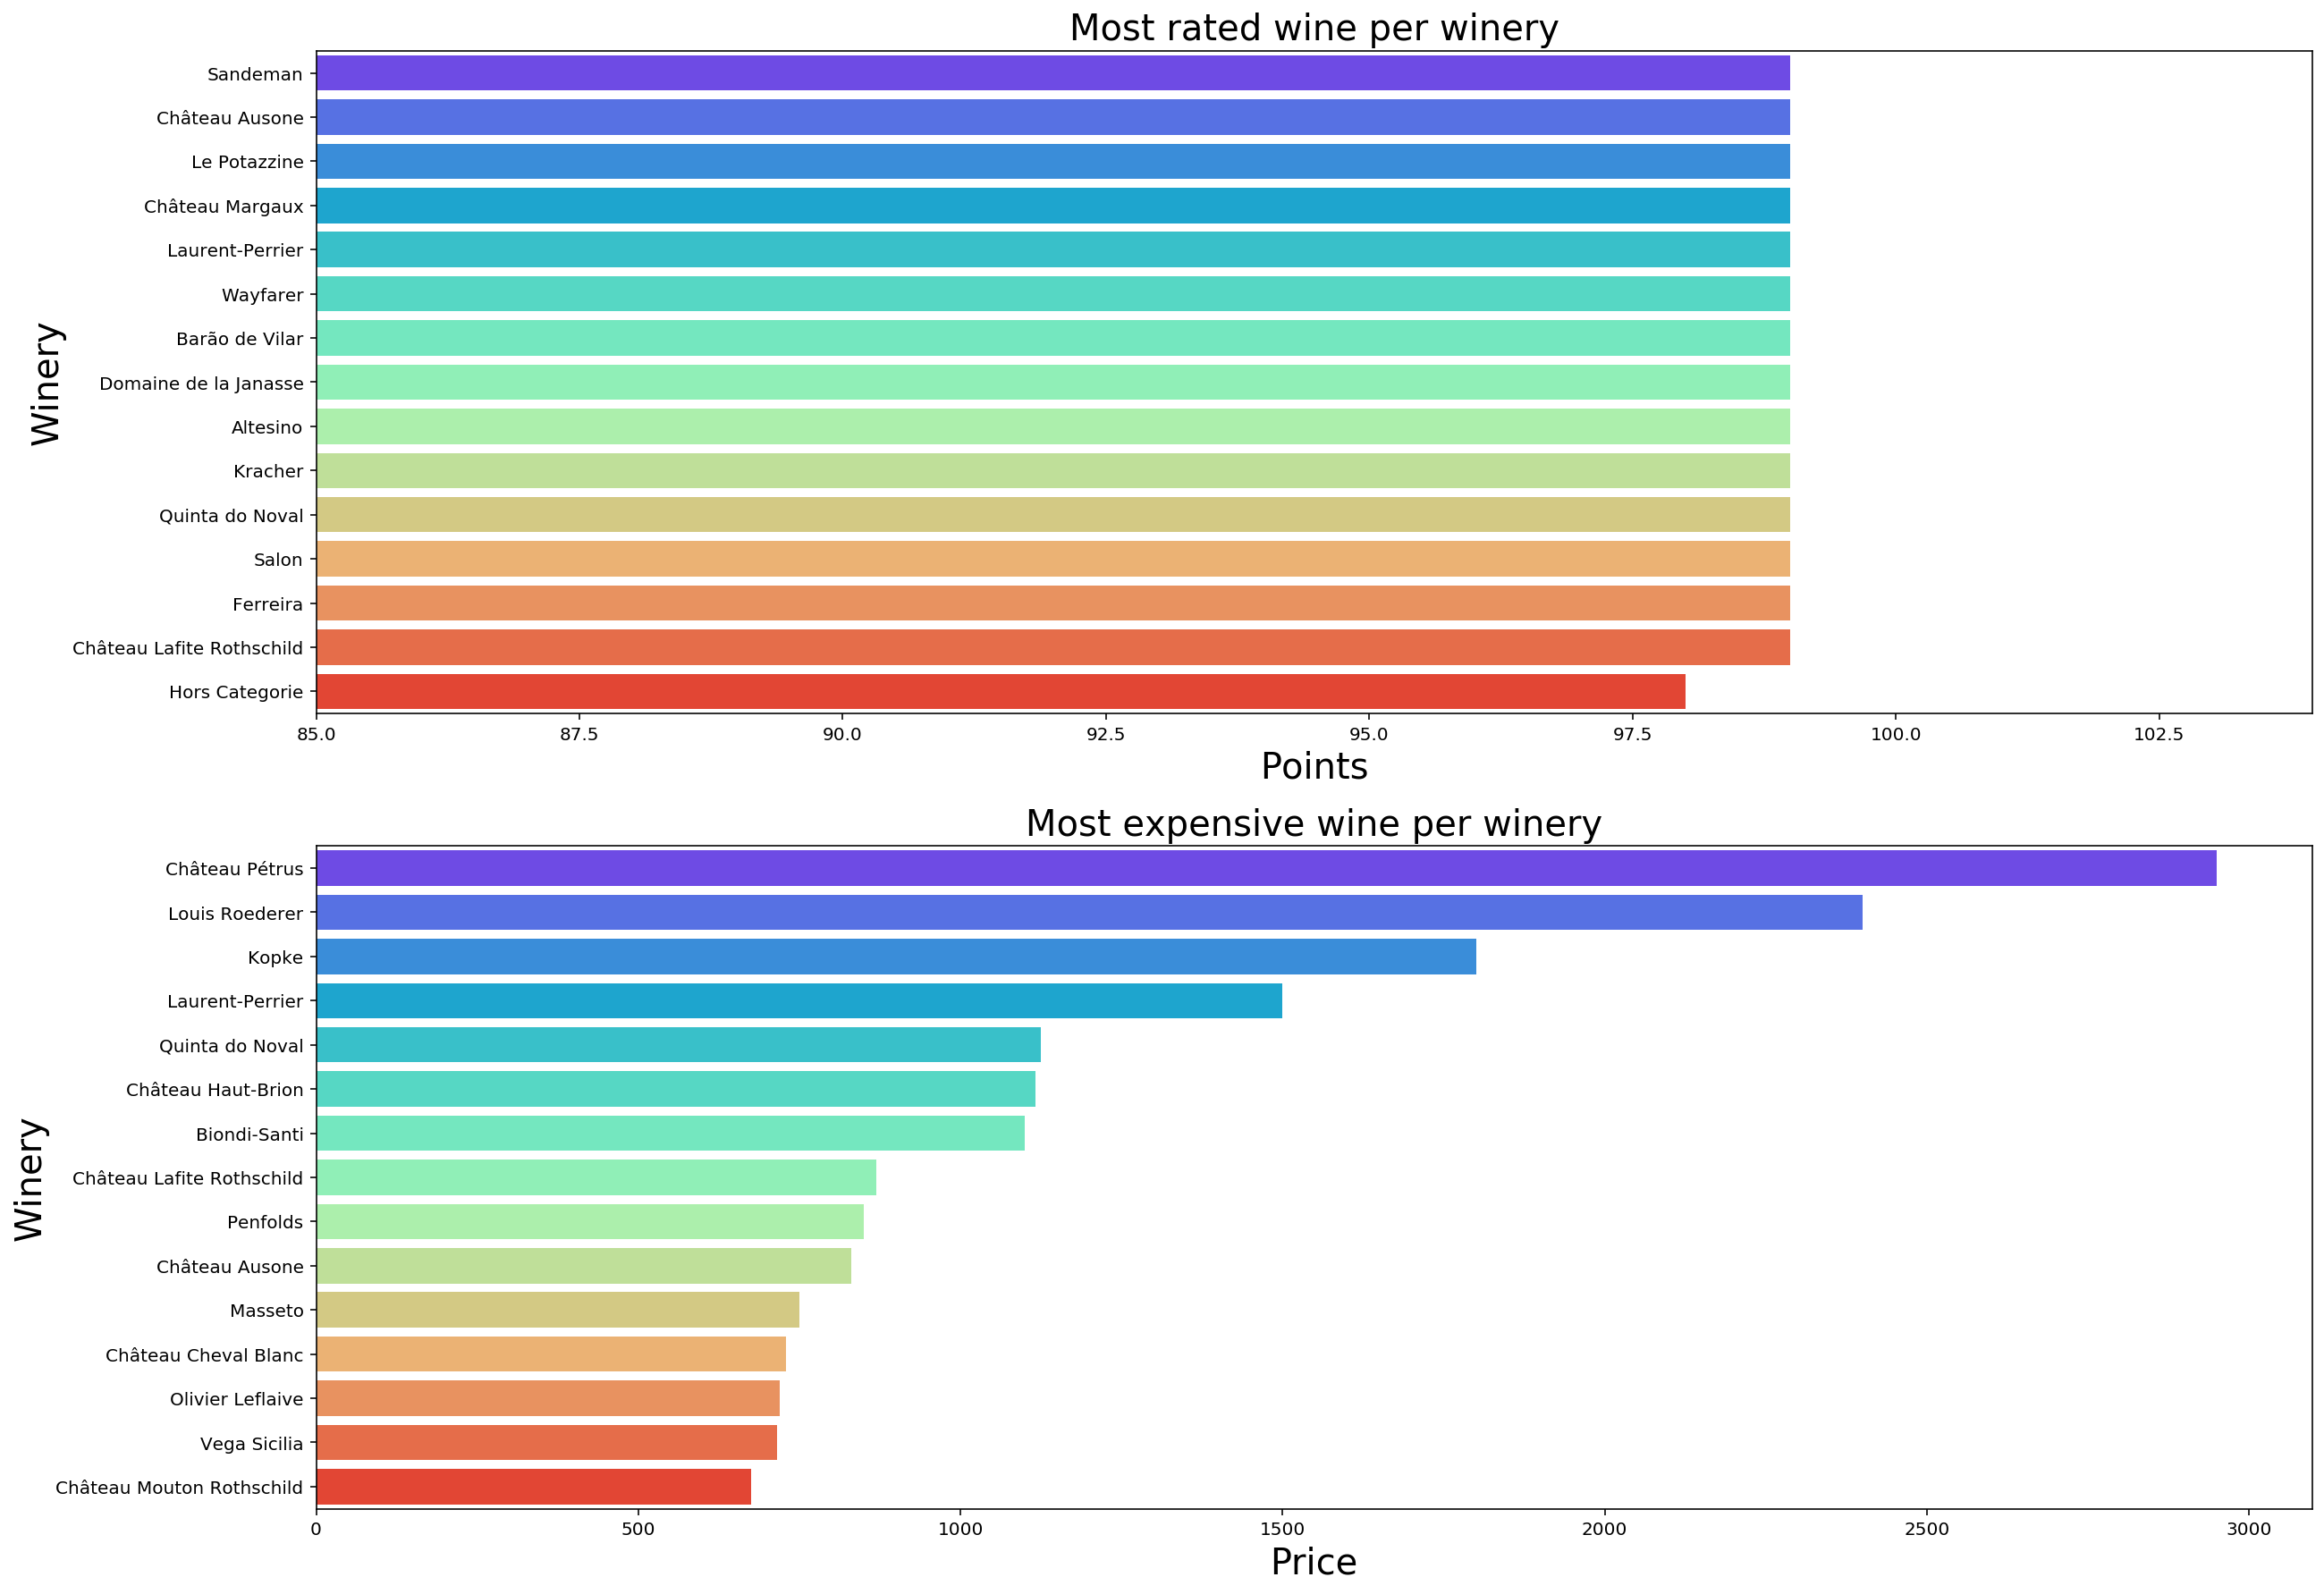

In [16]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = df.groupby(['winery'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per winery', fontsize=20)
ax1.set_ylabel('Winery',fontsize=20)
ax1.set_xlabel('Points', fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = df.groupby(['winery'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per winery', fontsize=20)
ax2.set_ylabel('Winery',fontsize=20)
ax2.set_xlabel('Price', fontsize=20)
plt.show()

## Relation between Province and Prices and Points

- The provinces with the highest average of points and with the highest average of price in their wines are in France. However the highest average points per province are in France, Italy and England. The highest wine is from Pomerol, close to Bourdeaux.
- In Italy is the province with highest average of quality and prices.

### Average

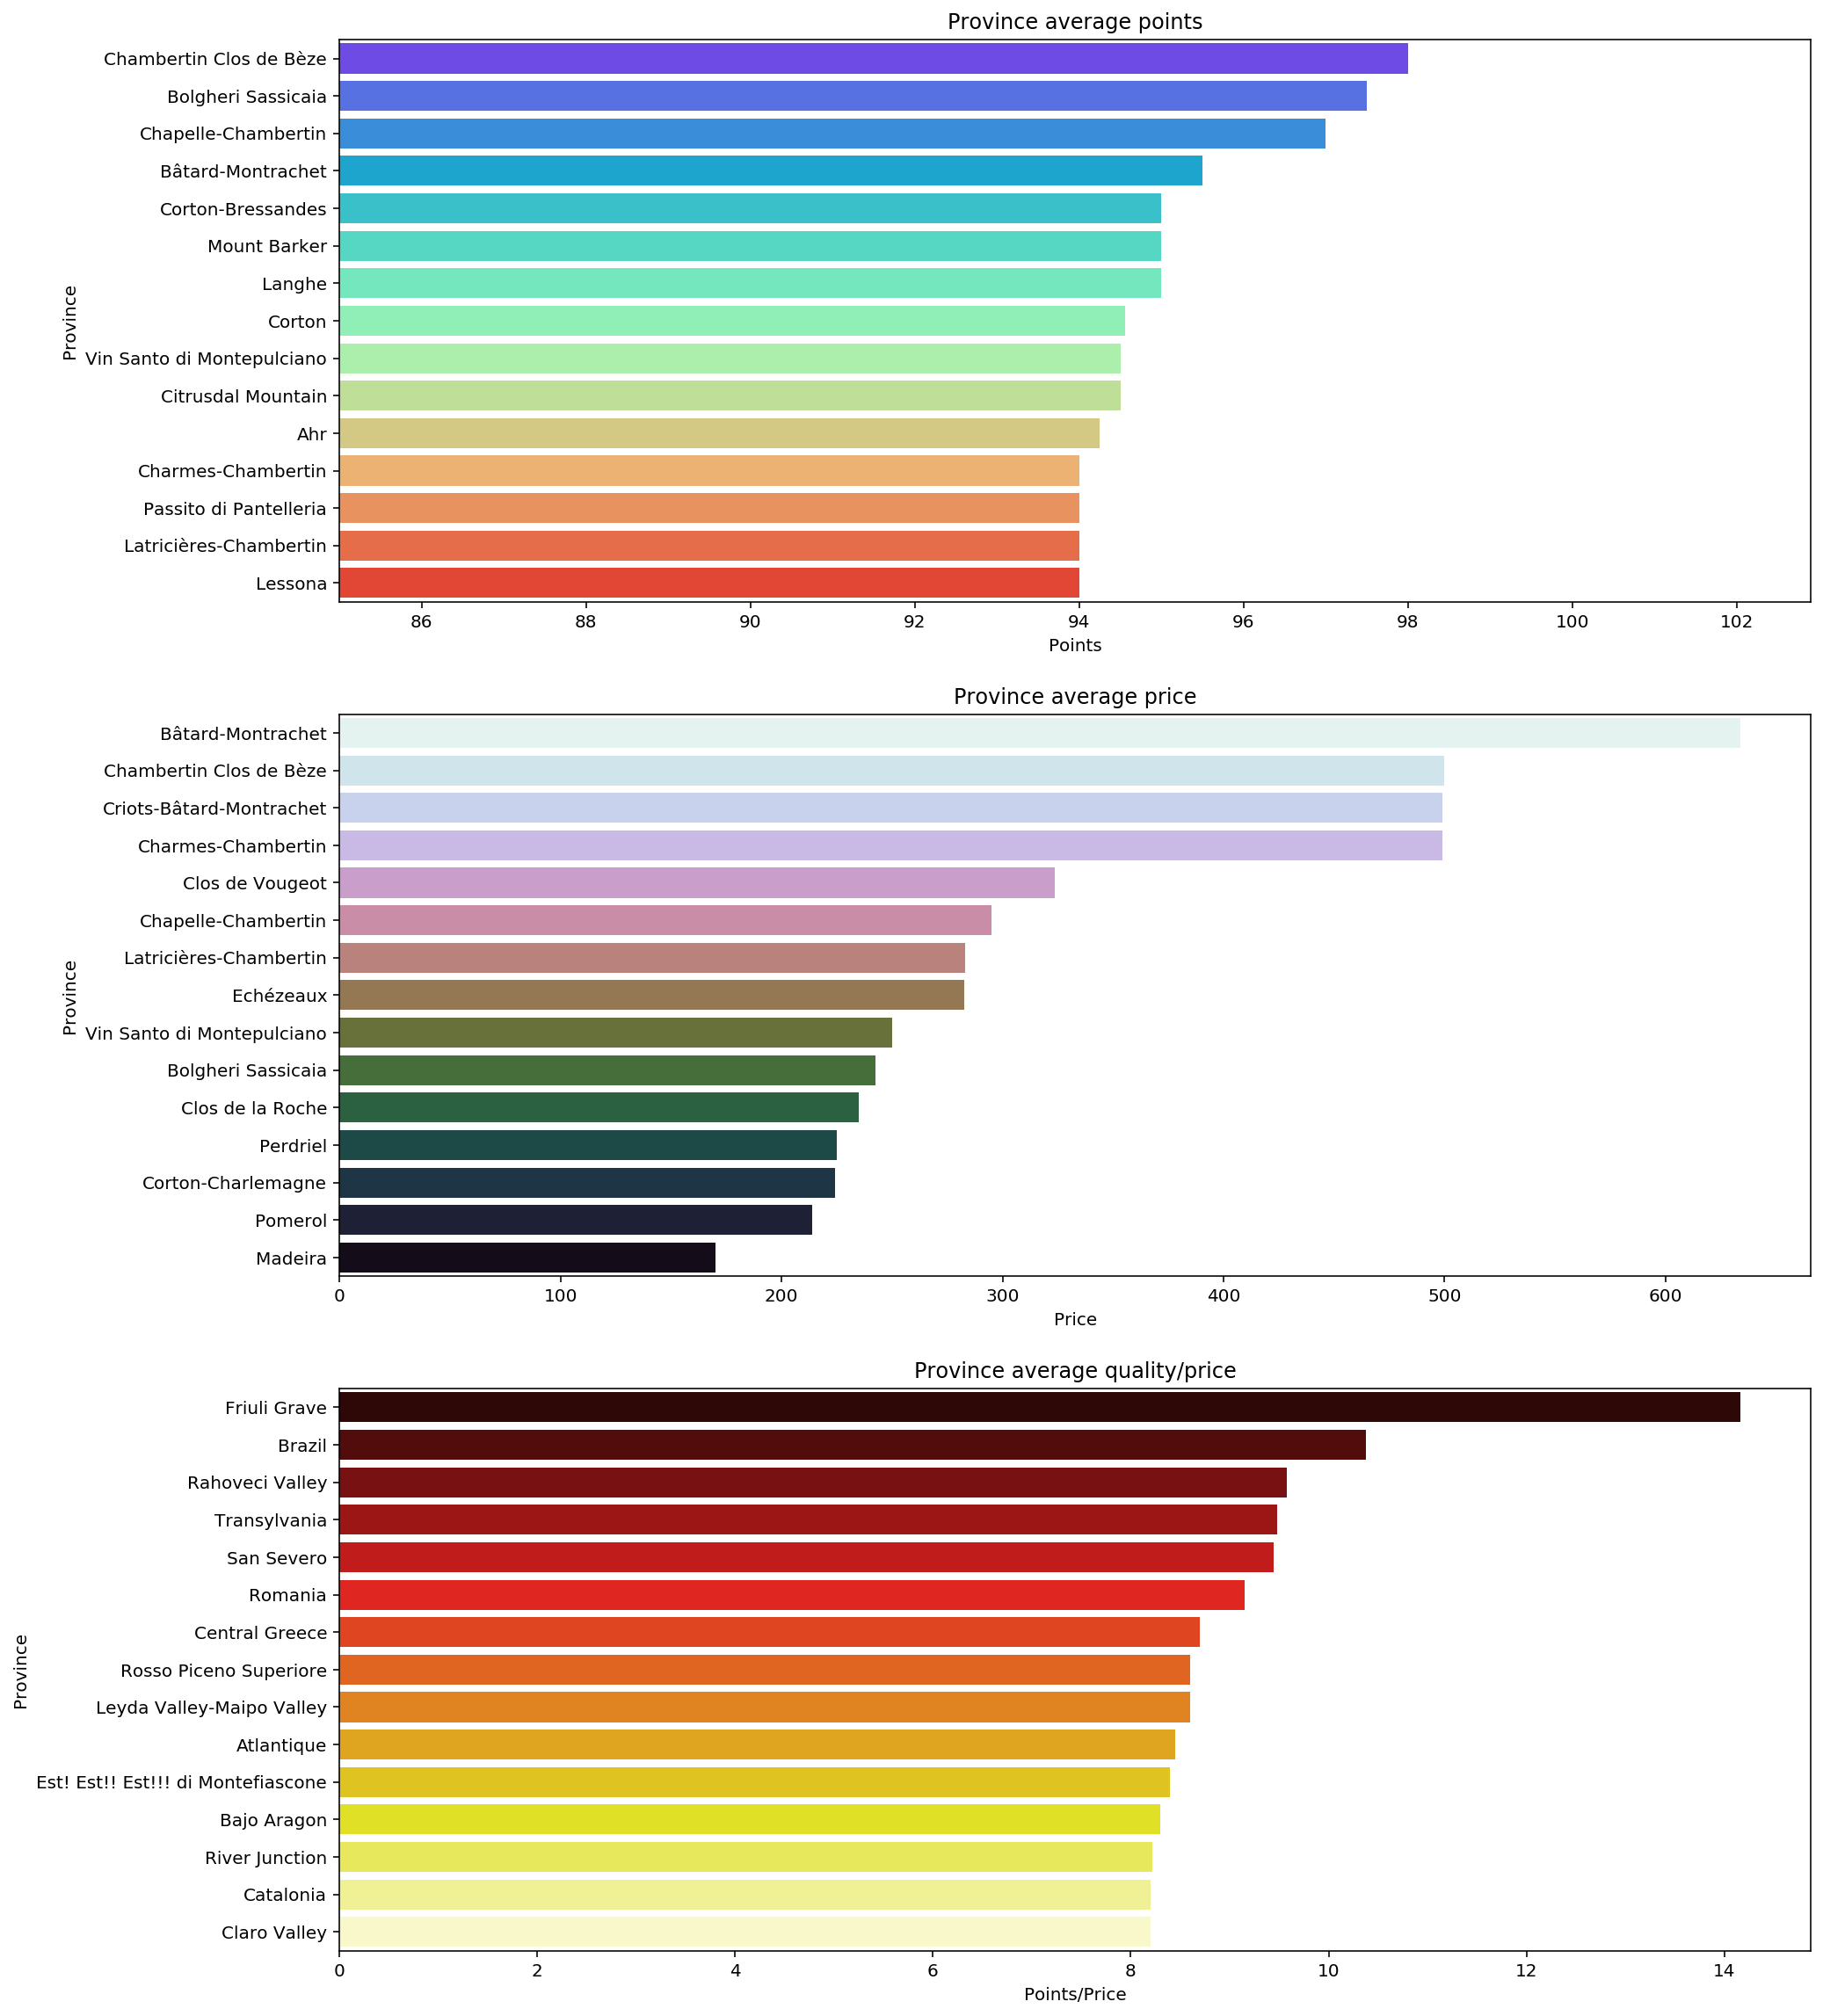

In [17]:
df_province_points = df.groupby('province').mean().sort_values(by='points', ascending = False)[:15]
df_province_price = df.groupby('province').mean().sort_values(by='price', ascending = False)[:15]
df_province = df.groupby('province').mean()
df_province['points/price'] = (df_province.points / df_province.price)
df_province = df_province.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = df_province_points['points'], y = df_province_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = df_province_price['price'], y = df_province_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = df_province['points/price'], y = df_province.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Province average points')
ax[0].set_ylabel('Province')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Province average price')
ax[1].set_ylabel('Province')
ax[1].set_xlabel('Price')
ax[2].set_title('Province average quality/price')
ax[2].set_ylabel('Province')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

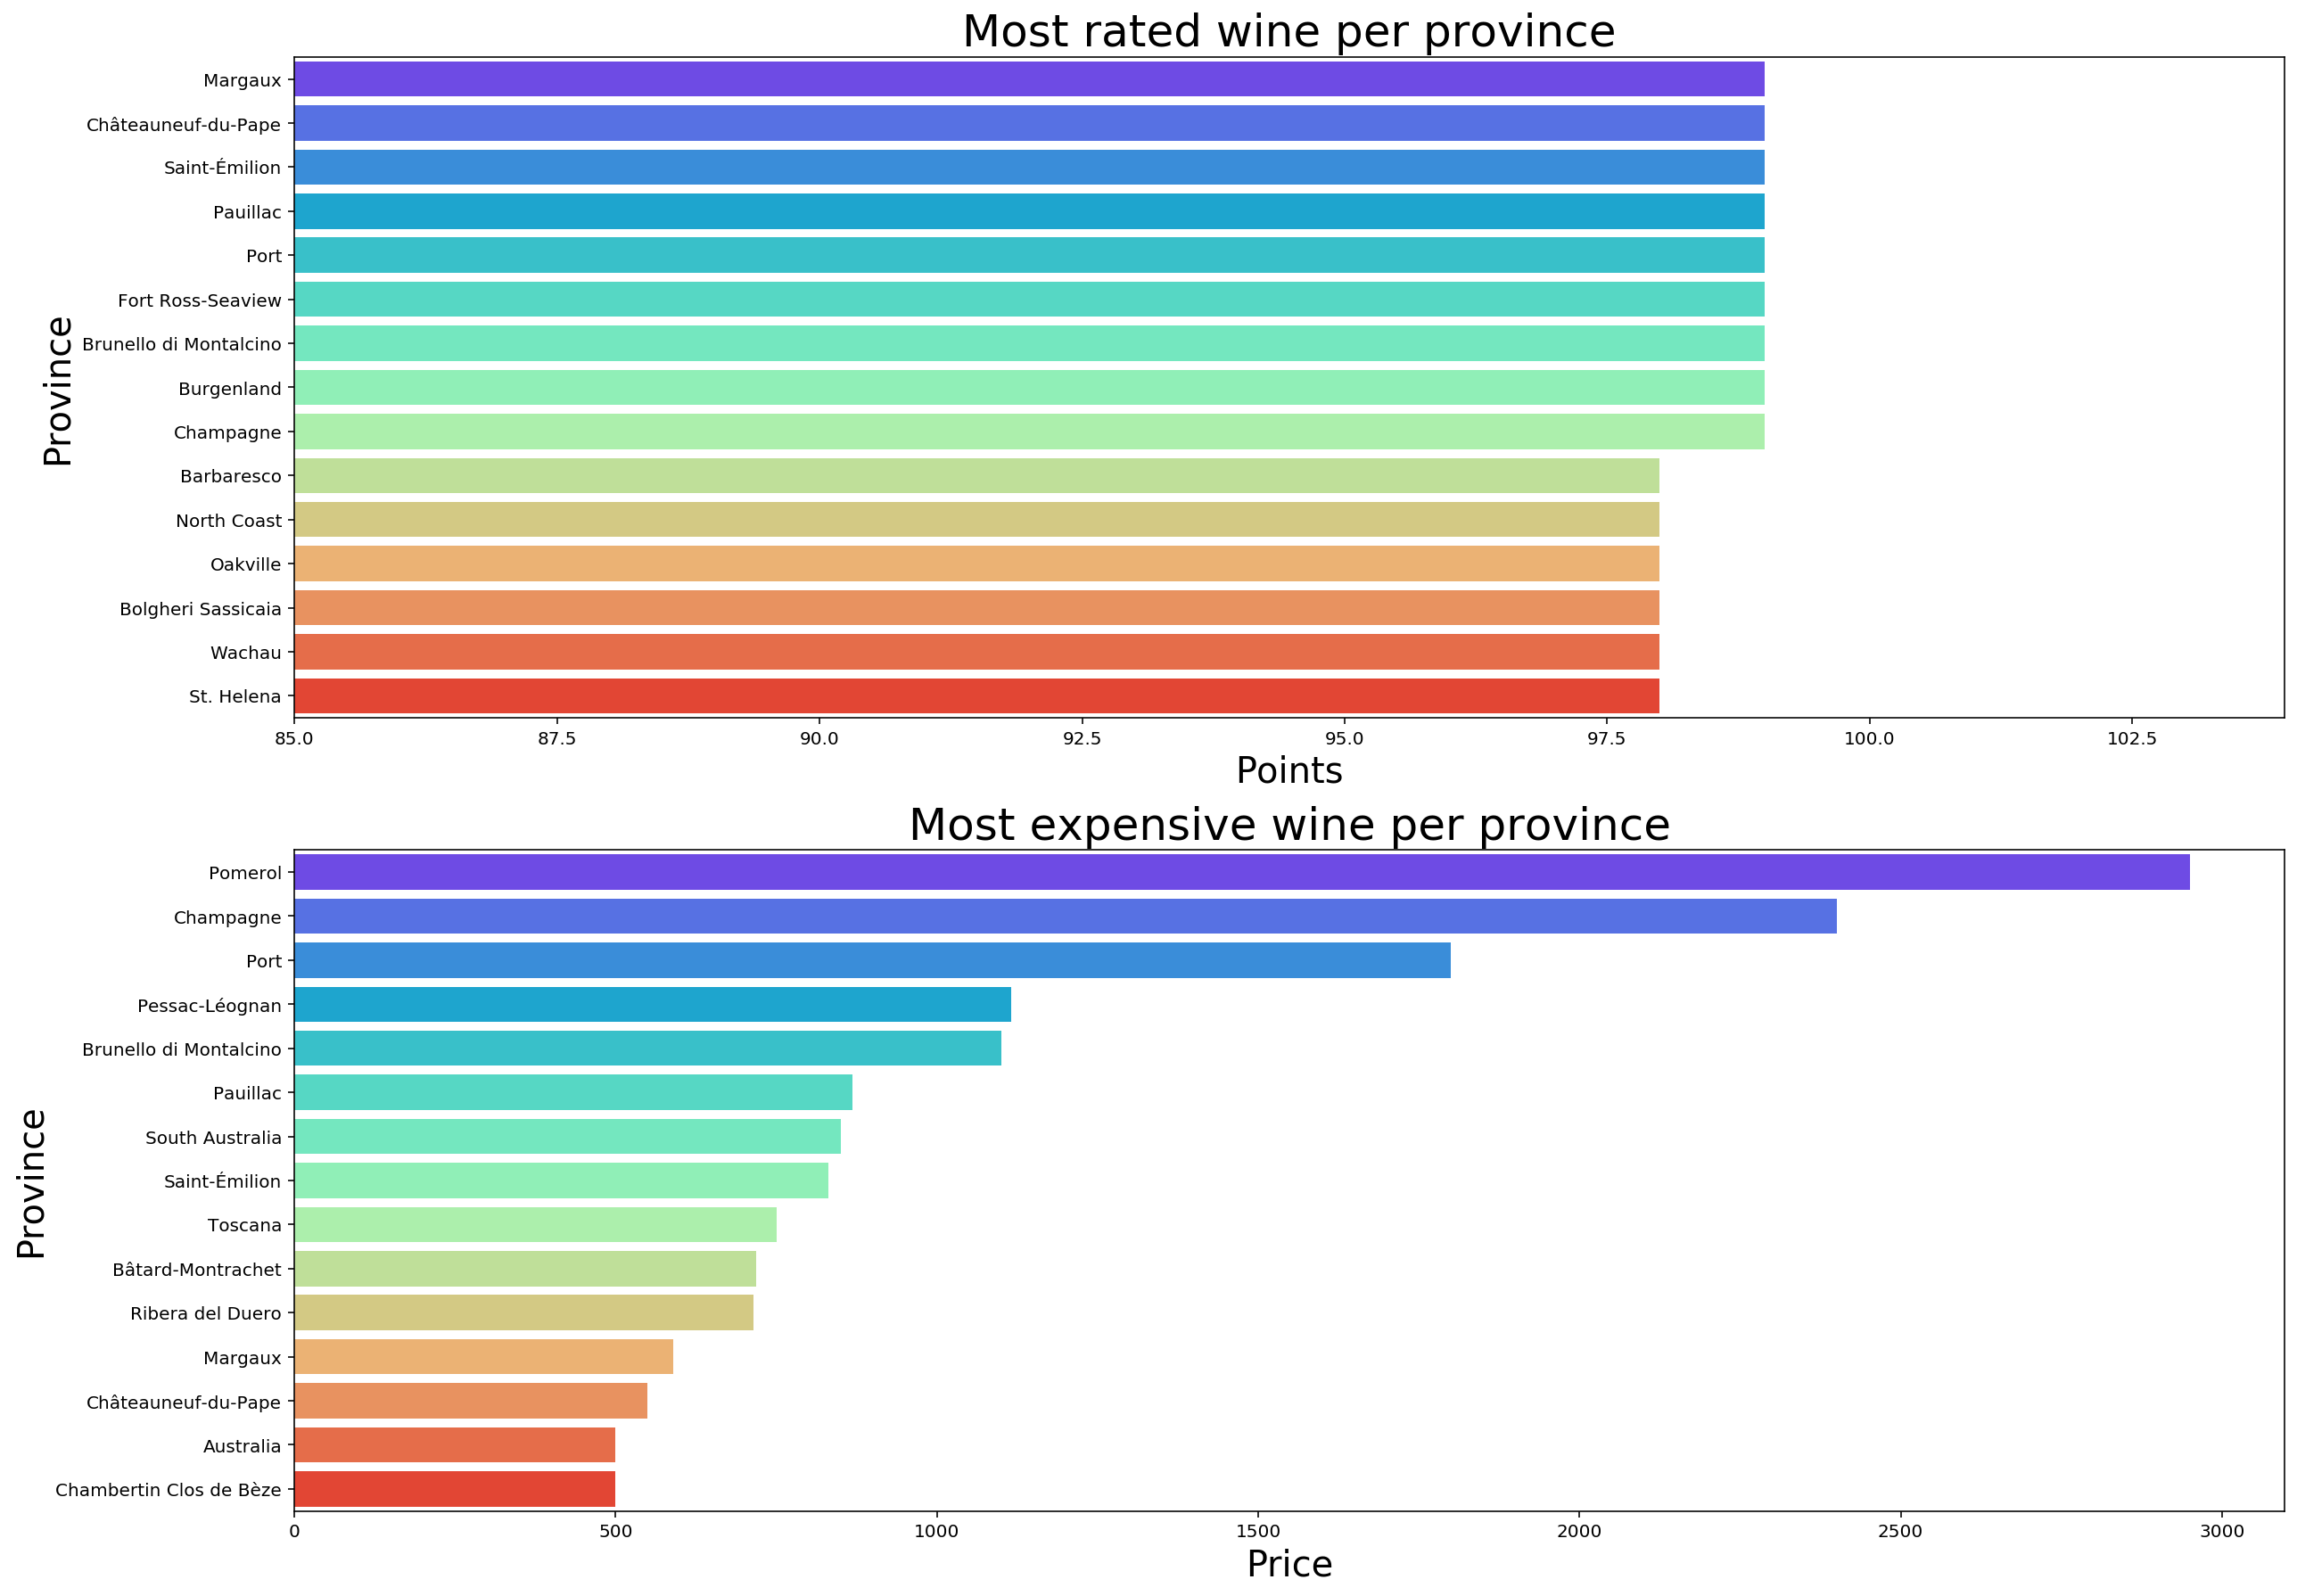

In [18]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = df.groupby(['province'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per province', fontsize=25)
ax1.set_ylabel('Province',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = df.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per province', fontsize=25)
ax2.set_ylabel('Province',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Variety, Province and Country

In [19]:
print("There are {} types of grapes(varieties) in this dataset such as {}... \n".
      format(len(df.variety.unique()), ", ".join(df.variety.unique()[0:5])))
print("There are {} provinces producing wine in this dataset such as {}... \n".
      format(len(df.province.unique()), ", ".join(df.province.unique()[0:5])))
print("There are {} countries producing wine in this dataset such as {}... \n".
      format(len(df.country.unique()), ", ".join(df.country.unique()[0:5])))  
print("There are {} winery producing wine in this dataset such as {}... \n".
      format(len(df.winery.unique()), ", ".join(df.winery.unique()[0:5]))) 

There are 542 types of grapes(varieties) in this dataset such as Rhône-style Red Blend, Port, Grenache, Grenache-Mourvèdre, Champagne Blend... 

There are 1112 provinces producing wine in this dataset such as Châteauneuf-du-Pape, Port, Champagne, Trento, Santa Maria Valley... 

There are 41 countries producing wine in this dataset such as France, Portugal, Italy, US, Chile... 

There are 8441 winery producing wine in this dataset such as Domaine de la Janasse, Domaine le Clos du Caillou, Fonseca, Domaine Moulin-Tacussel, Guillaume Gonnet... 



The plots below show the fifth first variety, province and country with more wines in the small dataset

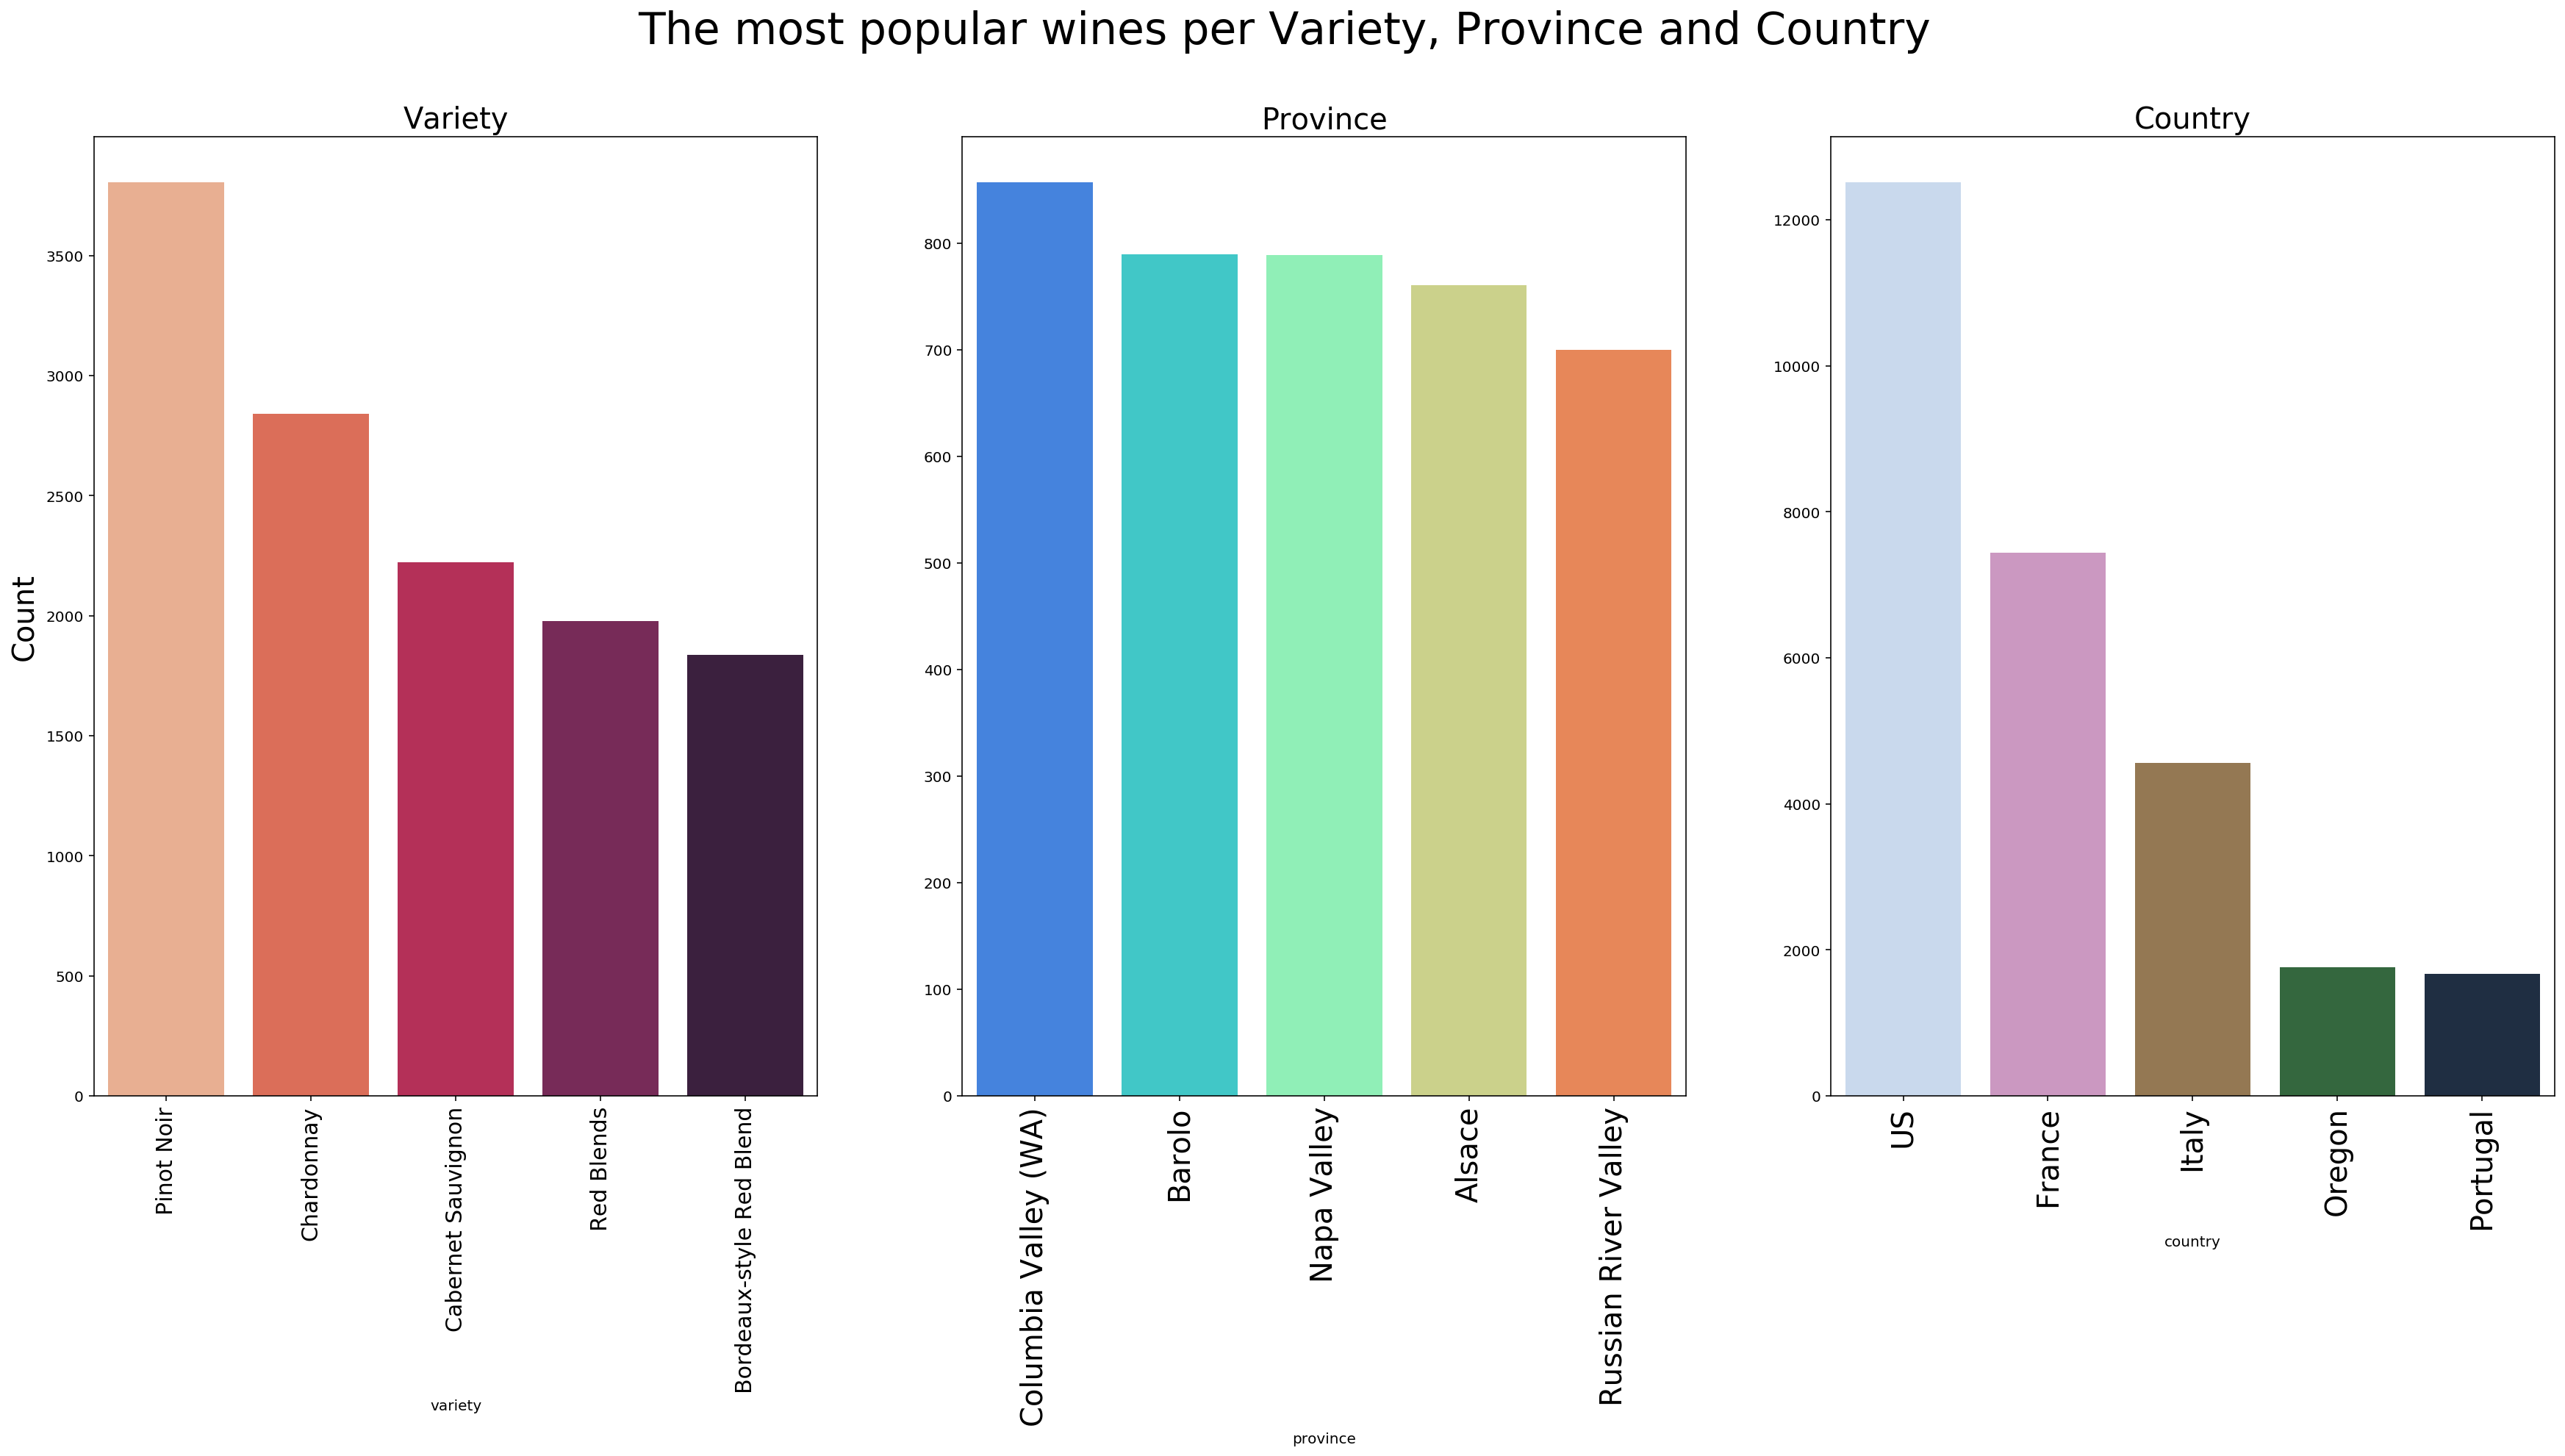

In [20]:
fig, ax = plt.subplots(1, 3, figsize=[30,12])
fig.suptitle("The most popular wines per Variety, Province and Country", fontsize=30)
sns.countplot('variety',data=df, ax=ax[0],palette='rocket_r', order=pd.value_counts(df['variety']).iloc[:5].index)
sns.countplot('province',data=df, ax = ax[1], palette='rainbow', order=pd.value_counts(df['province']).iloc[:5].index)
sns.countplot('country',data=df, ax=ax[2], palette='cubehelix_r',order=pd.value_counts(df['country']).iloc[:5].index)
ax[0].set_title('Variety', fontsize=20)
ax[1].set_title('Province', fontsize=20)
ax[2].set_title('Country', fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[2].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticklabels(pd.value_counts(df['variety']).iloc[:5].index, rotation=90, fontsize =15)
ax[1].set_xticklabels(pd.value_counts(df['province']).iloc[:5].index, rotation=90, fontsize =20)
ax[2].set_xticklabels(pd.value_counts(df['country']).iloc[:5].index, rotation=90, fontsize =20)
plt.show()

Most of the wines are from US, around 14.000 types of wine in this dataset. France (very famous for its wine) has around 7500 types of wine, follow for Italy, with around 5000 types of wine. Pinot Noir, Chardonay and Cabernet Sauvignon are the varieties that there are more in the dataset, and they are very common. These results do not surprise me because the data is from a US website.


## Wine Description

In [21]:
# I used the CountVectorizer to count words
cvec = CountVectorizer(strip_accents='unicode', ngram_range=(1, 1))
#strip_accents with 'unicode' that removes the accents and uses NKFD normalization.
#ngram_range is the lower and upper boundary of the range of n values for different n-grams to be extracted, in this case one word
X_all = cvec.fit_transform(df['description'])
columns = cvec.get_feature_names()

# this is a large sparse matrix.
X_all

<34814x15475 sparse matrix of type '<class 'numpy.int64'>'
	with 1279837 stored elements in Compressed Sparse Row format>

# mira que quito de la parte de abajo

In [121]:
# Converting X_all toarray() may use too much memory (particularly for 32-bit Python!)
print(X_all.shape)
print("Requires {} ints to do a .toarray()!".format(np.prod(X_all.shape)))

(34813, 15474)
Requires 538696362 ints to do a .toarray()!


In [22]:
#I use np.sum() to convert it directly from the sparse matrix!
#This is enormously more memory-efficient because 
#it only requires one int per column since summing across columns is the total word count.


def get_freq_words(sparse_counts, columns):

    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype 
    # which we then convert into a 1-D ndarray for sorting

    word_counts = np.ravel(X_all.sum(axis=0))
    freq_words = pd.Series(word_counts, index=columns).sort_values(ascending=False)

    return freq_words


freq_words = get_freq_words(X_all, columns)
print(freq_words[:20])

and        93111
the        61947
of         50656
this       34787
with       27086
is         25931
wine       23361
it         17463
in         17043
flavors    16873
on         16503
palate     16230
to         15005
aromas     14465
fruit      12829
acidity    11001
from       10712
tannins    10382
drink      10270
that        9805
dtype: int64


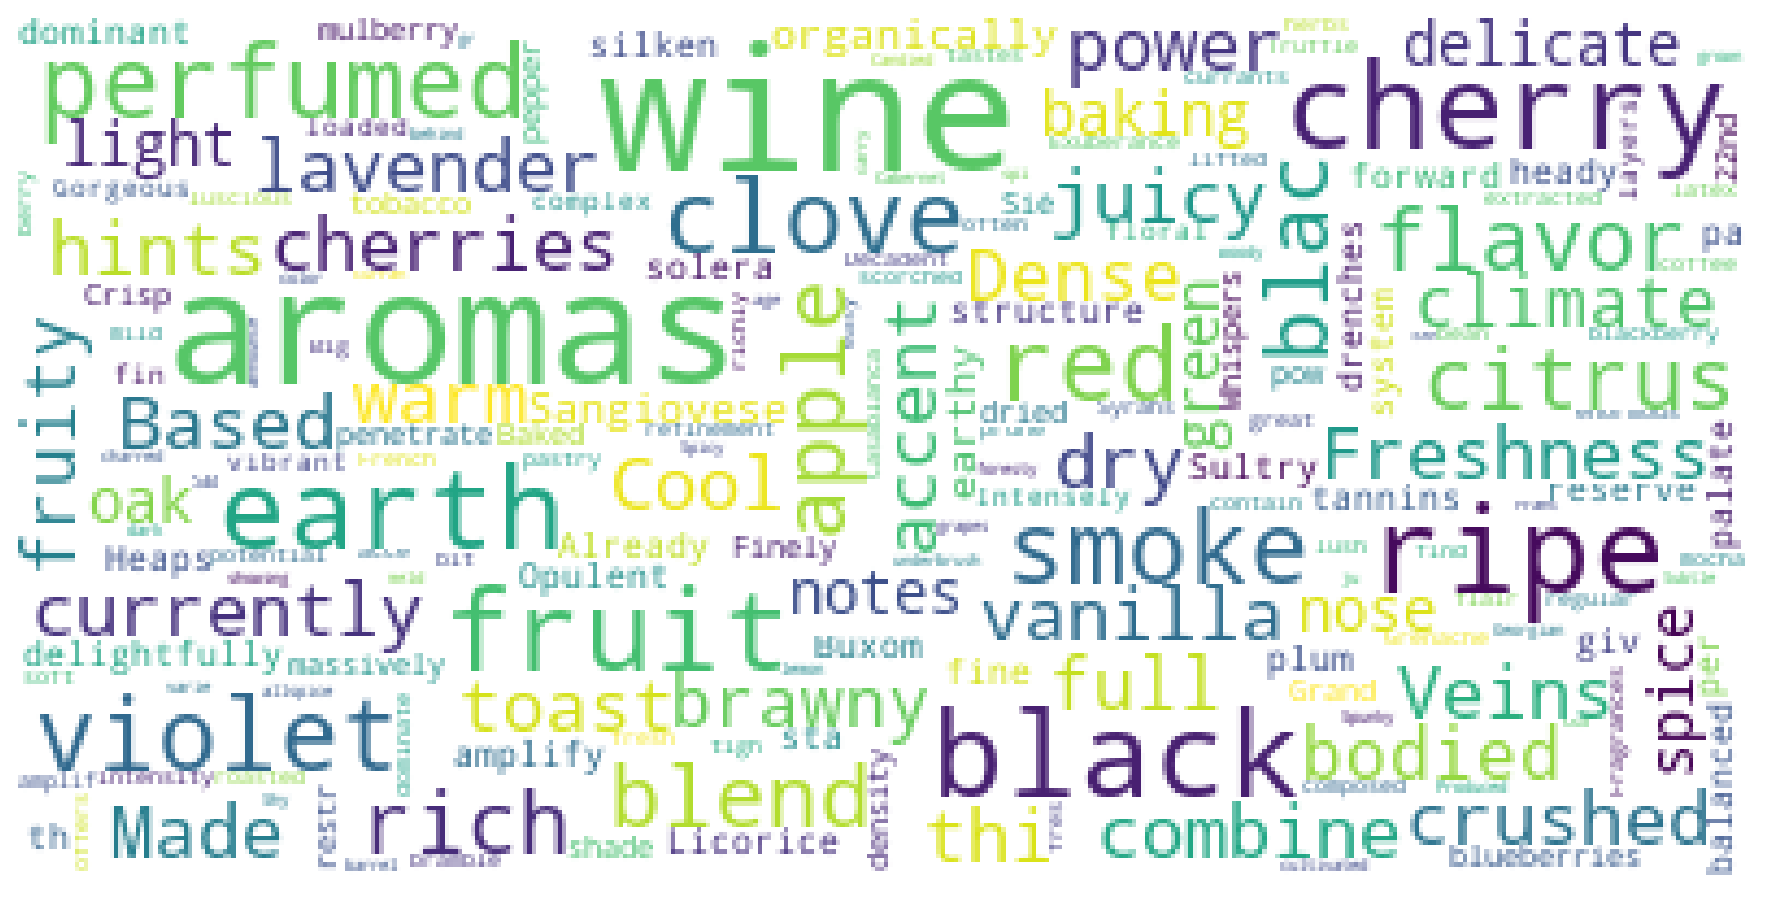

In [23]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['description']))

print(wordcloud)
fig = plt.figure(figsize = (18, 8),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Histagram of word counts

In [24]:
def hist_counts(series, bins=np.logspace(0, 5, 25), density=True):

    fig, ax = plt.subplots(figsize=(8, 4))
    series.hist(bins=bins, ax=ax, density=density)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Word count distribution')

    return fig, ax

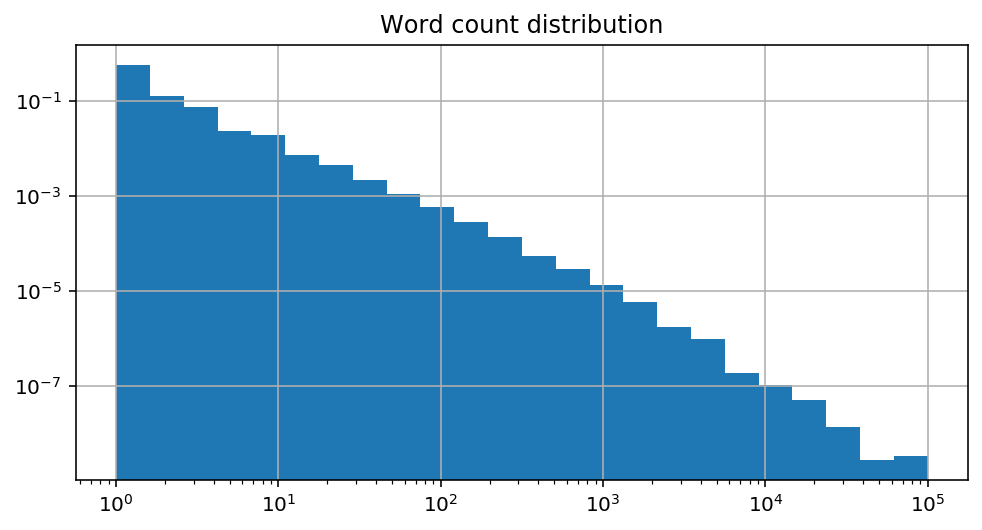

In [25]:
fig, ax = hist_counts(freq_words)

Note above that many of the most common words actually may not be relevant to determining wine language.
I used 'stop_words' inside the CountVectorizer because I am going to eliminate most of these common words like 'and', 'the', 'of',... and so on.

wine       23361
flavors    16873
palate     16230
aromas     14465
fruit      12829
acidity    11001
tannins    10382
drink      10270
black       9505
finish      9438
ripe        8494
cherry      8488
nose        8117
red         7226
roger       7029
voss        7026
spice       5414
oak         5051
berry       5046
fresh       5015
dtype: int64


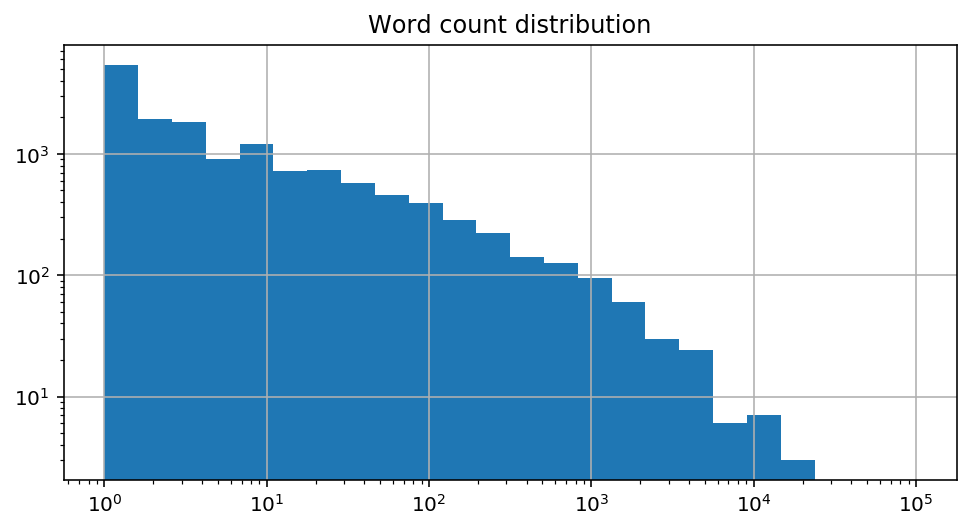

In [26]:
cvec = CountVectorizer(strip_accents='unicode',
                       stop_words="english", 
                       ngram_range=(1, 1))

X_all = cvec.fit_transform(df['description'])
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)

print(freq_words[:20])
fig, ax = hist_counts(freq_words, density=False)

- We can see a huge difference in the frequence words after remove some of the common word that they are not relative with wine language.
- This words are used for sommeliers in the wine description (aroma, tannins, flavors, acidity, palate....). 


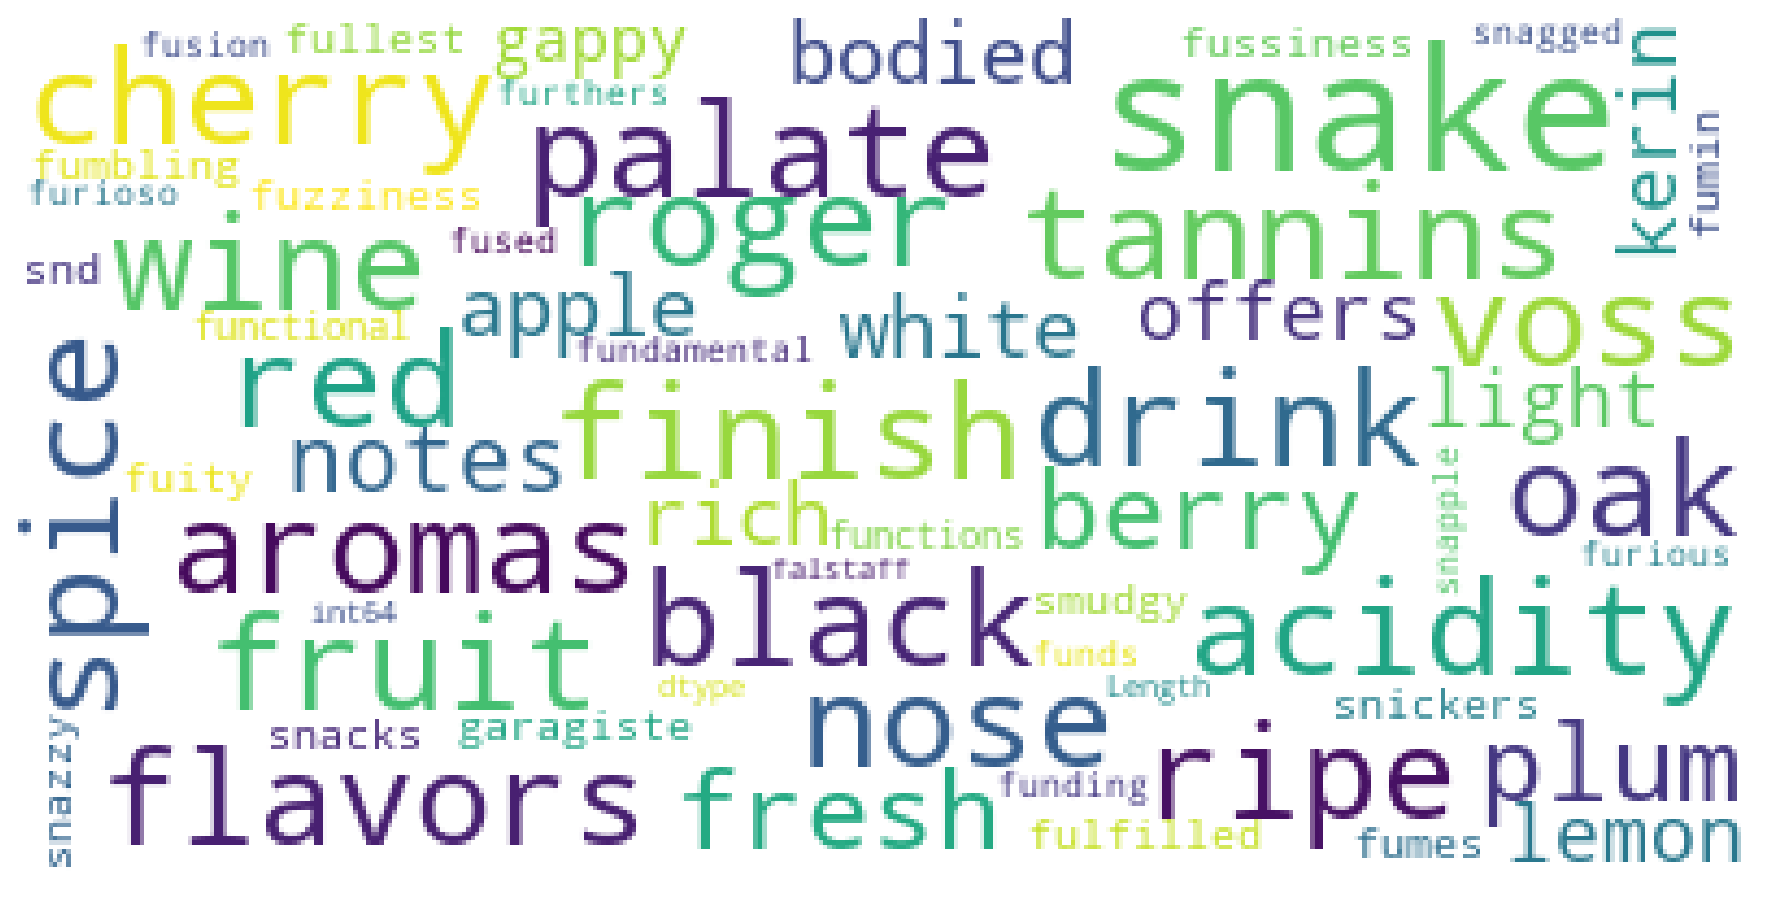

In [27]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(freq_words))

print(wordcloud)
fig = plt.figure(figsize = (18, 8),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
wine_mask = np.array(Image.open("wine_mask_2.png"))
# Values of 255 are pure white, whereas values of 1 are black
# I used the transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [29]:
#Transform the mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
#Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

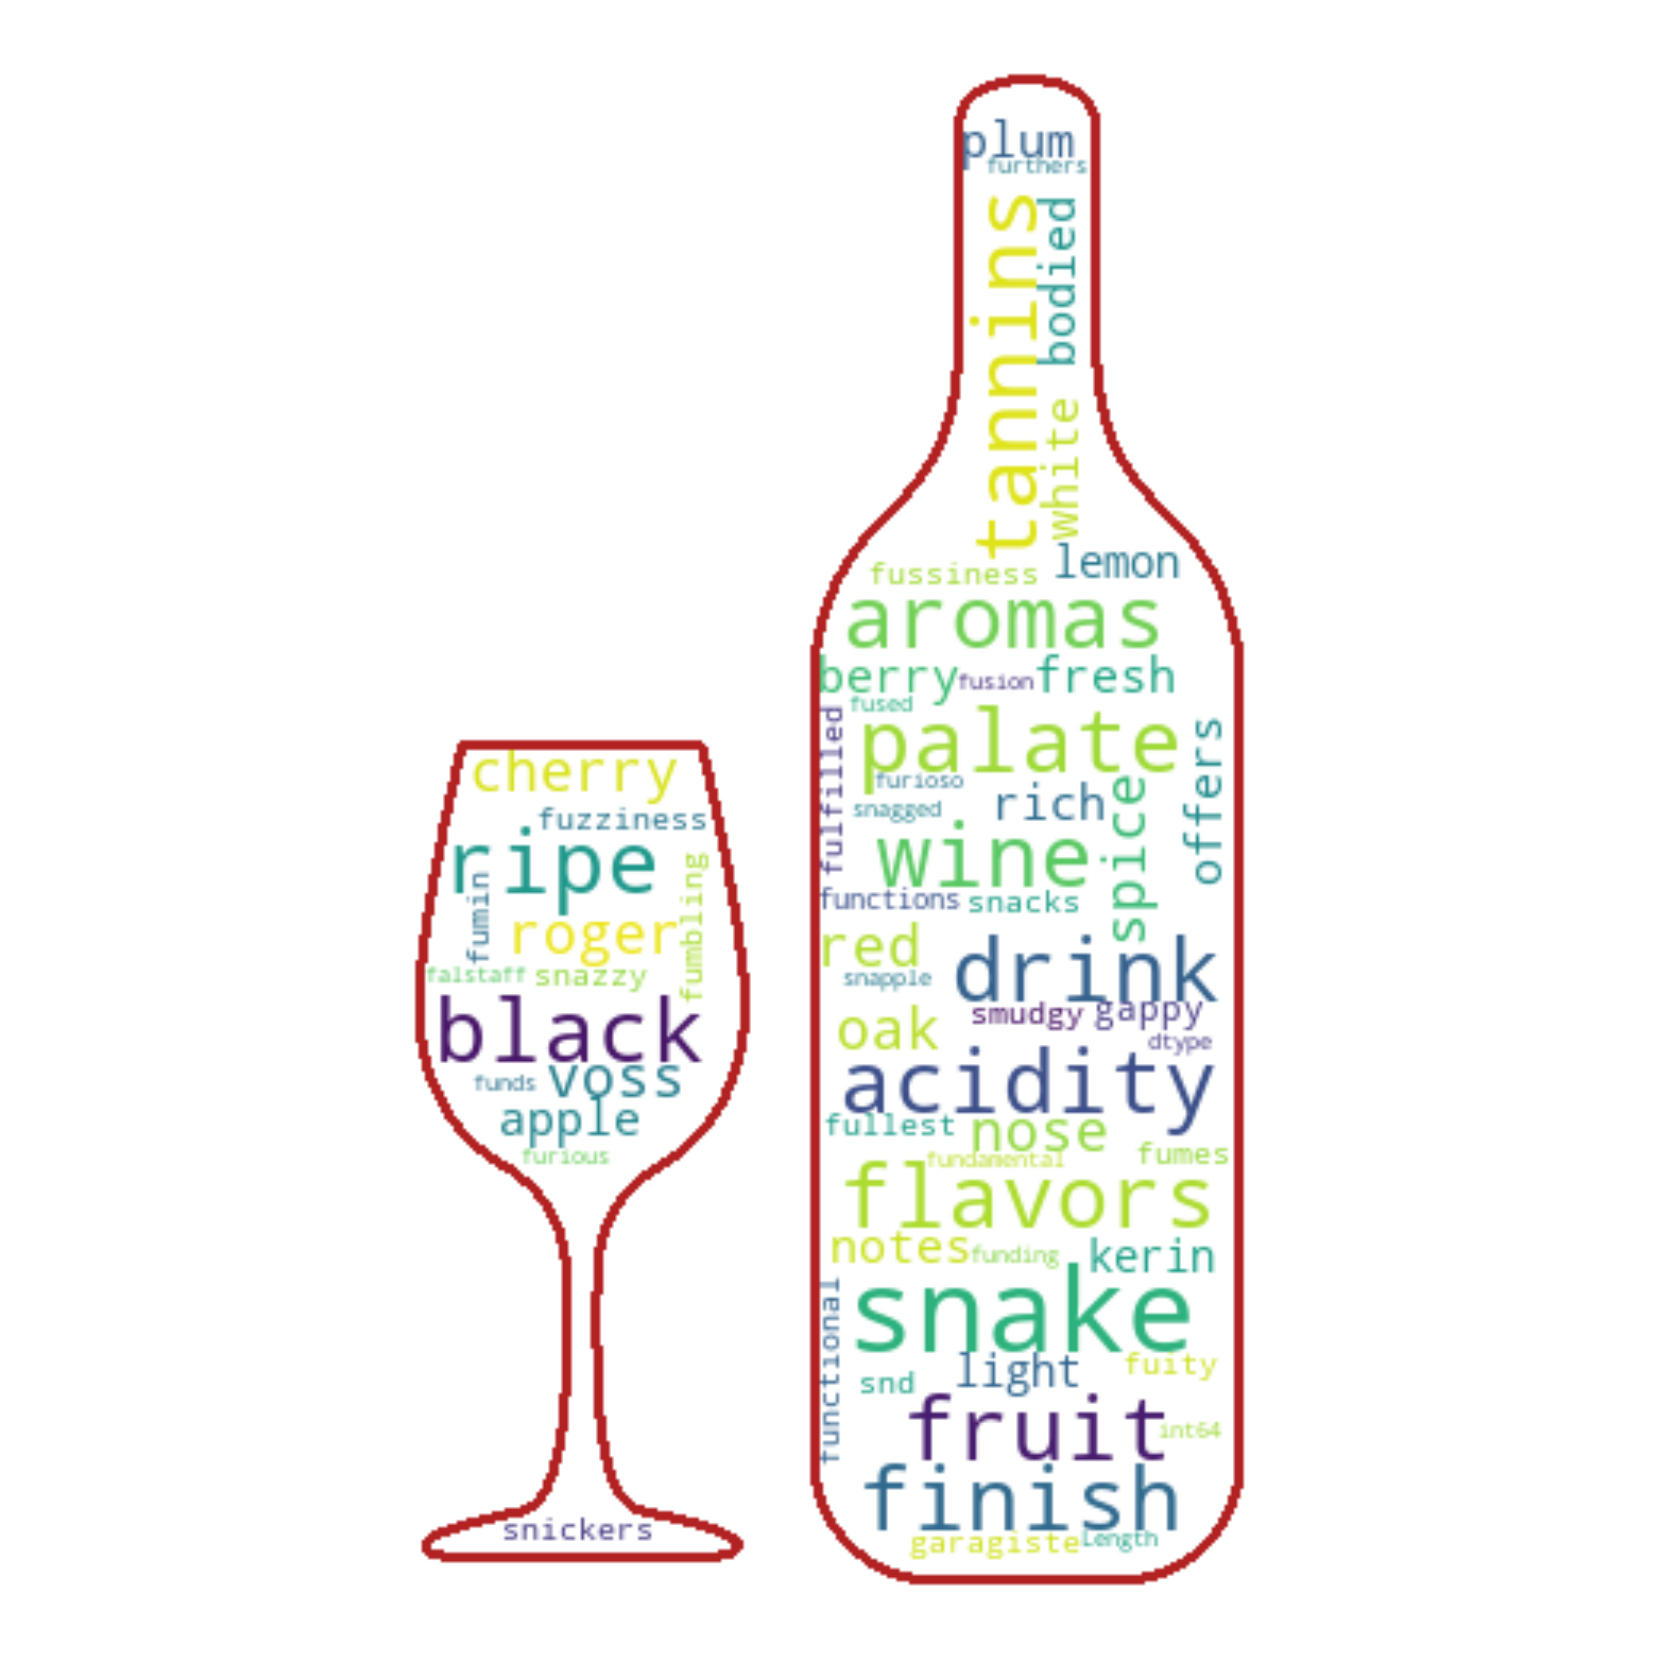

In [31]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(str(freq_words))

# store to file
wc.to_file("./wine_mask_small.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# BIG WINE DATASET

In [32]:
vino = pd.read_csv('big_wine.csv')

In [33]:
vino.head()

country                                        description  \
0  Portugal  This is ripe and fruity, a wine that is smooth...   
1        US  Tart and snappy, the flavors of lime flesh and...   
2        US  Pineapple rind, lemon pith and orange blossom ...   
3        US  Much like the regular bottling from 2012, this...   
4     Spain  Blackberry and raspberry aromas show a typical...   

                          designation  points  price        province  \
0                            Avidagos      87   15.0           Douro   
1                                 NaN      87   14.0          Oregon   
2                Reserve Late Harvest      87   13.0        Michigan   
3  Vintner's Reserve Wild Child Block      87   65.0          Oregon   
4                        Ars In Vitro      87   15.0  Northern Spain   

              region_1         taster_name  \
0                  NaN          Roger Voss   
1    Willamette Valley        Paul Gregutt   
2  Lake Michigan Shore  Alexander Peartree   
3    Willamette Valley        Paul Gregutt   
4              Navarra   Michael Schachner   

                                               title             variety  \
0      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
1      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
2  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
3  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
4  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  vintage  
0  Quinta dos Avidagos   2011.0  
1            Rainstorm   2013.0  
2           St. Julian   2013.0  
3         Sweet Cheeks   2012.0  
4               Tandem   2011.0

In [34]:
vino.describe(include='all')

country                                        description designation  \
count   131902                                             131902       94520   
unique      43                                             131872       40854   
top         US  Almost too much of a good thing, Passo is a th...     Reserve   
freq     58512                                                  2        2064   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

               points          price    province     region_1 taster_name  \
count   131902.000000  131902.000000      131902       110814      108629   
unique            NaN            NaN         450         1270          19   
top               NaN            NaN  California  Napa Valley  Roger Voss   
freq              NaN            NaN       38886         4598       22391   
mean        88.535670      36.252263         NaN          NaN         NaN   
std          3.080984      45.990621         NaN          NaN         NaN   
min         80.000000       4.000000         NaN          NaN         NaN   
25%         86.000000      17.000000         NaN          NaN         NaN   
50%         88.000000      26.000000         NaN          NaN         NaN   
75%         91.000000      44.000000         NaN          NaN         NaN   
max        100.000000    5000.000000         NaN          NaN         NaN   

         title     variety              winery        vintage  
count   131902      131901              131902  127145.000000  
unique  130468         742               17390            NaN  
top         \n  Pinot Noir  Wines & Winemakers            NaN  
freq       240       14211                 234            NaN  
mean       NaN         NaN                 NaN    2011.312344  
std        NaN         NaN                 NaN       3.952845  
min        NaN         NaN                 NaN    1904.000000  
25%        NaN         NaN                 NaN    2009.000000  
50%        NaN         NaN                 NaN    2012.000000  
75%        NaN         NaN                 NaN    2014.000000  
max        NaN         NaN                 NaN    2018.000000

## Distribution of the Wine Prices

- The same what happened in the small dataset †here is a huge difference between the wine prices from \\$4 to \\$5000.
- The mean is \\$36.2100 higher if we compare with the 50% value \\$26 
- There are many outliers in the data because of the presence of some expensive wines in France wineries.

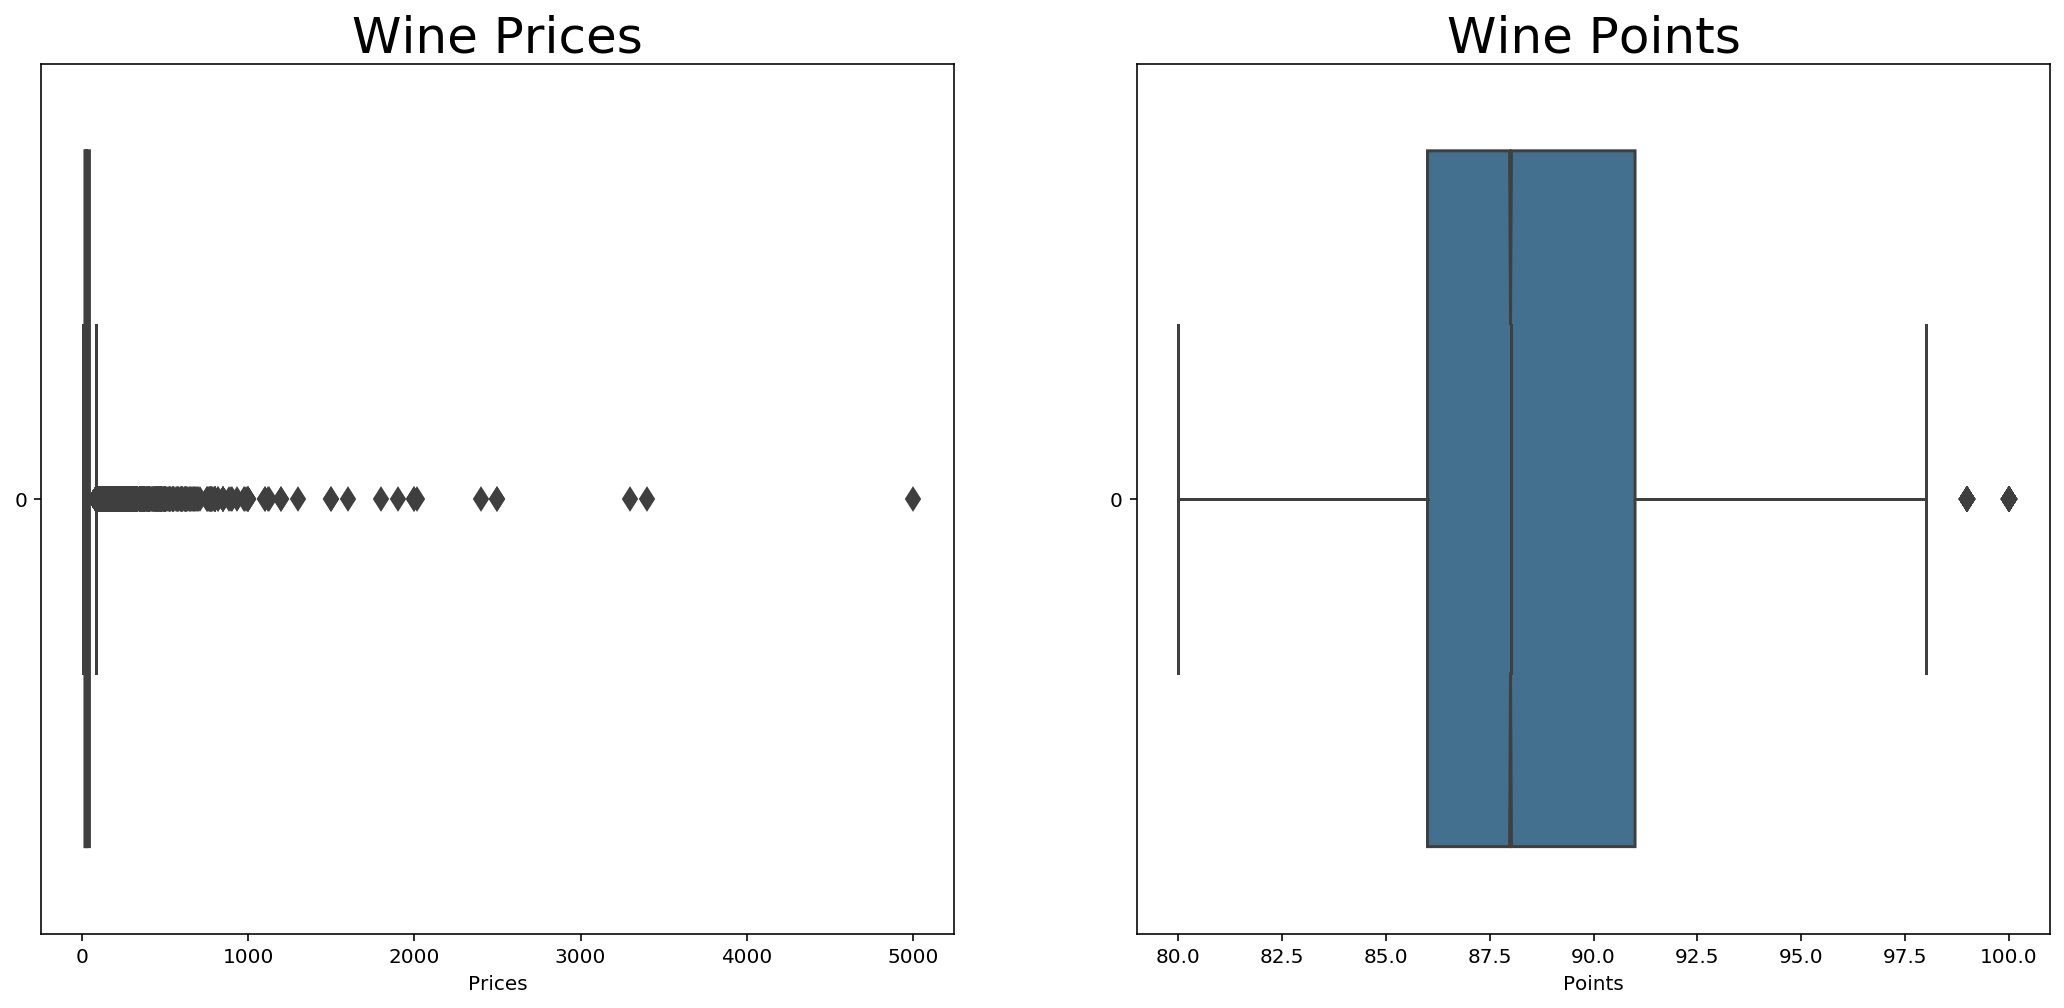

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(data=vino.price, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax[0])
sns.boxplot(data=vino.points, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax[1])
ax[0].set_title('Wine Prices', fontsize=25)
ax[1].set_title('Wine Points', fontsize=25)
ax[0].set_xlabel('Prices')
ax[1].set_xlabel('Points')



plt.show()


In [36]:
price_500 = vino[vino["price"]<500].price.value_counts()
df1v = pd.DataFrame({'price': price_500.index,'number of wines': price_500.values})

In [37]:
point = vino.points.value_counts()
df2v = pd.DataFrame({'points': point.index, 'number of points':point.values})

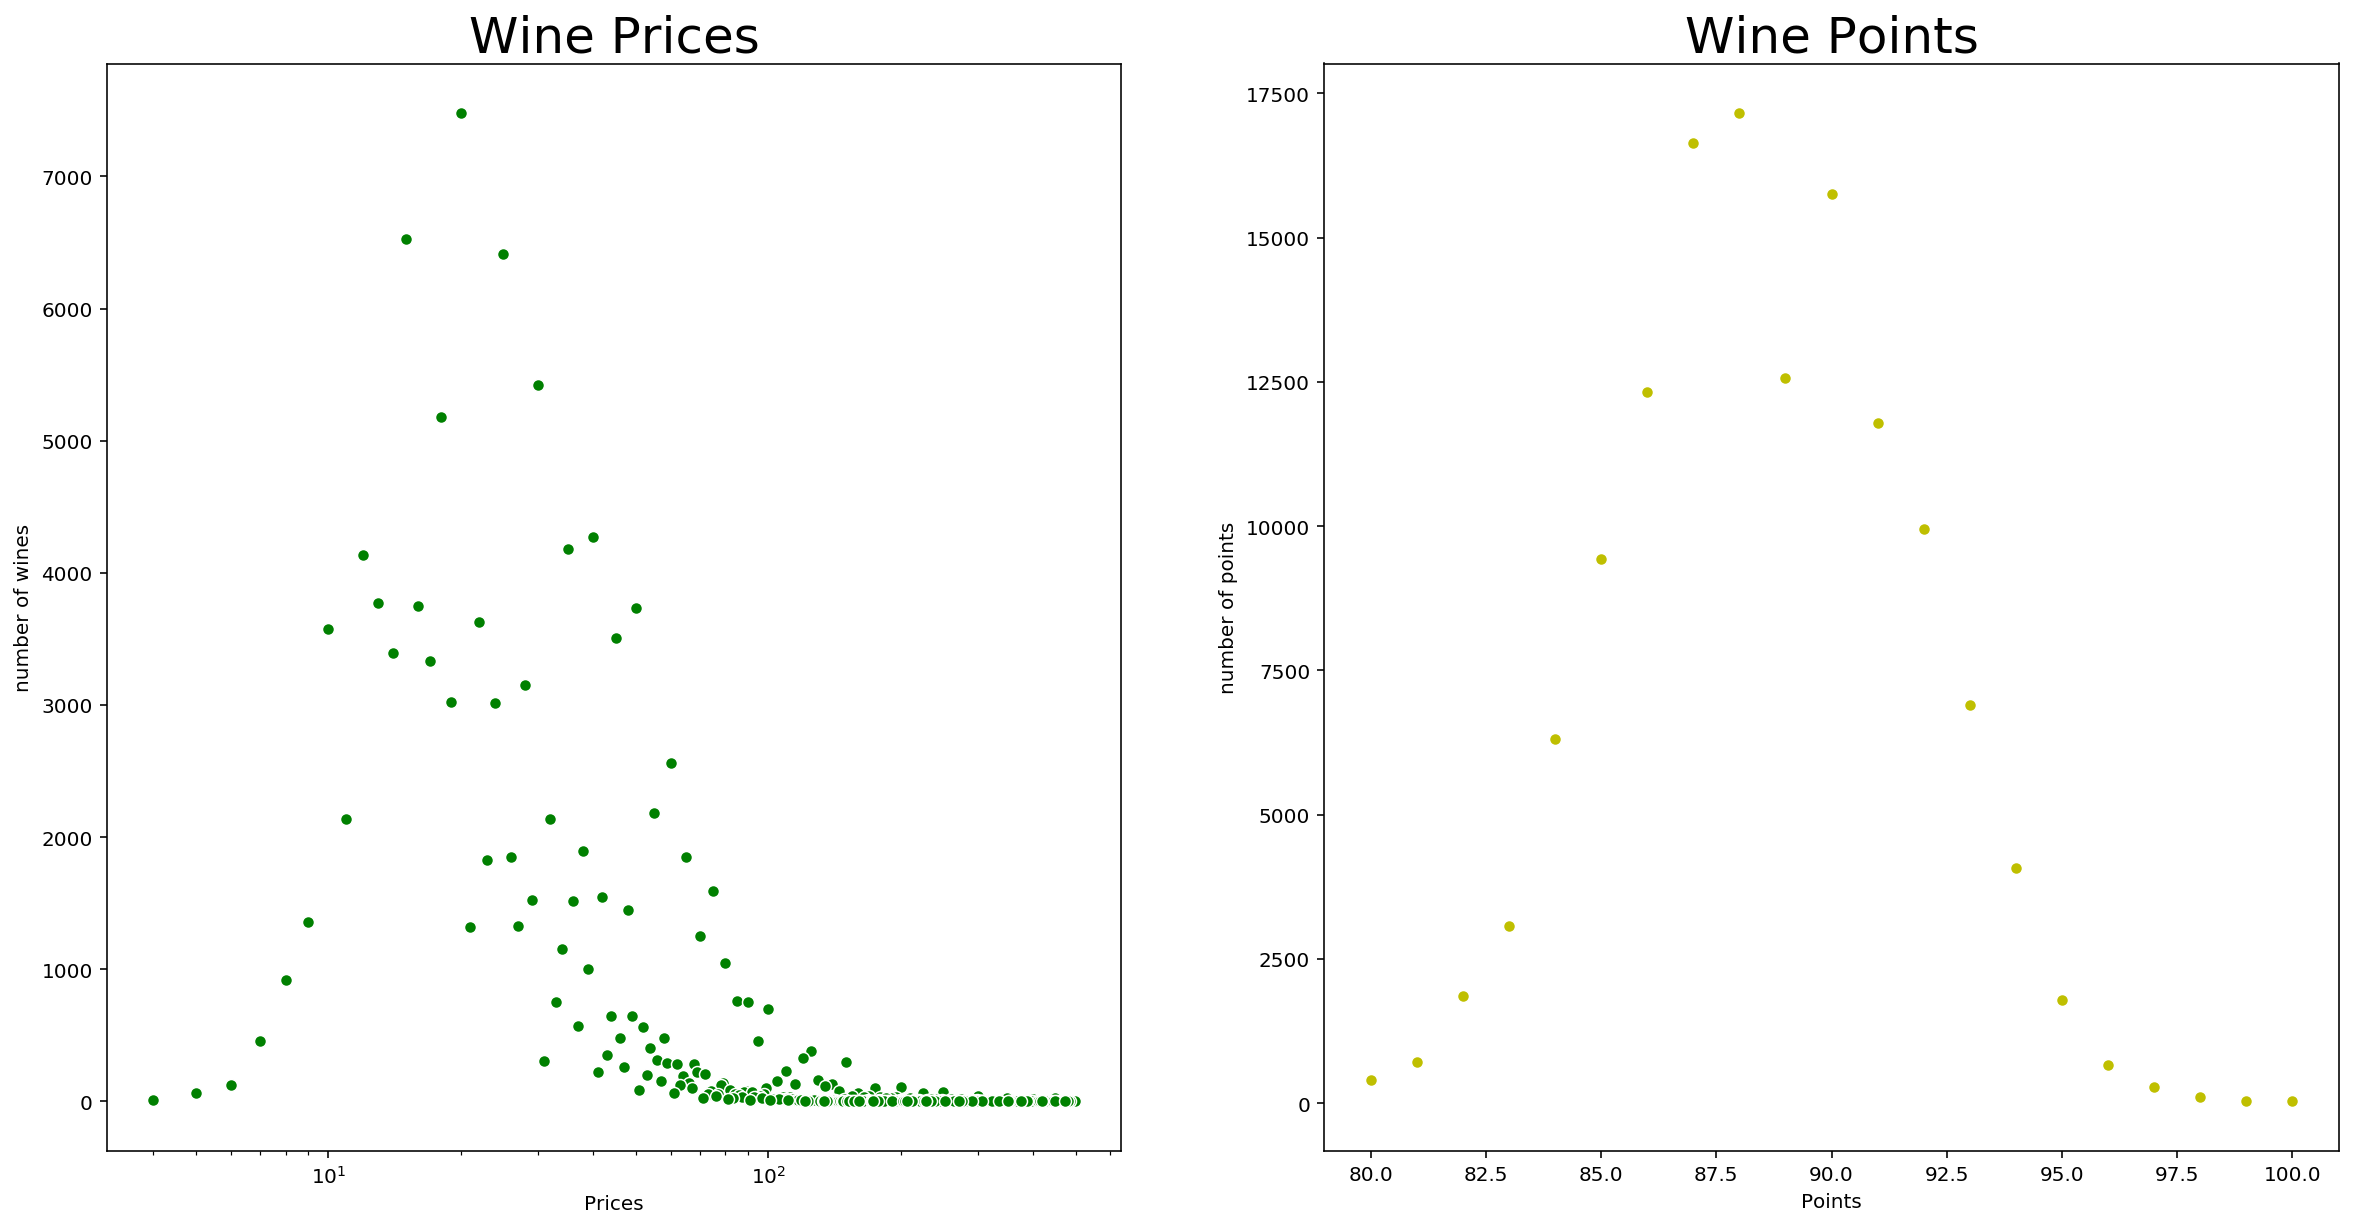

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.scatterplot(x = 'price', y='number of wines', data=df1v, color='g', ax=ax[0])
sns.scatterplot(x = 'points', y='number of points', data=df2v, color='y', ax=ax[1])
ax[0].set_title('Wine Prices', fontsize=25)
ax[1].set_title('Wine Points', fontsize=25)
ax[0].set_xscale('log')
ax[0].set_xlabel('Prices')
ax[1].set_xlabel('Points')
plt.show()

## Relation between Points and Prices

- There is a positive relationship between the points in the reviews and the prices of the wines.

In [39]:
vino[['points', 'price']].corr()

points    price
points  1.00000  0.39032
price   0.39032  1.00000

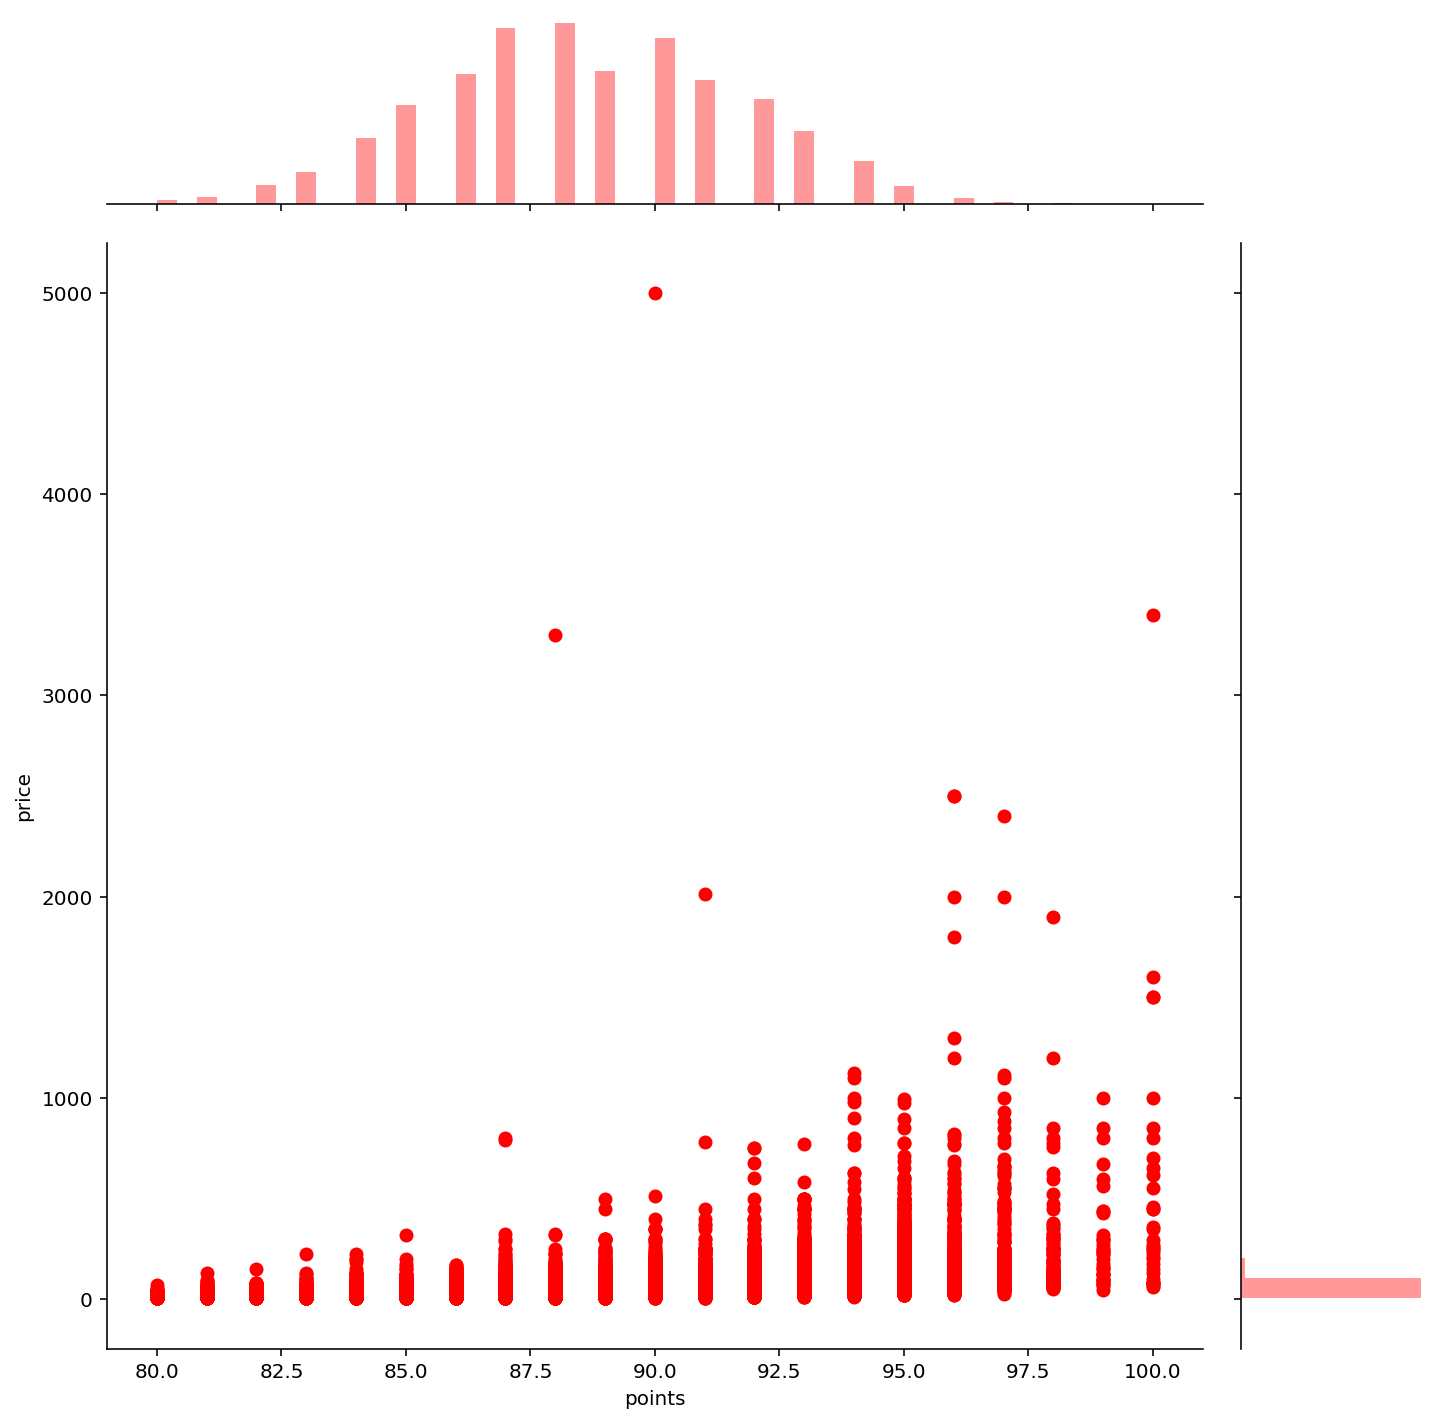

In [40]:
ax = sns.jointplot(x= "points", y="price", data=vino, color='r', height=10);

- Most of the price's wines are between 0 and \\$150 with some outliers data extending to 5000.
- Most of the points reviews are around 80 and 100.
- Below its the association between the points and the wines which price is below of \\$150. 
- Price between \\$4 to \\$20 have points between 80 and 90. Prices from \\$80 have mostly points between 90 and 97.5 with a few values of 100. 

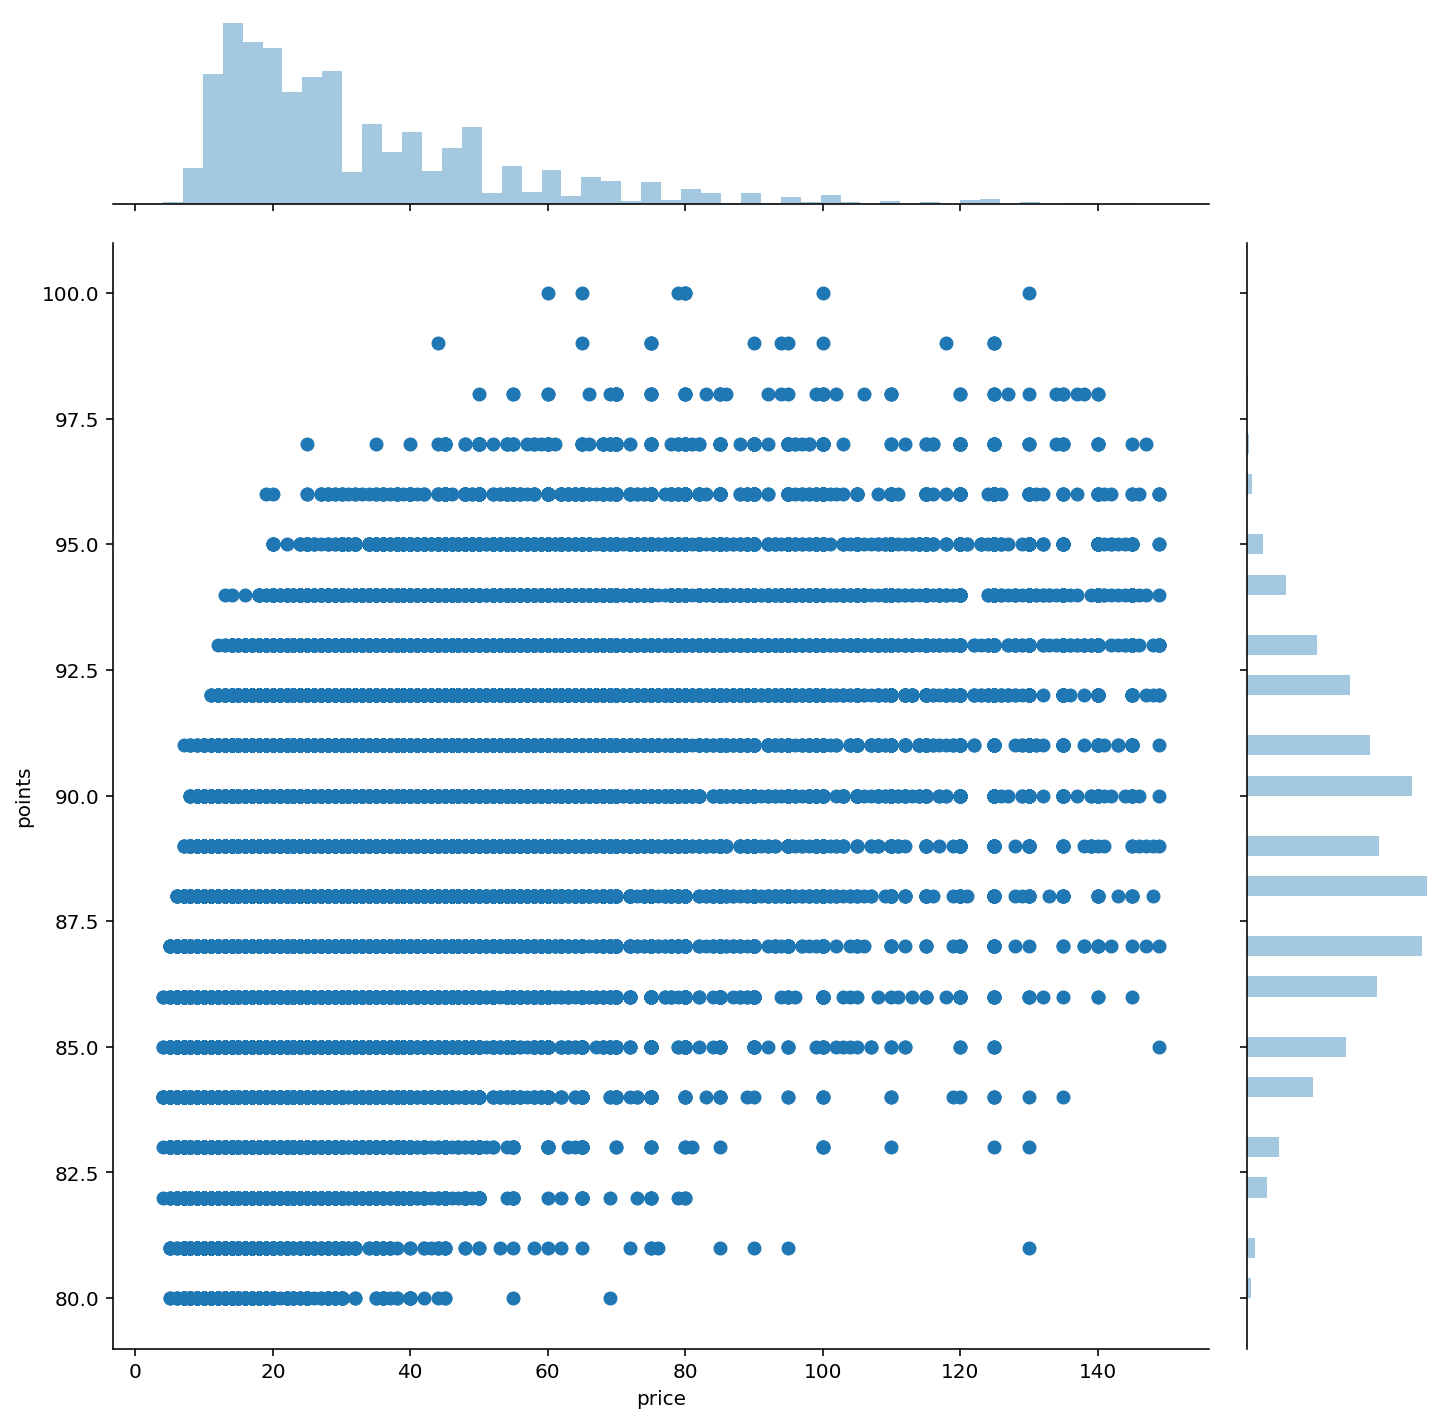

In [41]:
# wines with price less than $150
price_150= vino[vino['price']<150]
sns.jointplot(x="price", y="points", data=price_150, height=10)
plt.show()

## Relation between Variety and Prices and Points

- Terrantez is original from Portugal and Gelber Traminer is original from Austria are the variety with the highest average of points in the wines. The highest points are for the wines made form common varieties, like Cabernet Sauvignon, Shiraz, Merlot...
- Ramisco (from Portugal) is the variety with highest average of prices in the wines. The most expensive wine es made from Bordeaux style red blend. This variety combines two or more of the classic Bordeaux varieties: Cabernet Sauvignon, Merlot, Cabernet Franc, Petit Verdot, Carmenère and Malbec.
- The mix of Malagouzia (from Greece) and Chardonnay (from France) are the varieties with highest average of quality/prices in the wines.

### Average

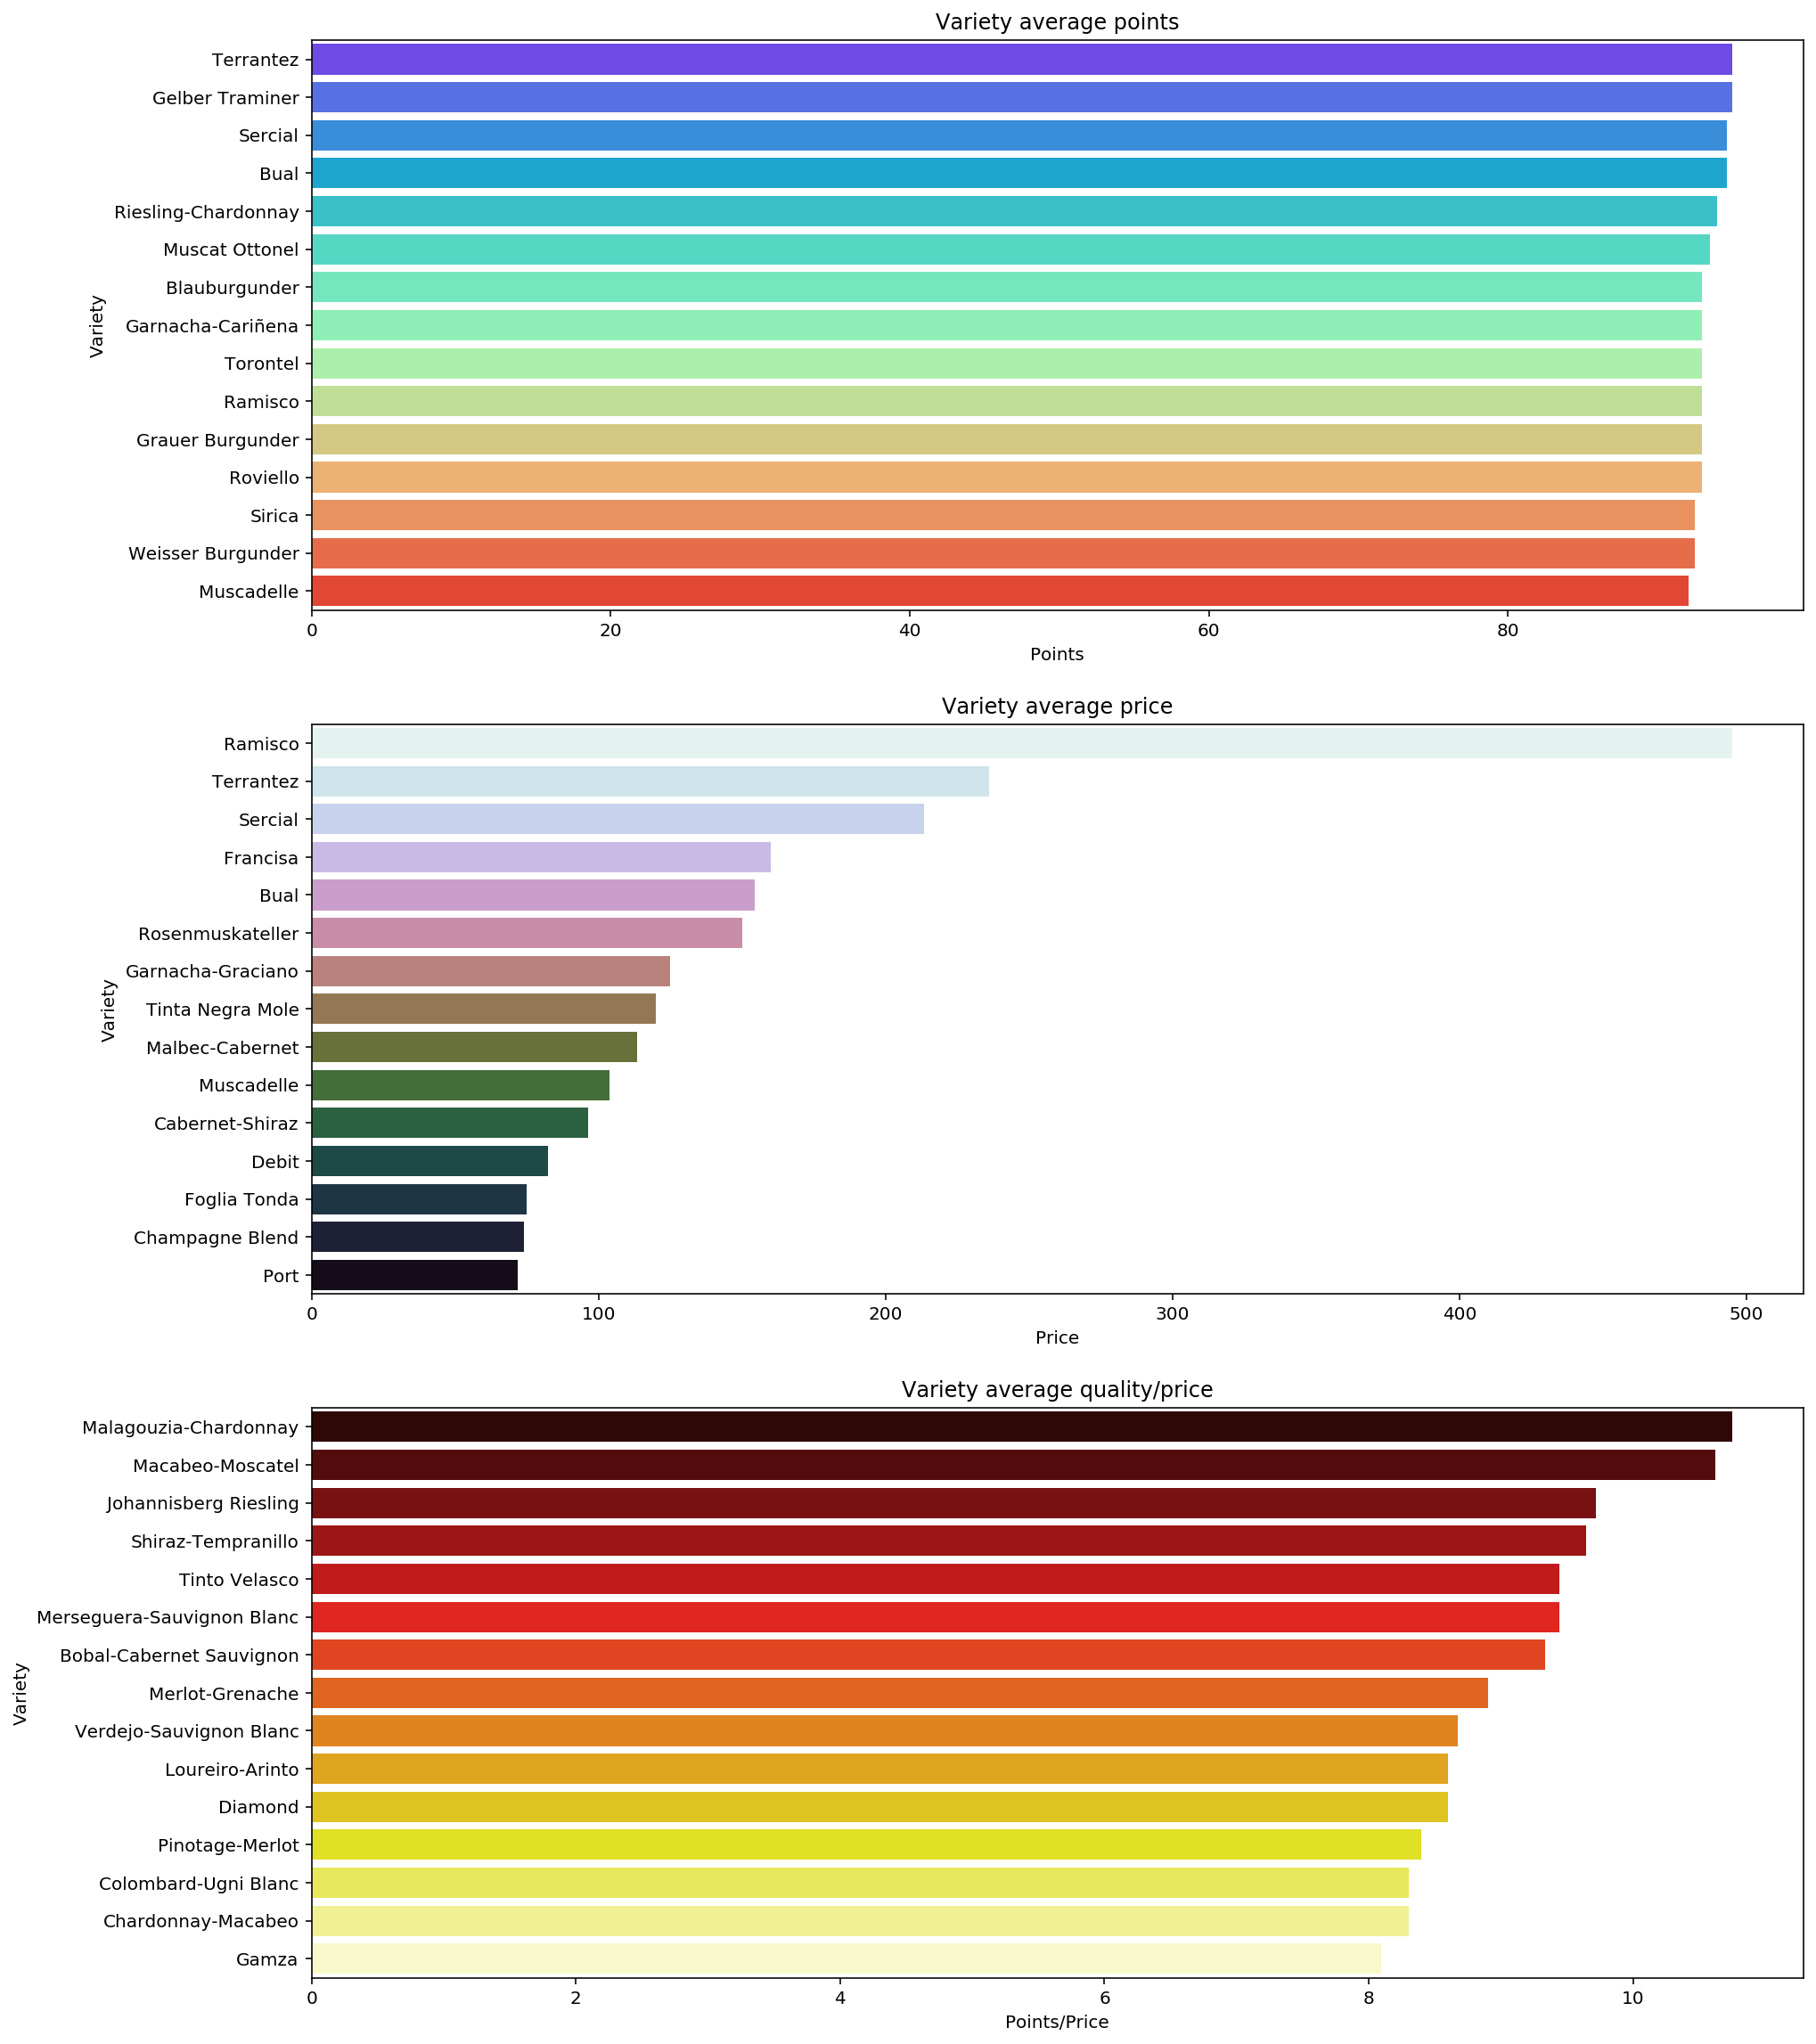

In [42]:
vino_variety_points = vino.groupby('variety').mean().sort_values(by='points', ascending = False)[:15]
vino_variety_price = vino.groupby('variety').mean().sort_values(by='price', ascending = False)[:15]
vino_variety = vino.groupby('variety').mean()
vino_variety['points/price'] = (vino_variety.points / vino_variety.price)
vino_variety = vino_variety.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_variety_points['points'], y = vino_variety_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_variety_price['price'], y = vino_variety_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = vino_variety['points/price'], y = vino_variety.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Variety average points')
ax[0].set_ylabel('Variety')
ax[0].set_xlabel('Points')
ax[1].set_title('Variety average price')
ax[1].set_ylabel('Variety')
ax[1].set_xlabel('Price')
ax[2].set_title('Variety average quality/price')
ax[2].set_ylabel('Variety')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

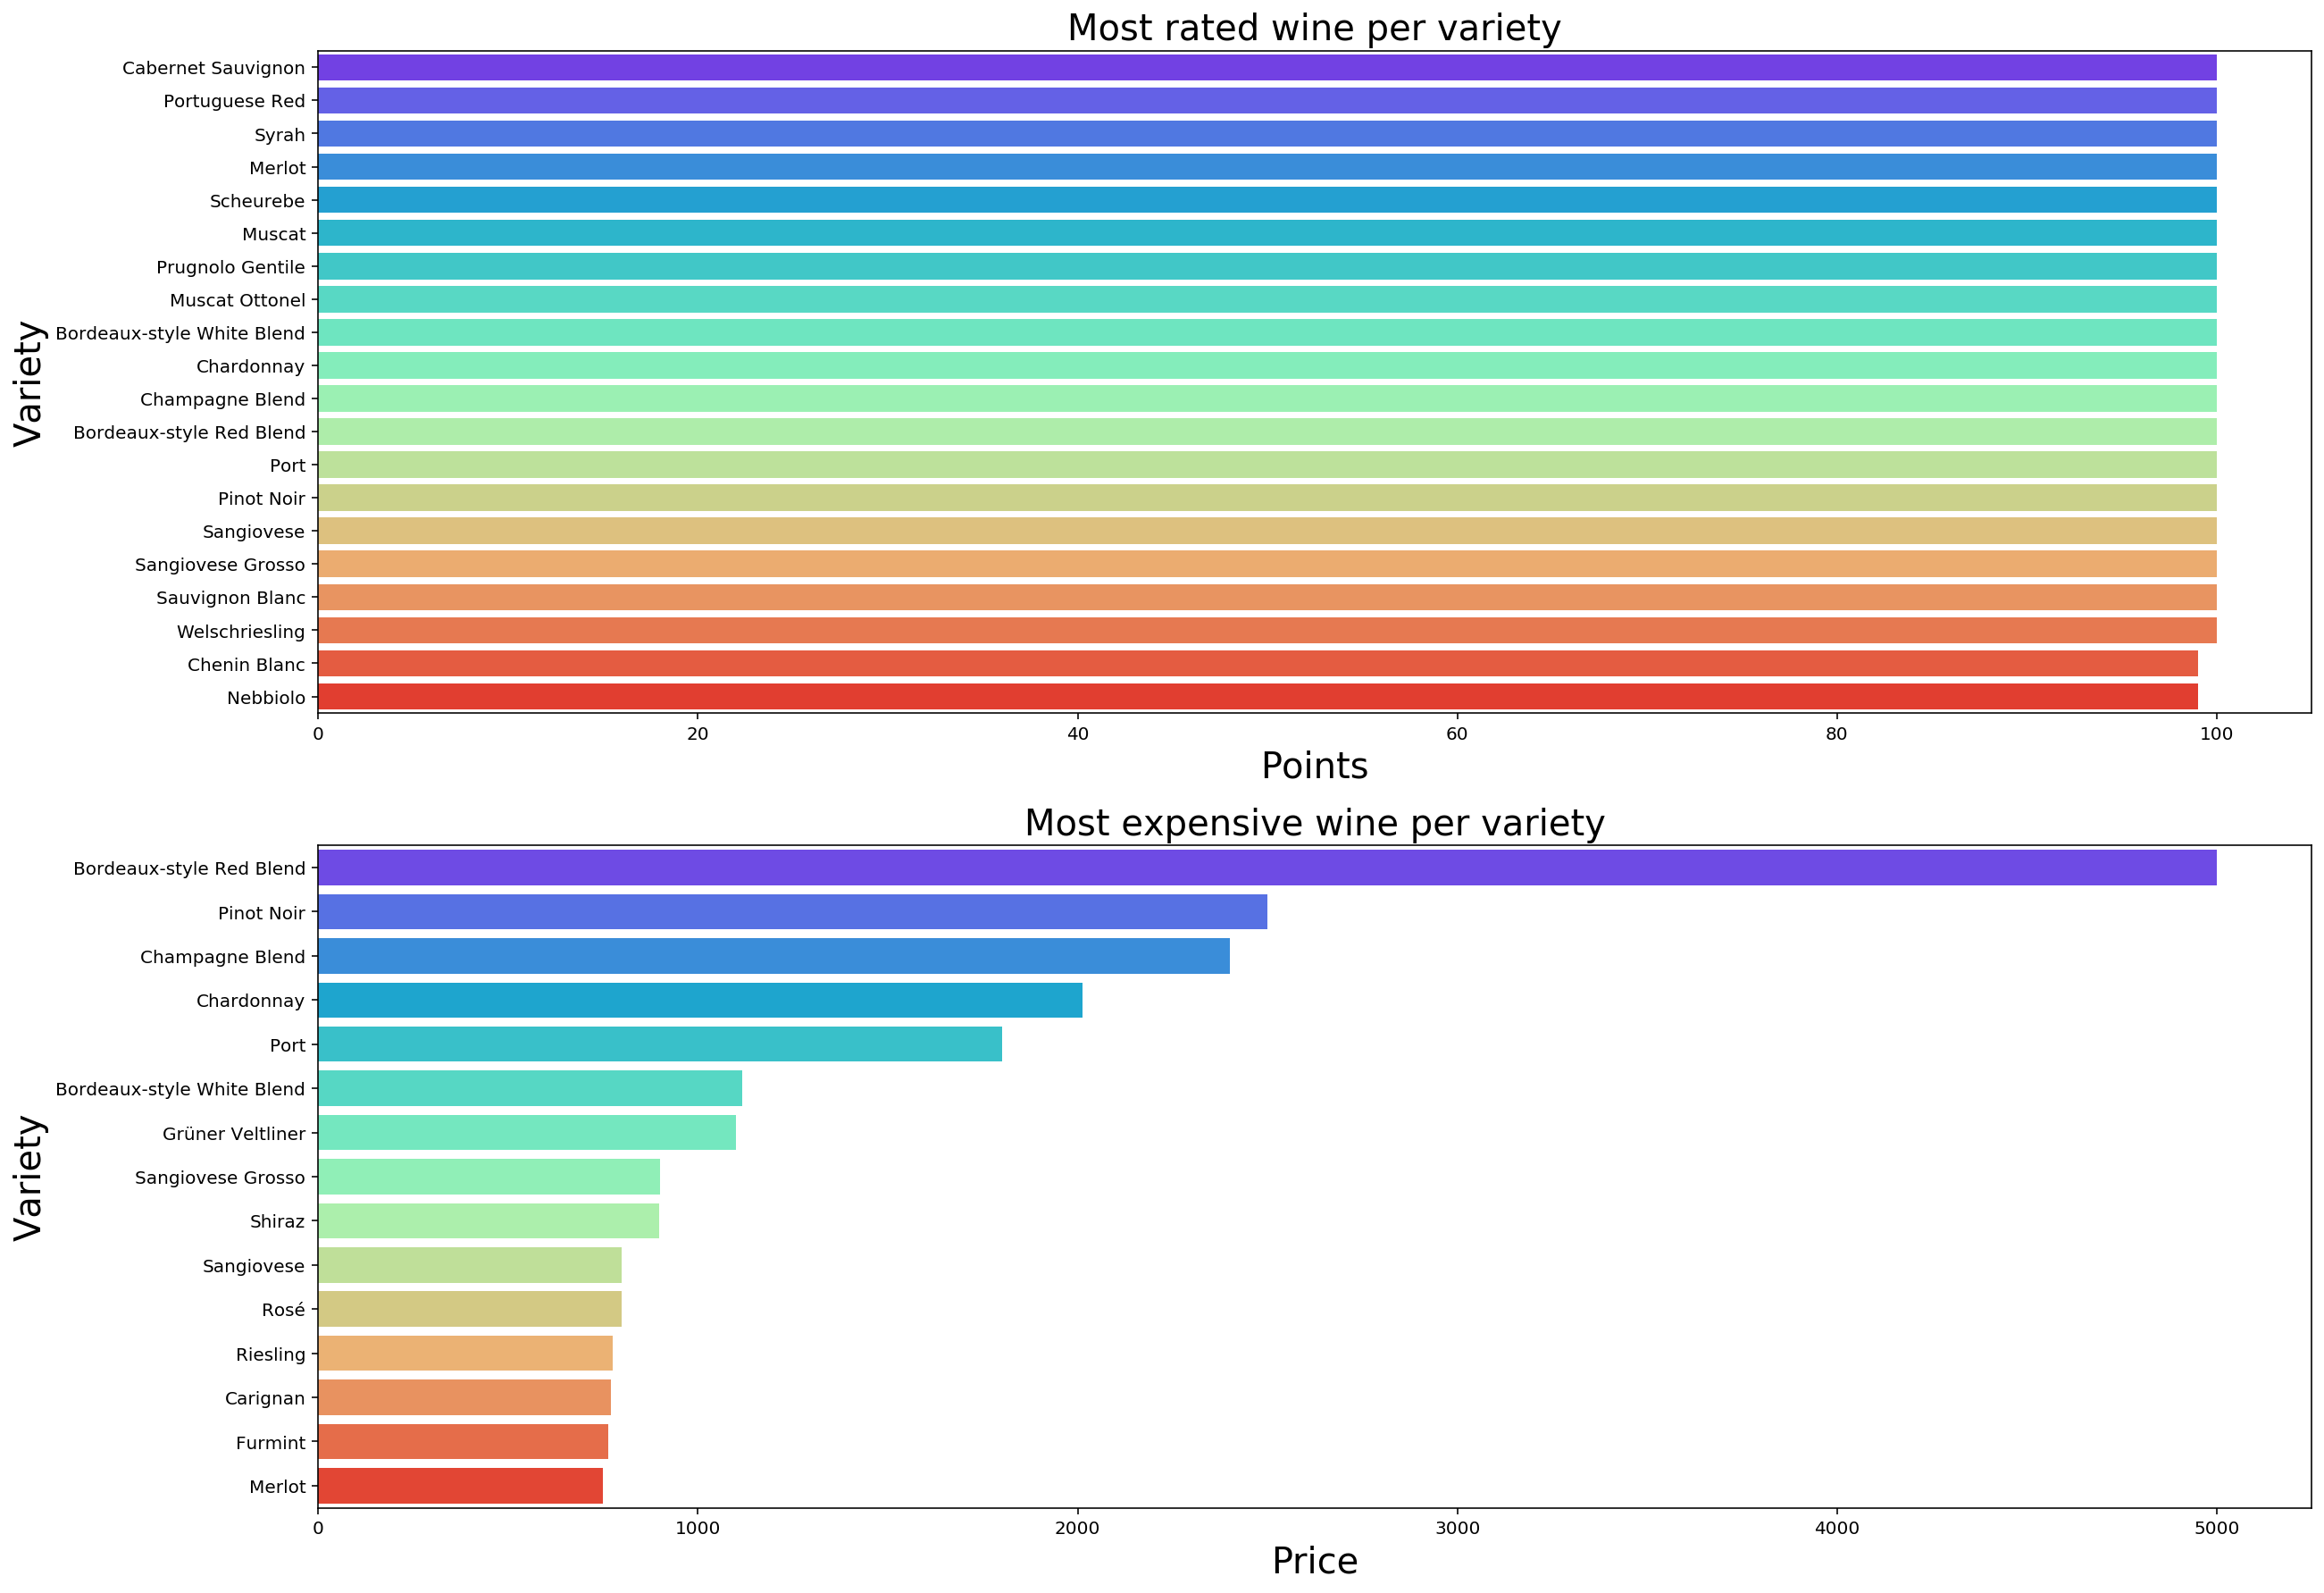

In [43]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per variety', fontsize=20)
ax1.set_ylabel('Variety',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
country_price_max = vino.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per variety', fontsize=20)
ax2.set_ylabel('Variety',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Relation between Country and Prices and Points 

- As happened above in the small dataset I surprised so much with these results.  
- The wines from England have the highest average of points. However, Italy, Portugal, US, Australia, Austria, France are the countries which wines have the highest points. 
- The wines from China have the highest average of price. The most expensive wines are from France, but this country has also a lot of cheap wines.
- Kosovo is the country with the best average quality/price wines.
- The results in the three plots are very similar that I obtained in the small dataset.

### Average

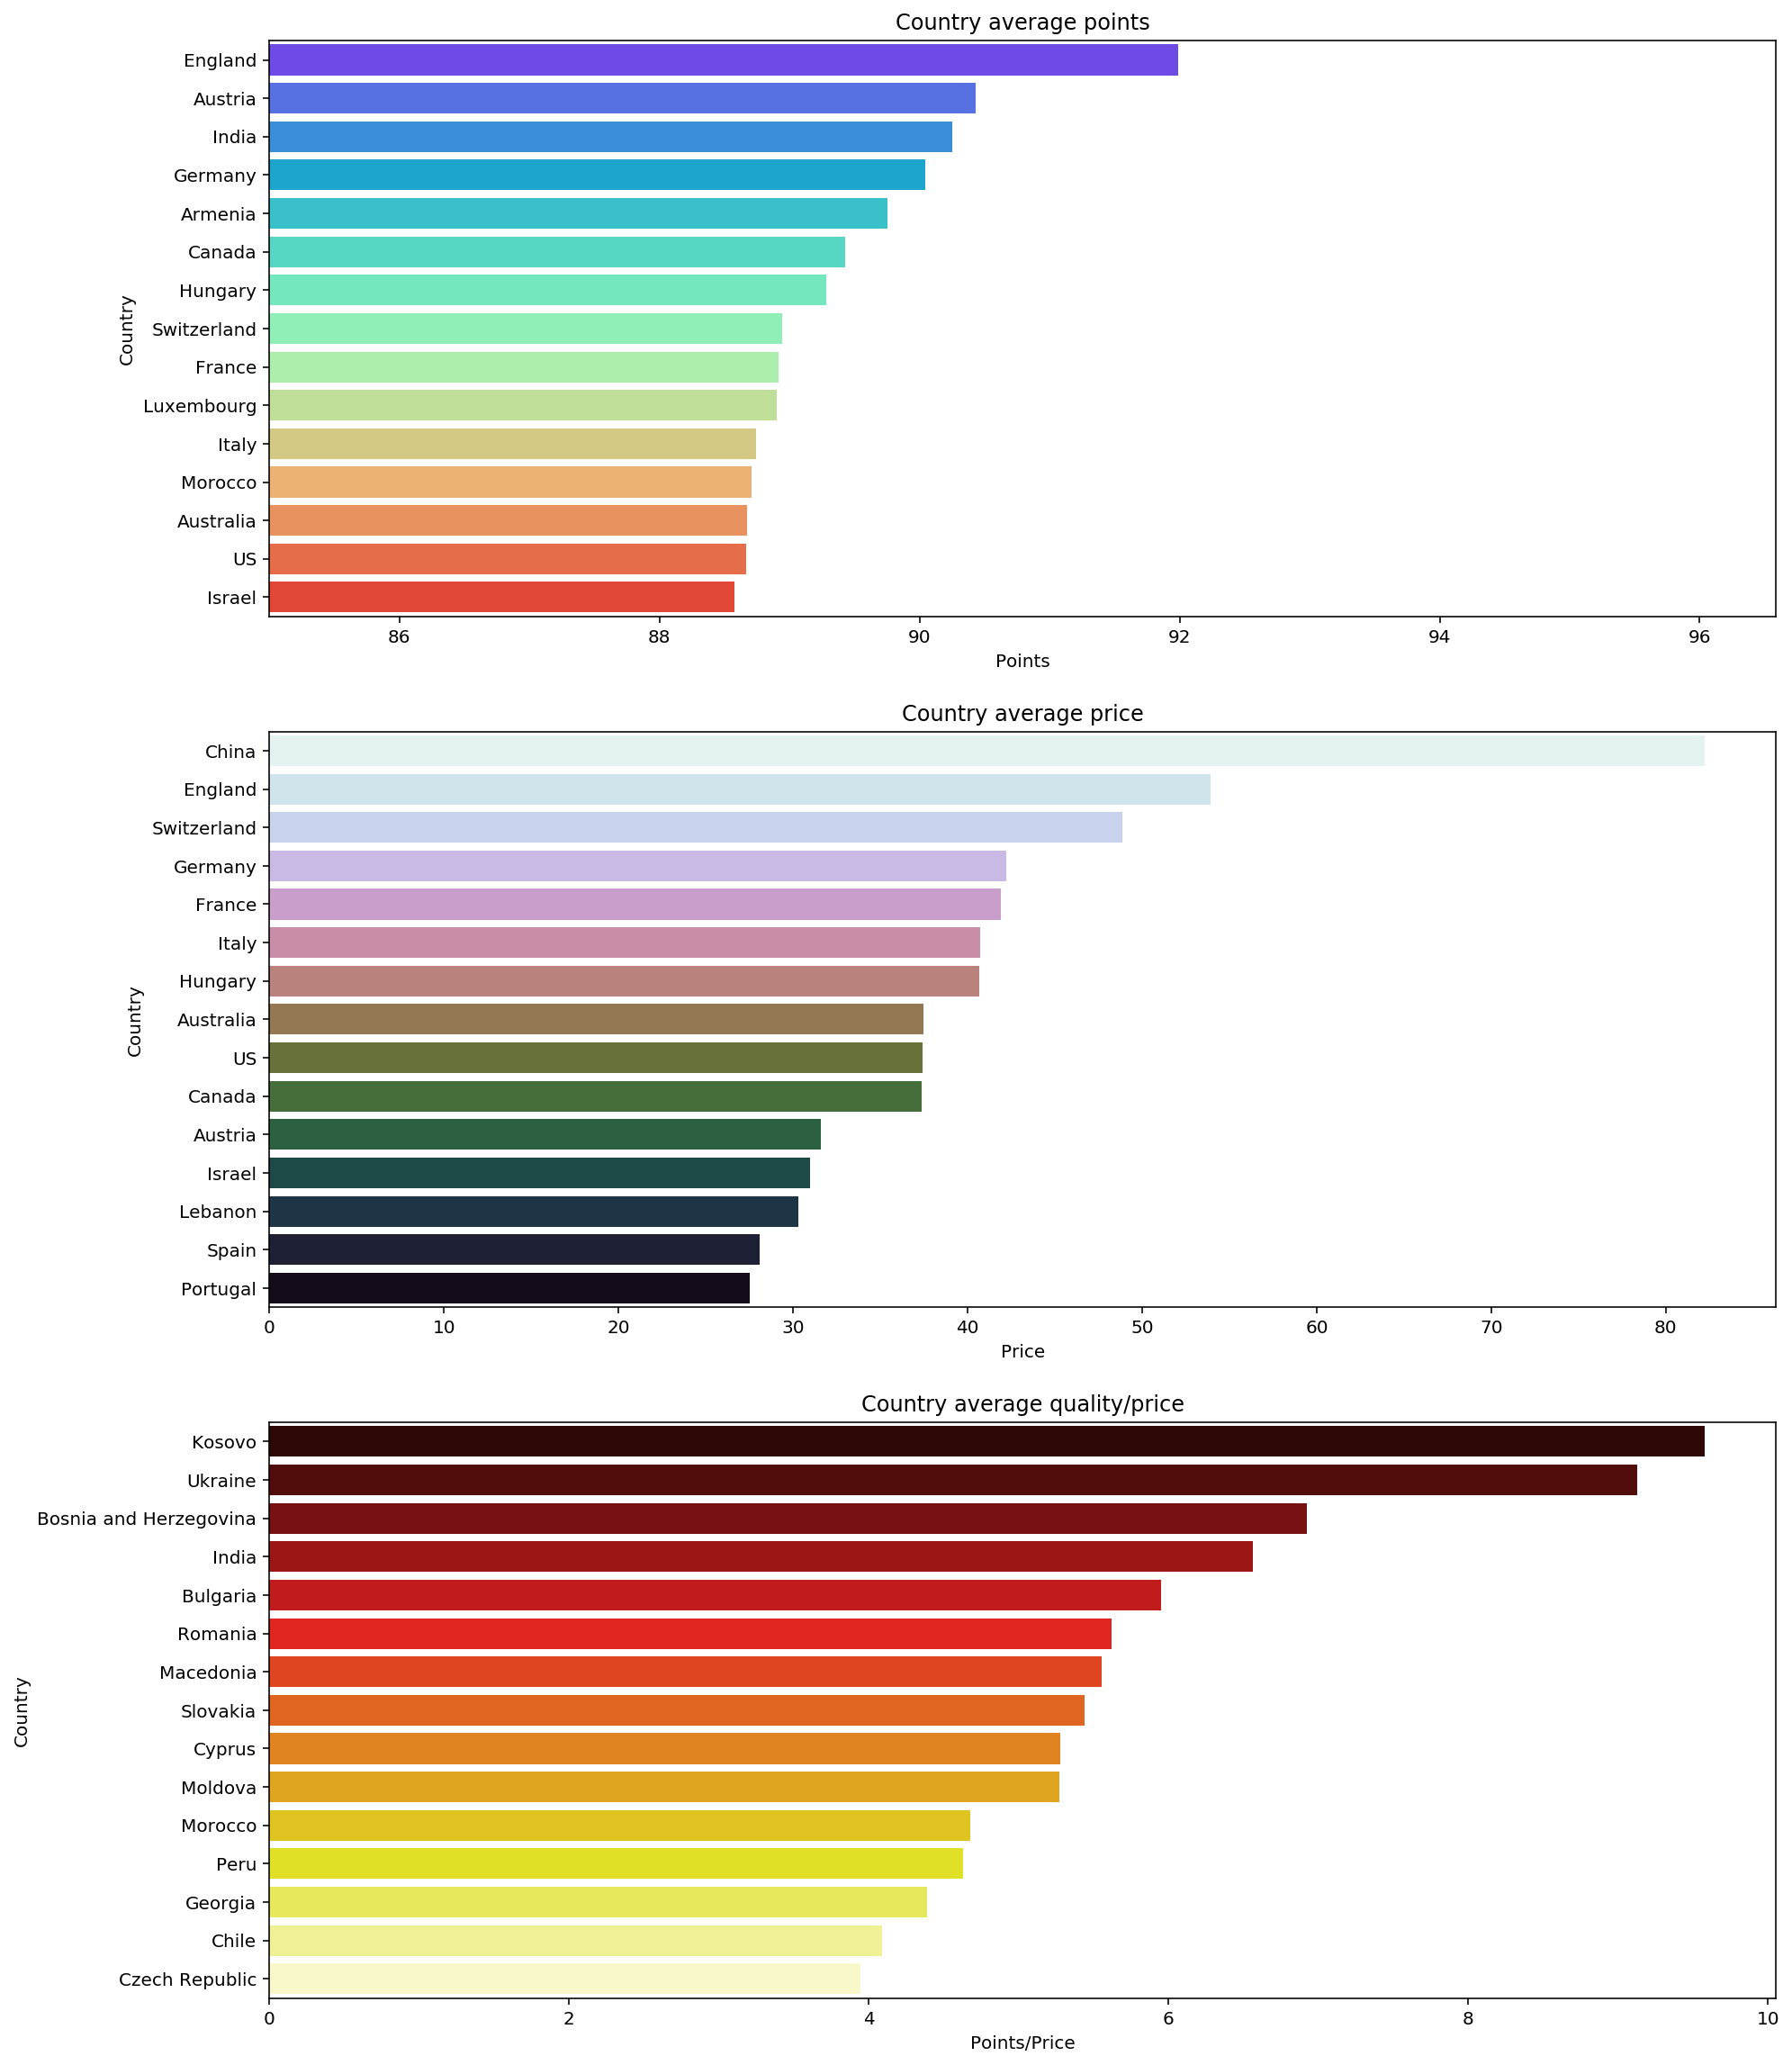

In [45]:
vino_country_points = vino.groupby('country').mean().sort_values(by='points', ascending = False)[:15]
vino_country_price = vino.groupby('country').mean().sort_values(by='price', ascending = False)[:15]
vino_country = vino.groupby('country').mean()
vino_country['points/price'] = (vino_country.points / vino_country.price)
vino_country = vino_country.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_country_points['points'], y = vino_country_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_country_price['price'], y = vino_country_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = vino_country['points/price'], y = vino_country.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Country average points')
ax[0].set_ylabel('Country')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Country average price')
ax[1].set_ylabel('Country')
ax[1].set_xlabel('Price')
ax[2].set_title('Country average quality/price')
ax[2].set_ylabel('Country')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

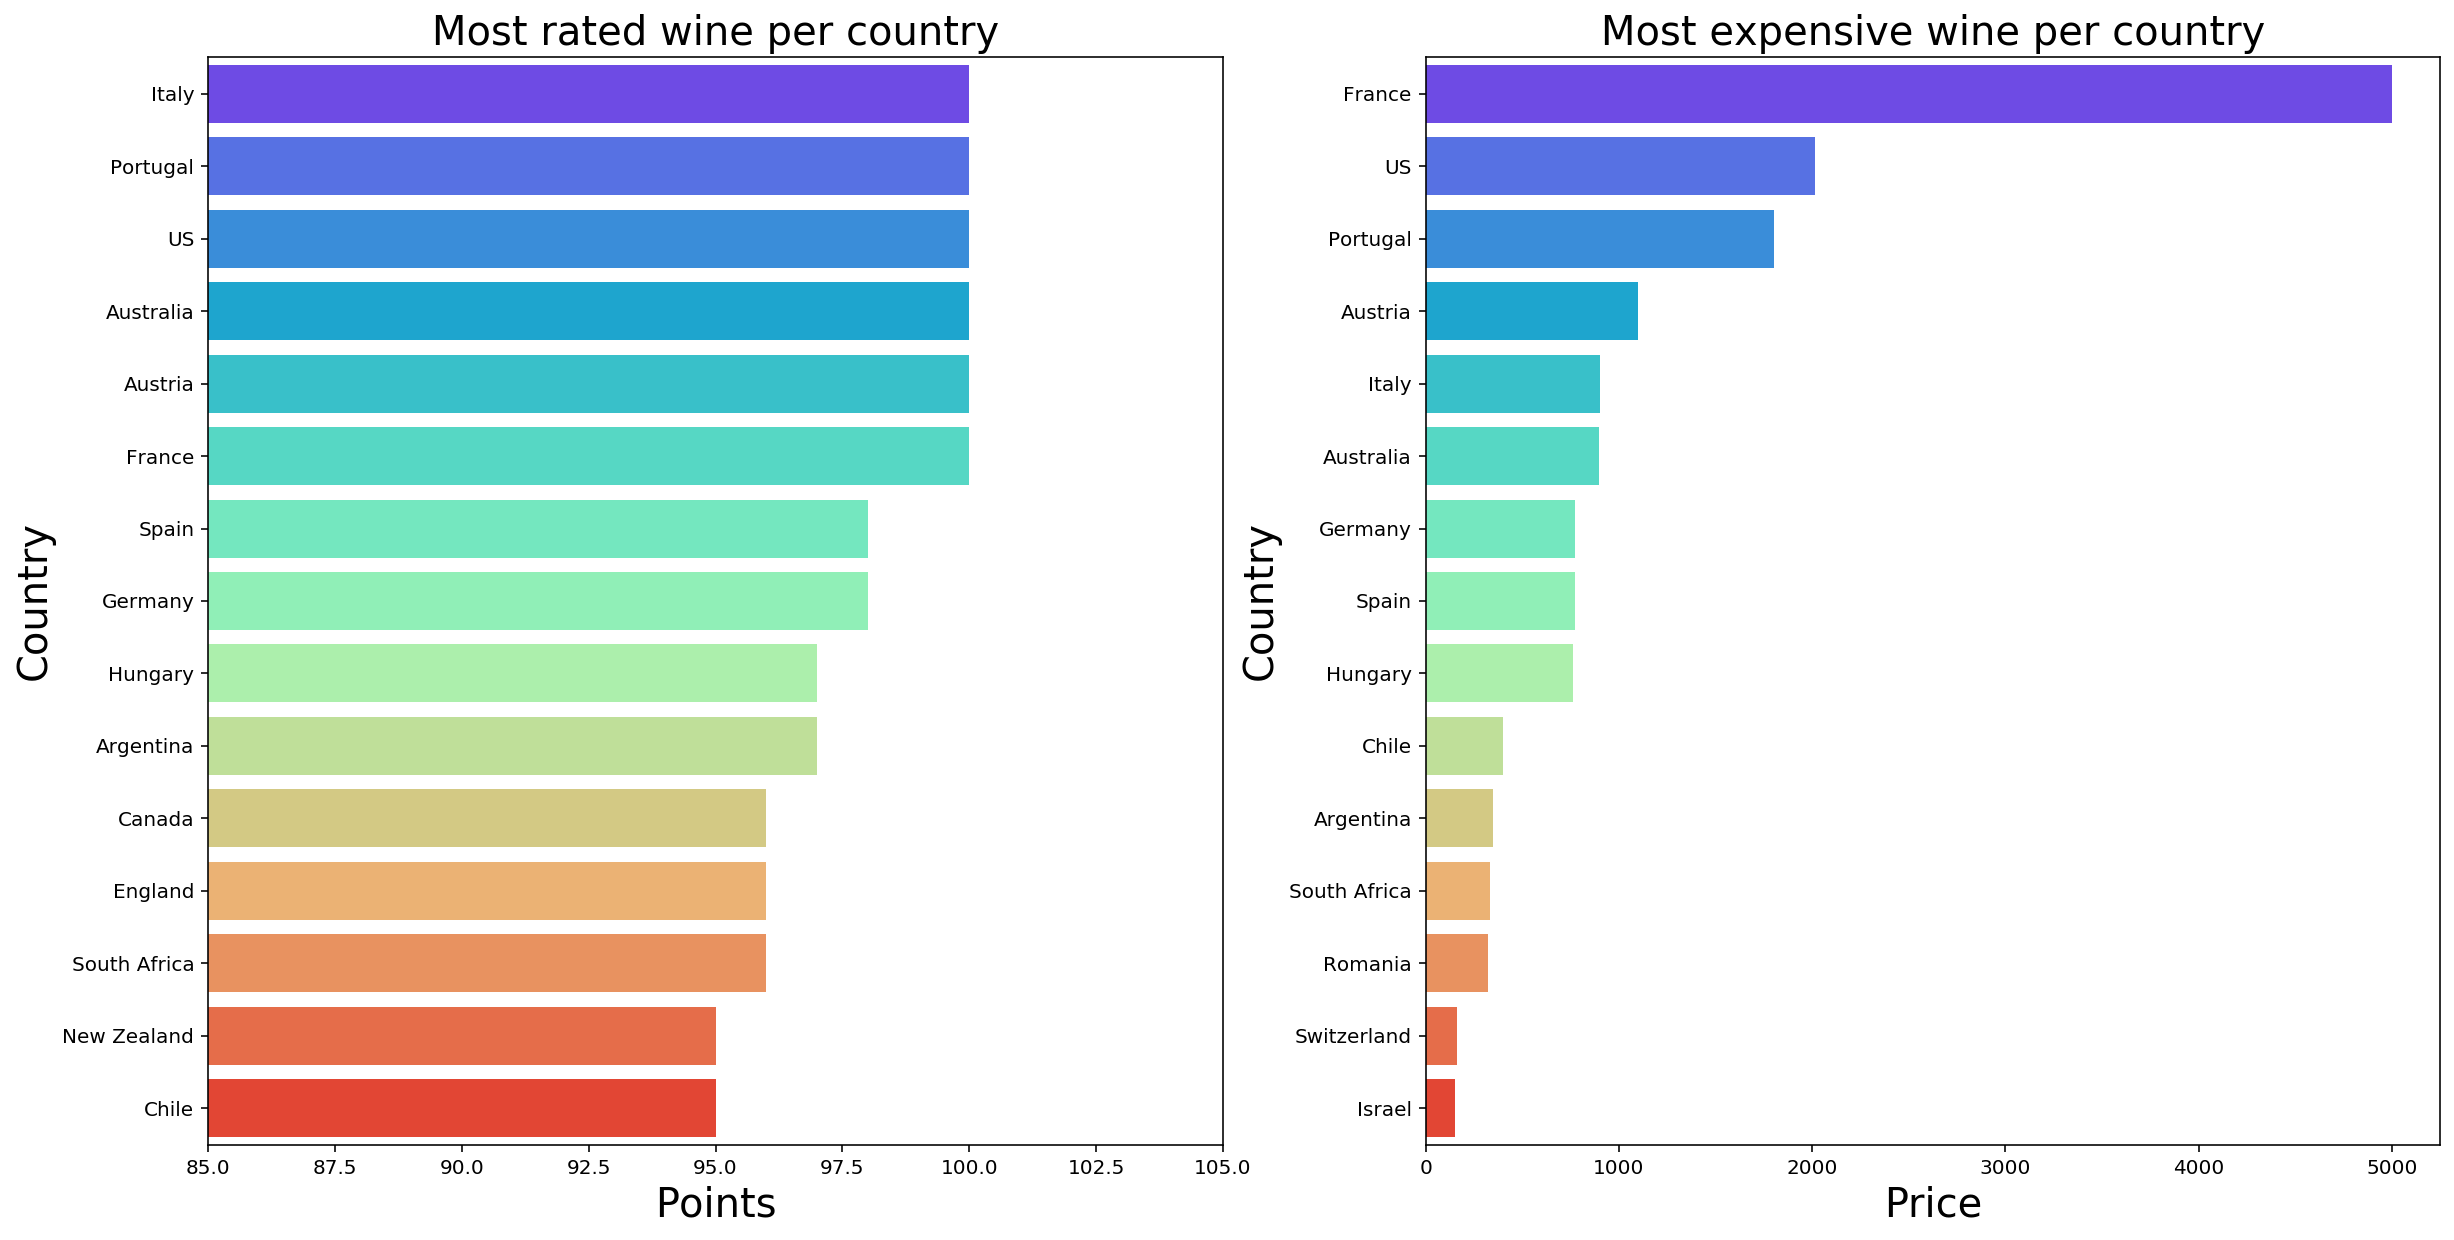

In [46]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per country', fontsize=20)
ax1.set_ylabel('Country',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = vino.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per country', fontsize=20)
ax2.set_ylabel('Country',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Relation between Winery and Prices and Points

- The wineries with the highest average of points are from California and France. From France, California and Italy are the wineries which have the highest points in their wine's reviews.
- The wineries with the highest average of prices are from France. Chateau Albelyce is the winery with the wine most expensive.
- The wineries with the highest average of quality/price are from USA.
- These results are similar that I obtained in the small dataset.

### Average

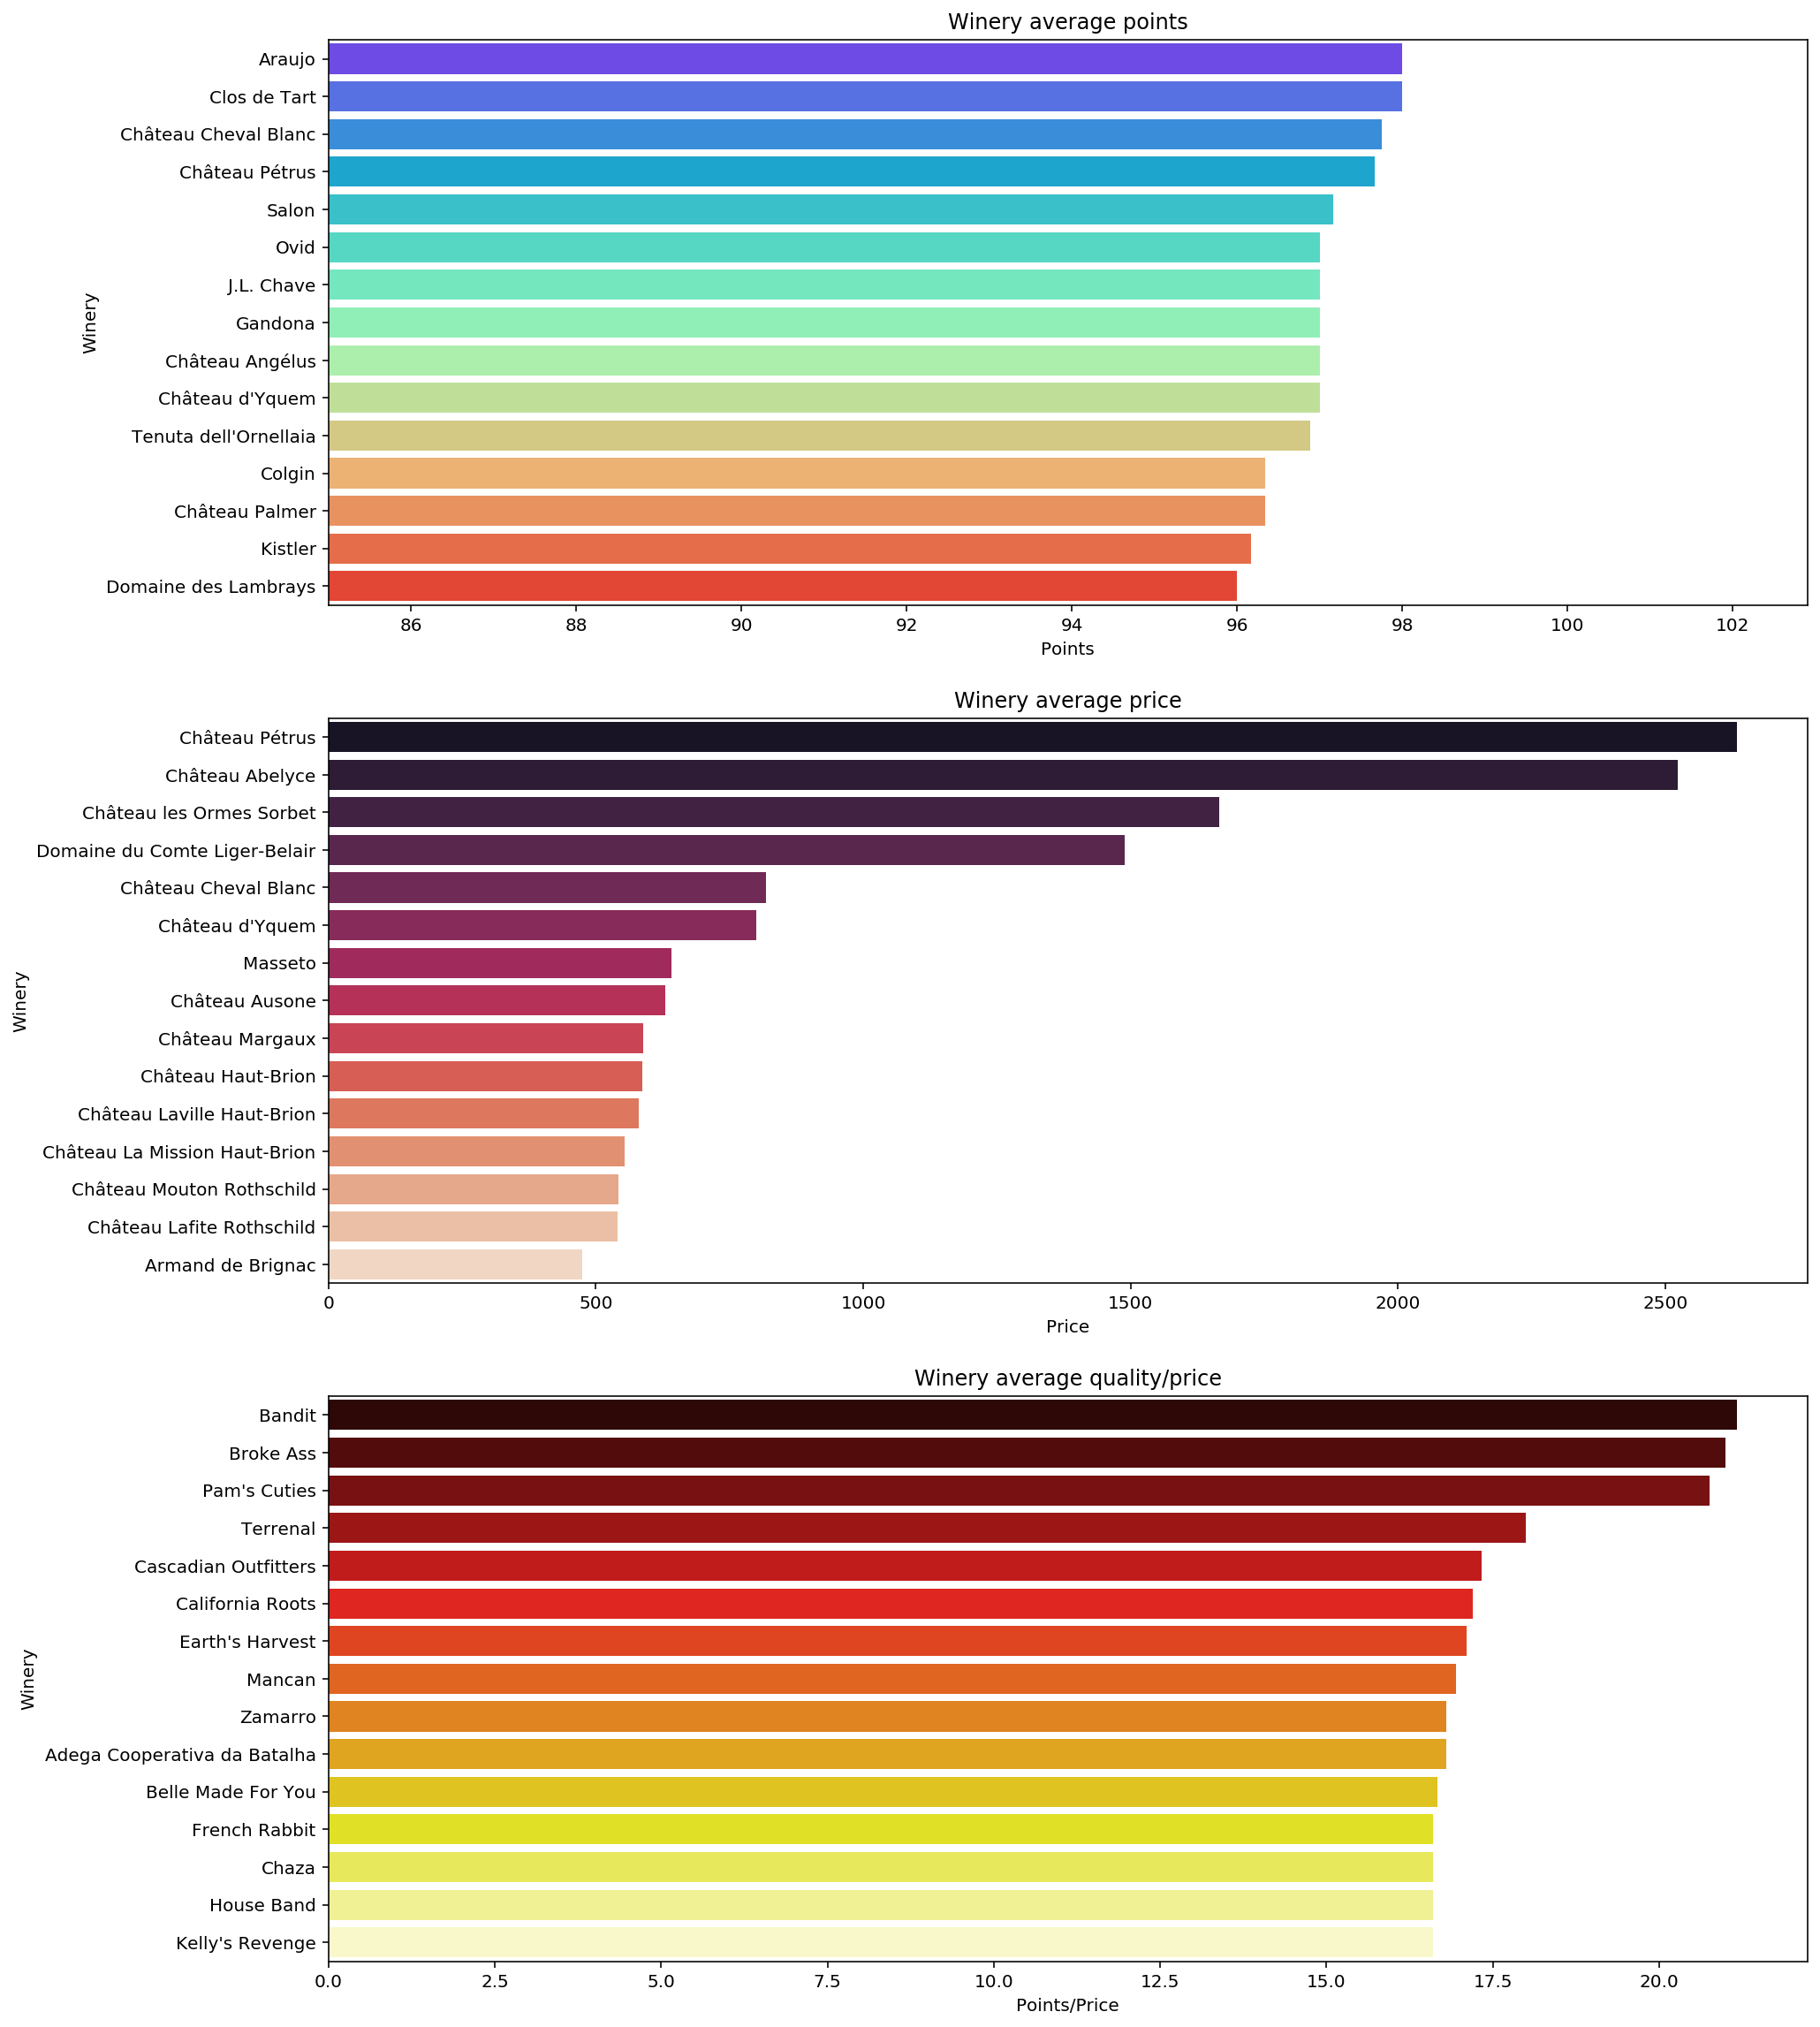

In [47]:
vino_winery_points = vino.groupby('winery').mean().sort_values(by='points', ascending = False)[:15]
vino_winery_price = vino.groupby('winery').mean().sort_values(by='price', ascending = False)[:15]
vino_winery = vino.groupby('winery').mean()
vino_winery['points/price'] = (vino_winery.points / vino_winery.price)
vino_winery = vino_winery.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_winery_points['points'], y = vino_winery_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_winery_price['price'], y = vino_winery_price.index, palette= 'rocket', ax=ax[1])
sns.barplot(x = vino_winery['points/price'], y = vino_winery.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Winery average points')
ax[0].set_ylabel('Winery')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Winery average price')
ax[1].set_ylabel('Winery')
ax[1].set_xlabel('Price')
ax[2].set_title('Winery average quality/price')
ax[2].set_ylabel('Winery')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

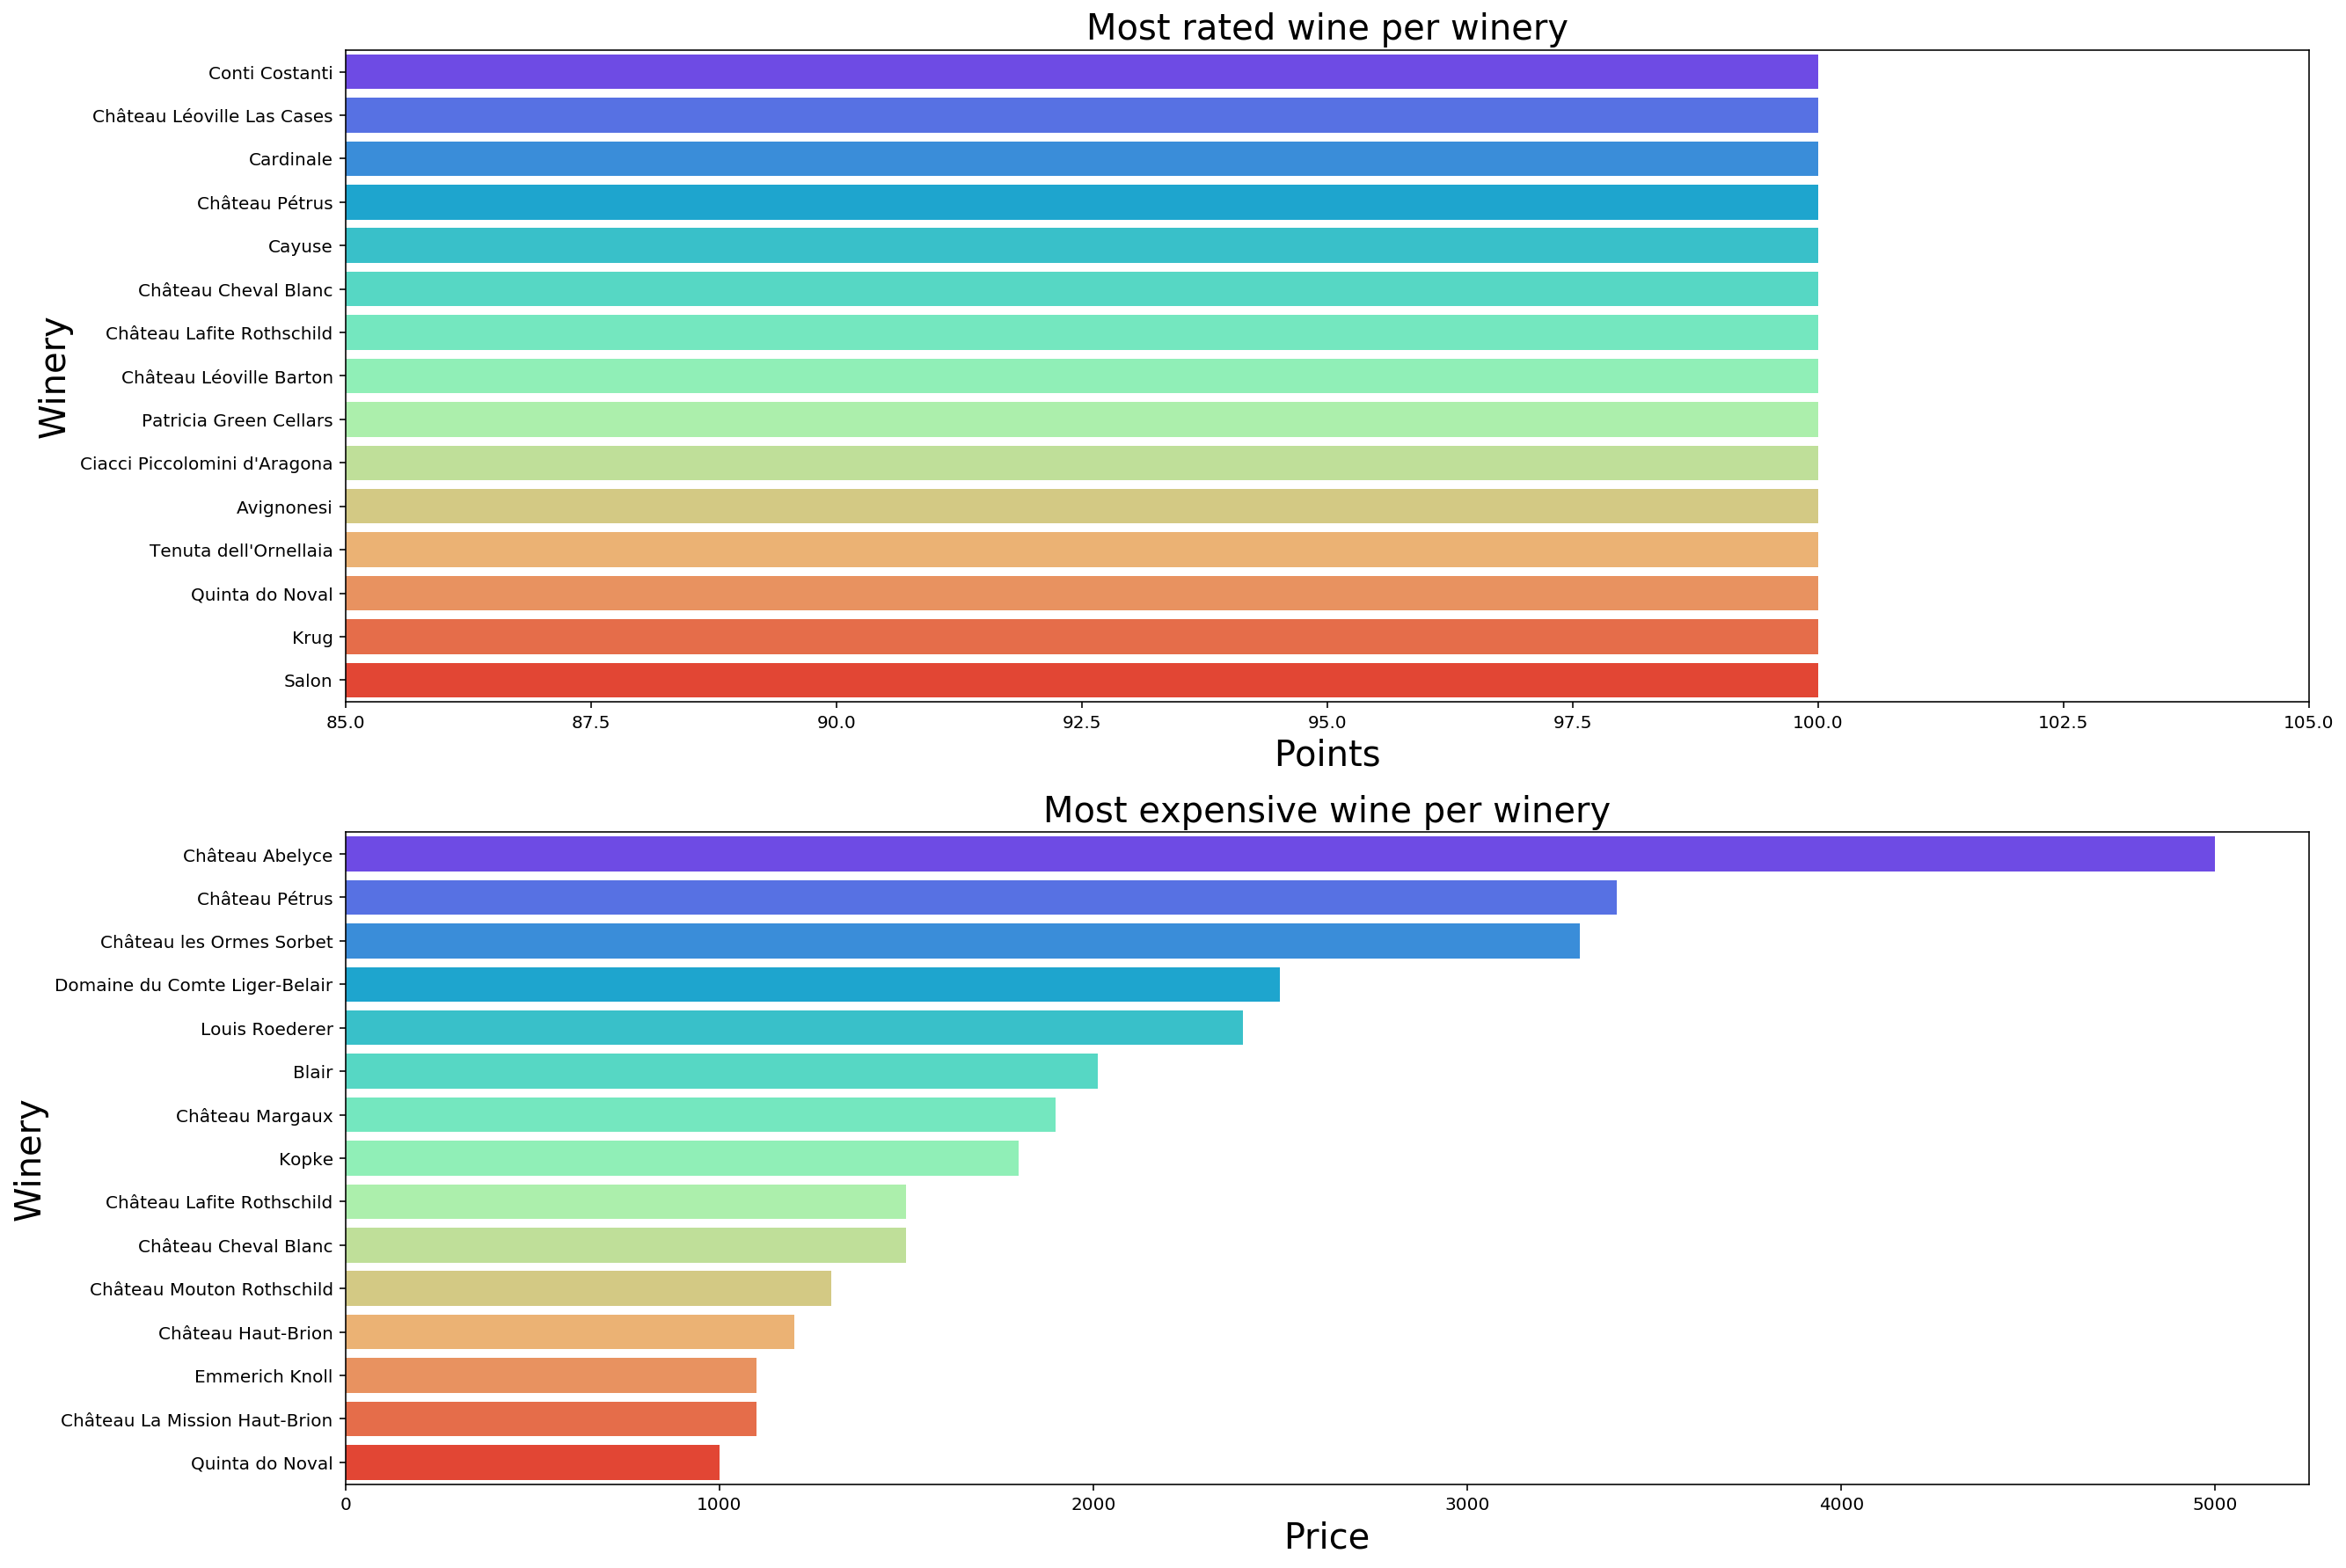

In [48]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['winery'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per winery', fontsize=20)
ax1.set_ylabel('Winery',fontsize=20)
ax1.set_xlabel('Points', fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = vino.groupby(['winery'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per winery', fontsize=20)
ax2.set_ylabel('Winery',fontsize=20)
ax2.set_xlabel('Price', fontsize=20)
plt.show()

## Relation between Province and Prices and Points

- The provinces with the highest average of points in their wines are in Austria and Madeira. The provinces with the highest points in their wines are France, Portugal, Italy and US.
- The province with the highest average of price and the most expensive wine in its wines is France.
- Romania is the province with highest average of quality and prices in its wines.

### Average

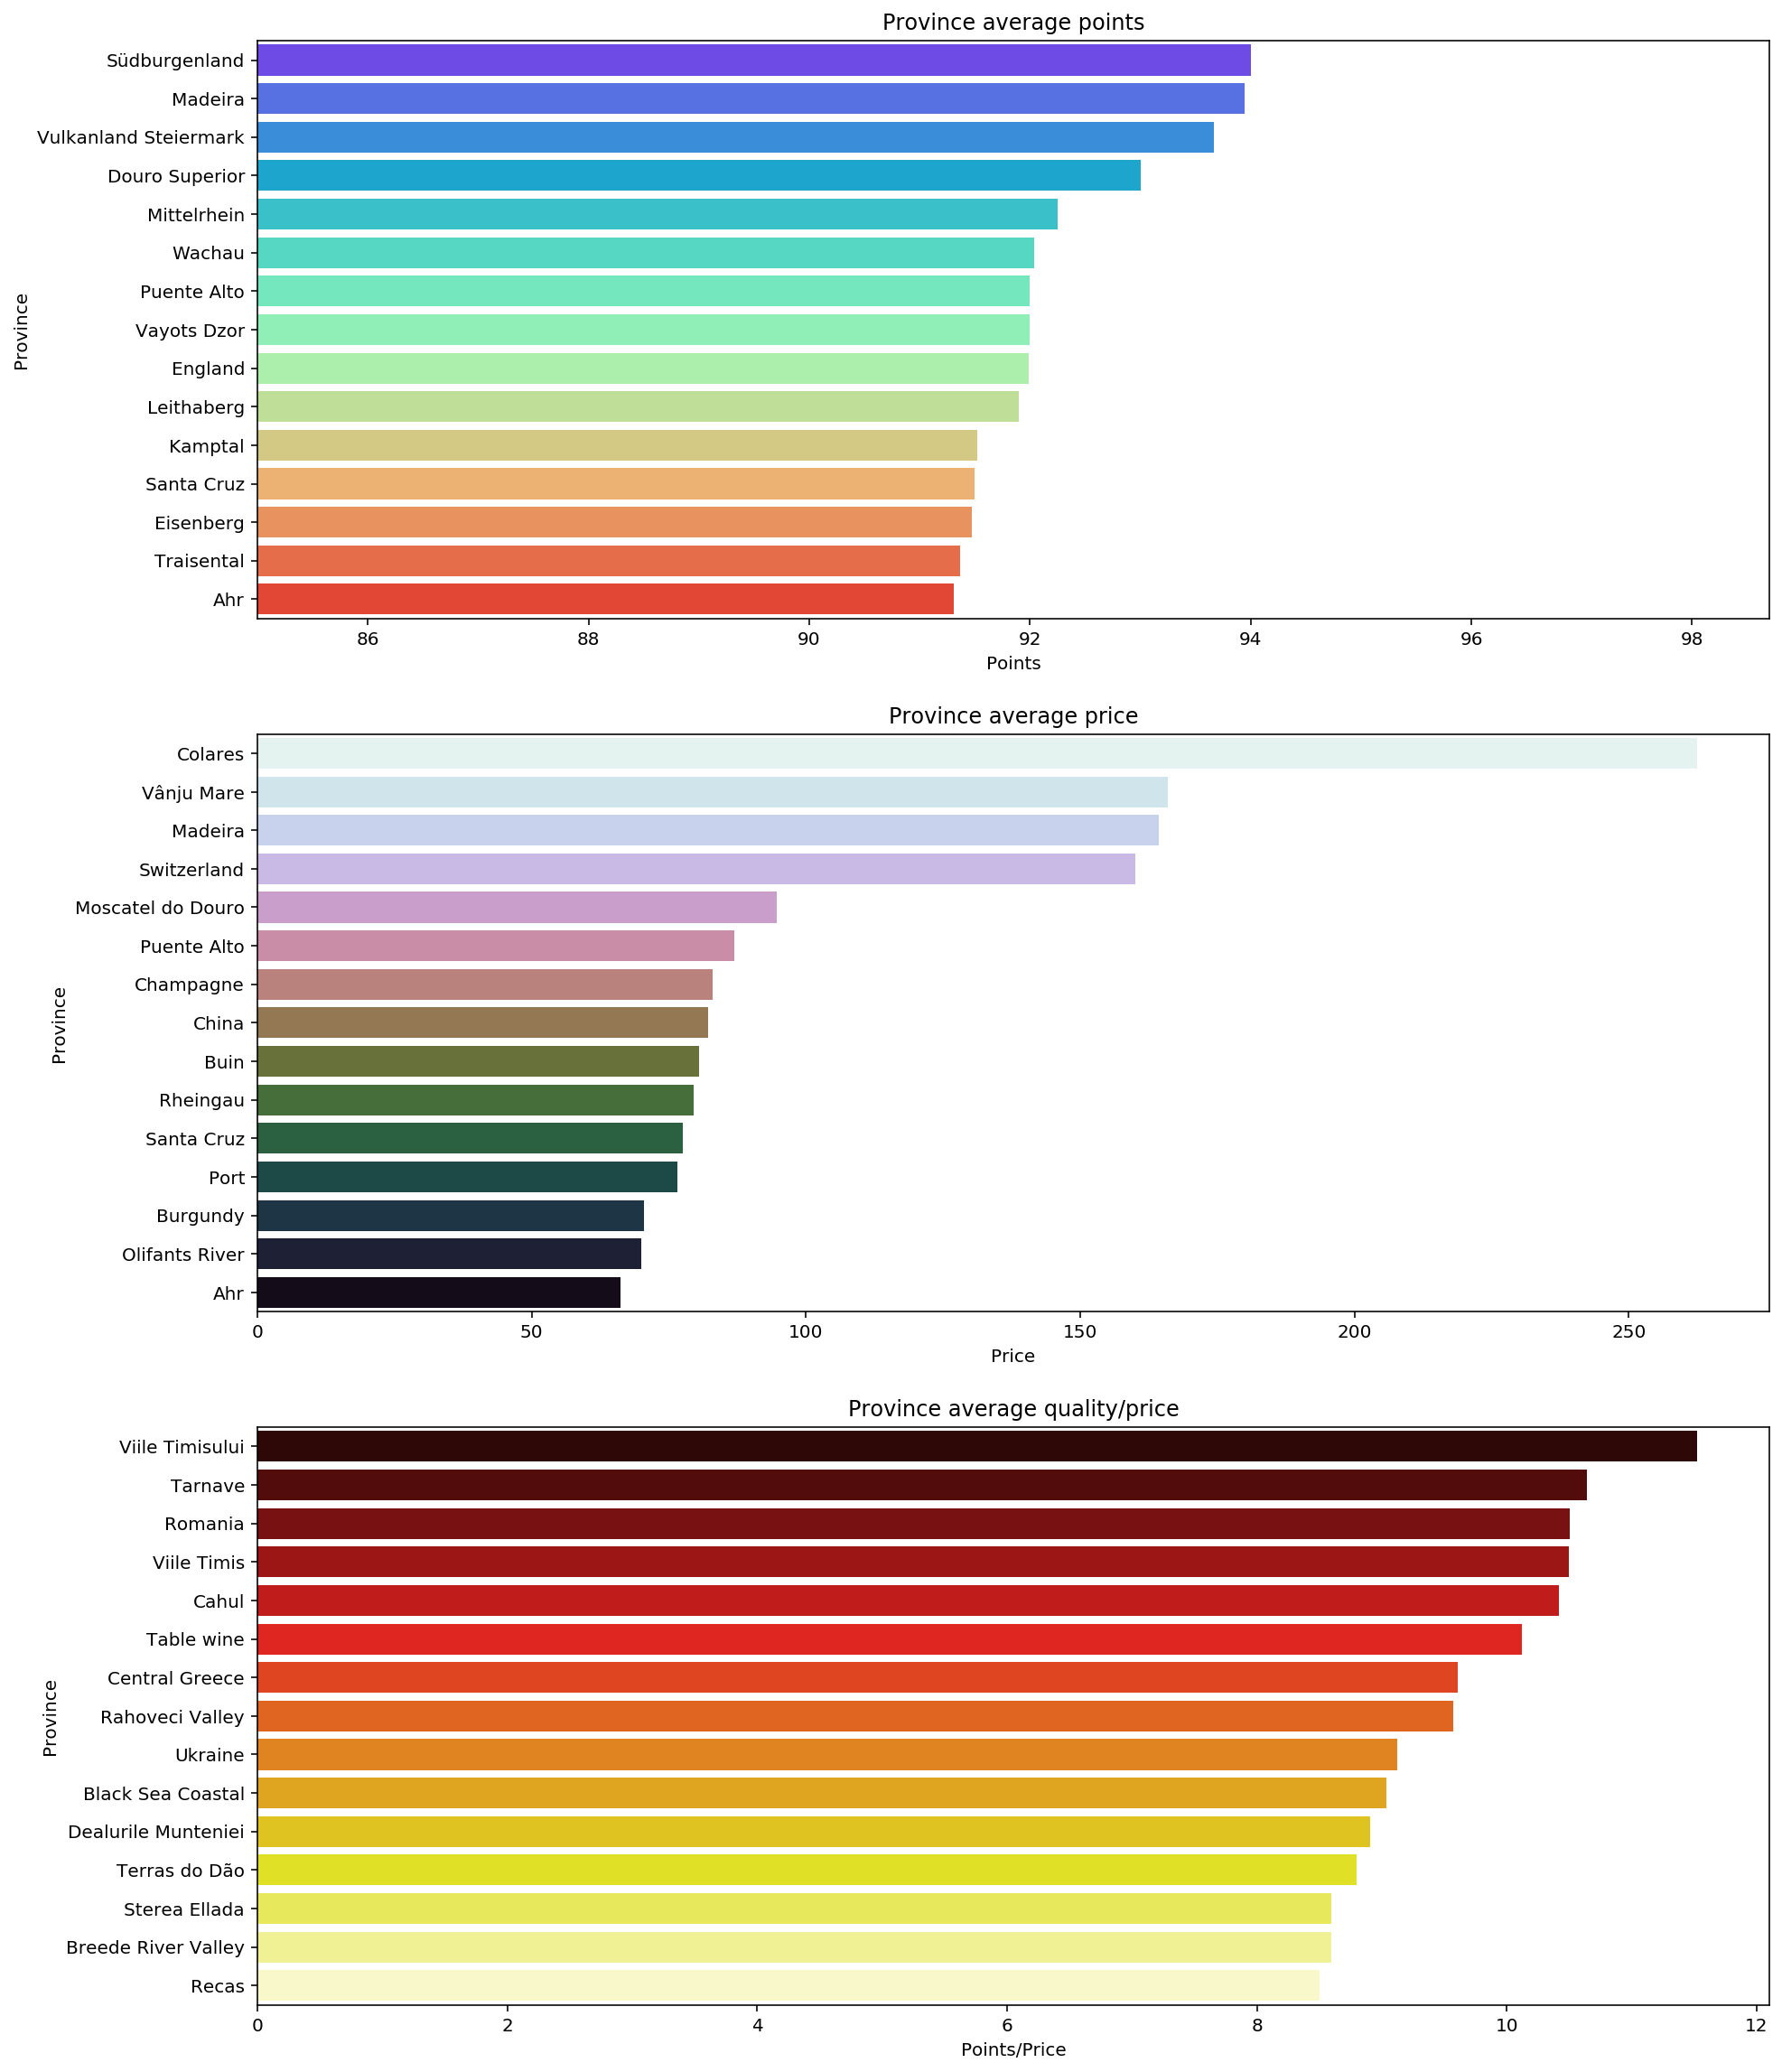

In [49]:
vino_province_points = vino.groupby('province').mean().sort_values(by='points', ascending = False)[:15]
vino_province_price = vino.groupby('province').mean().sort_values(by='price', ascending = False)[:15]
vino_province = vino.groupby('province').mean()
vino_province['points/price'] = (vino_province.points / vino_province.price)
vino_province = vino_province.sort_values(by='points/price',ascending = False)[:15]

fig,ax = plt.subplots(3,1, figsize=(15,20))

sns.barplot(x = vino_province_points['points'], y = vino_province_points.index, palette= 'rainbow', ax=ax[0])
sns.barplot(x = vino_province_price['price'], y = vino_province_price.index, palette= 'cubehelix_r', ax=ax[1])
sns.barplot(x = vino_province['points/price'], y = vino_province.index, palette= 'hot', ax=ax[2])

ax[0].set_title('Province average points')
ax[0].set_ylabel('Province')
ax[0].set_xlabel('Points')
ax[0].set_xlim(xmin=85)
ax[1].set_title('Province average price')
ax[1].set_ylabel('Province')
ax[1].set_xlabel('Price')
ax[2].set_title('Province average quality/price')
ax[2].set_ylabel('Province')
ax[2].set_xlabel('Points/Price')
plt.show()

### Maximum

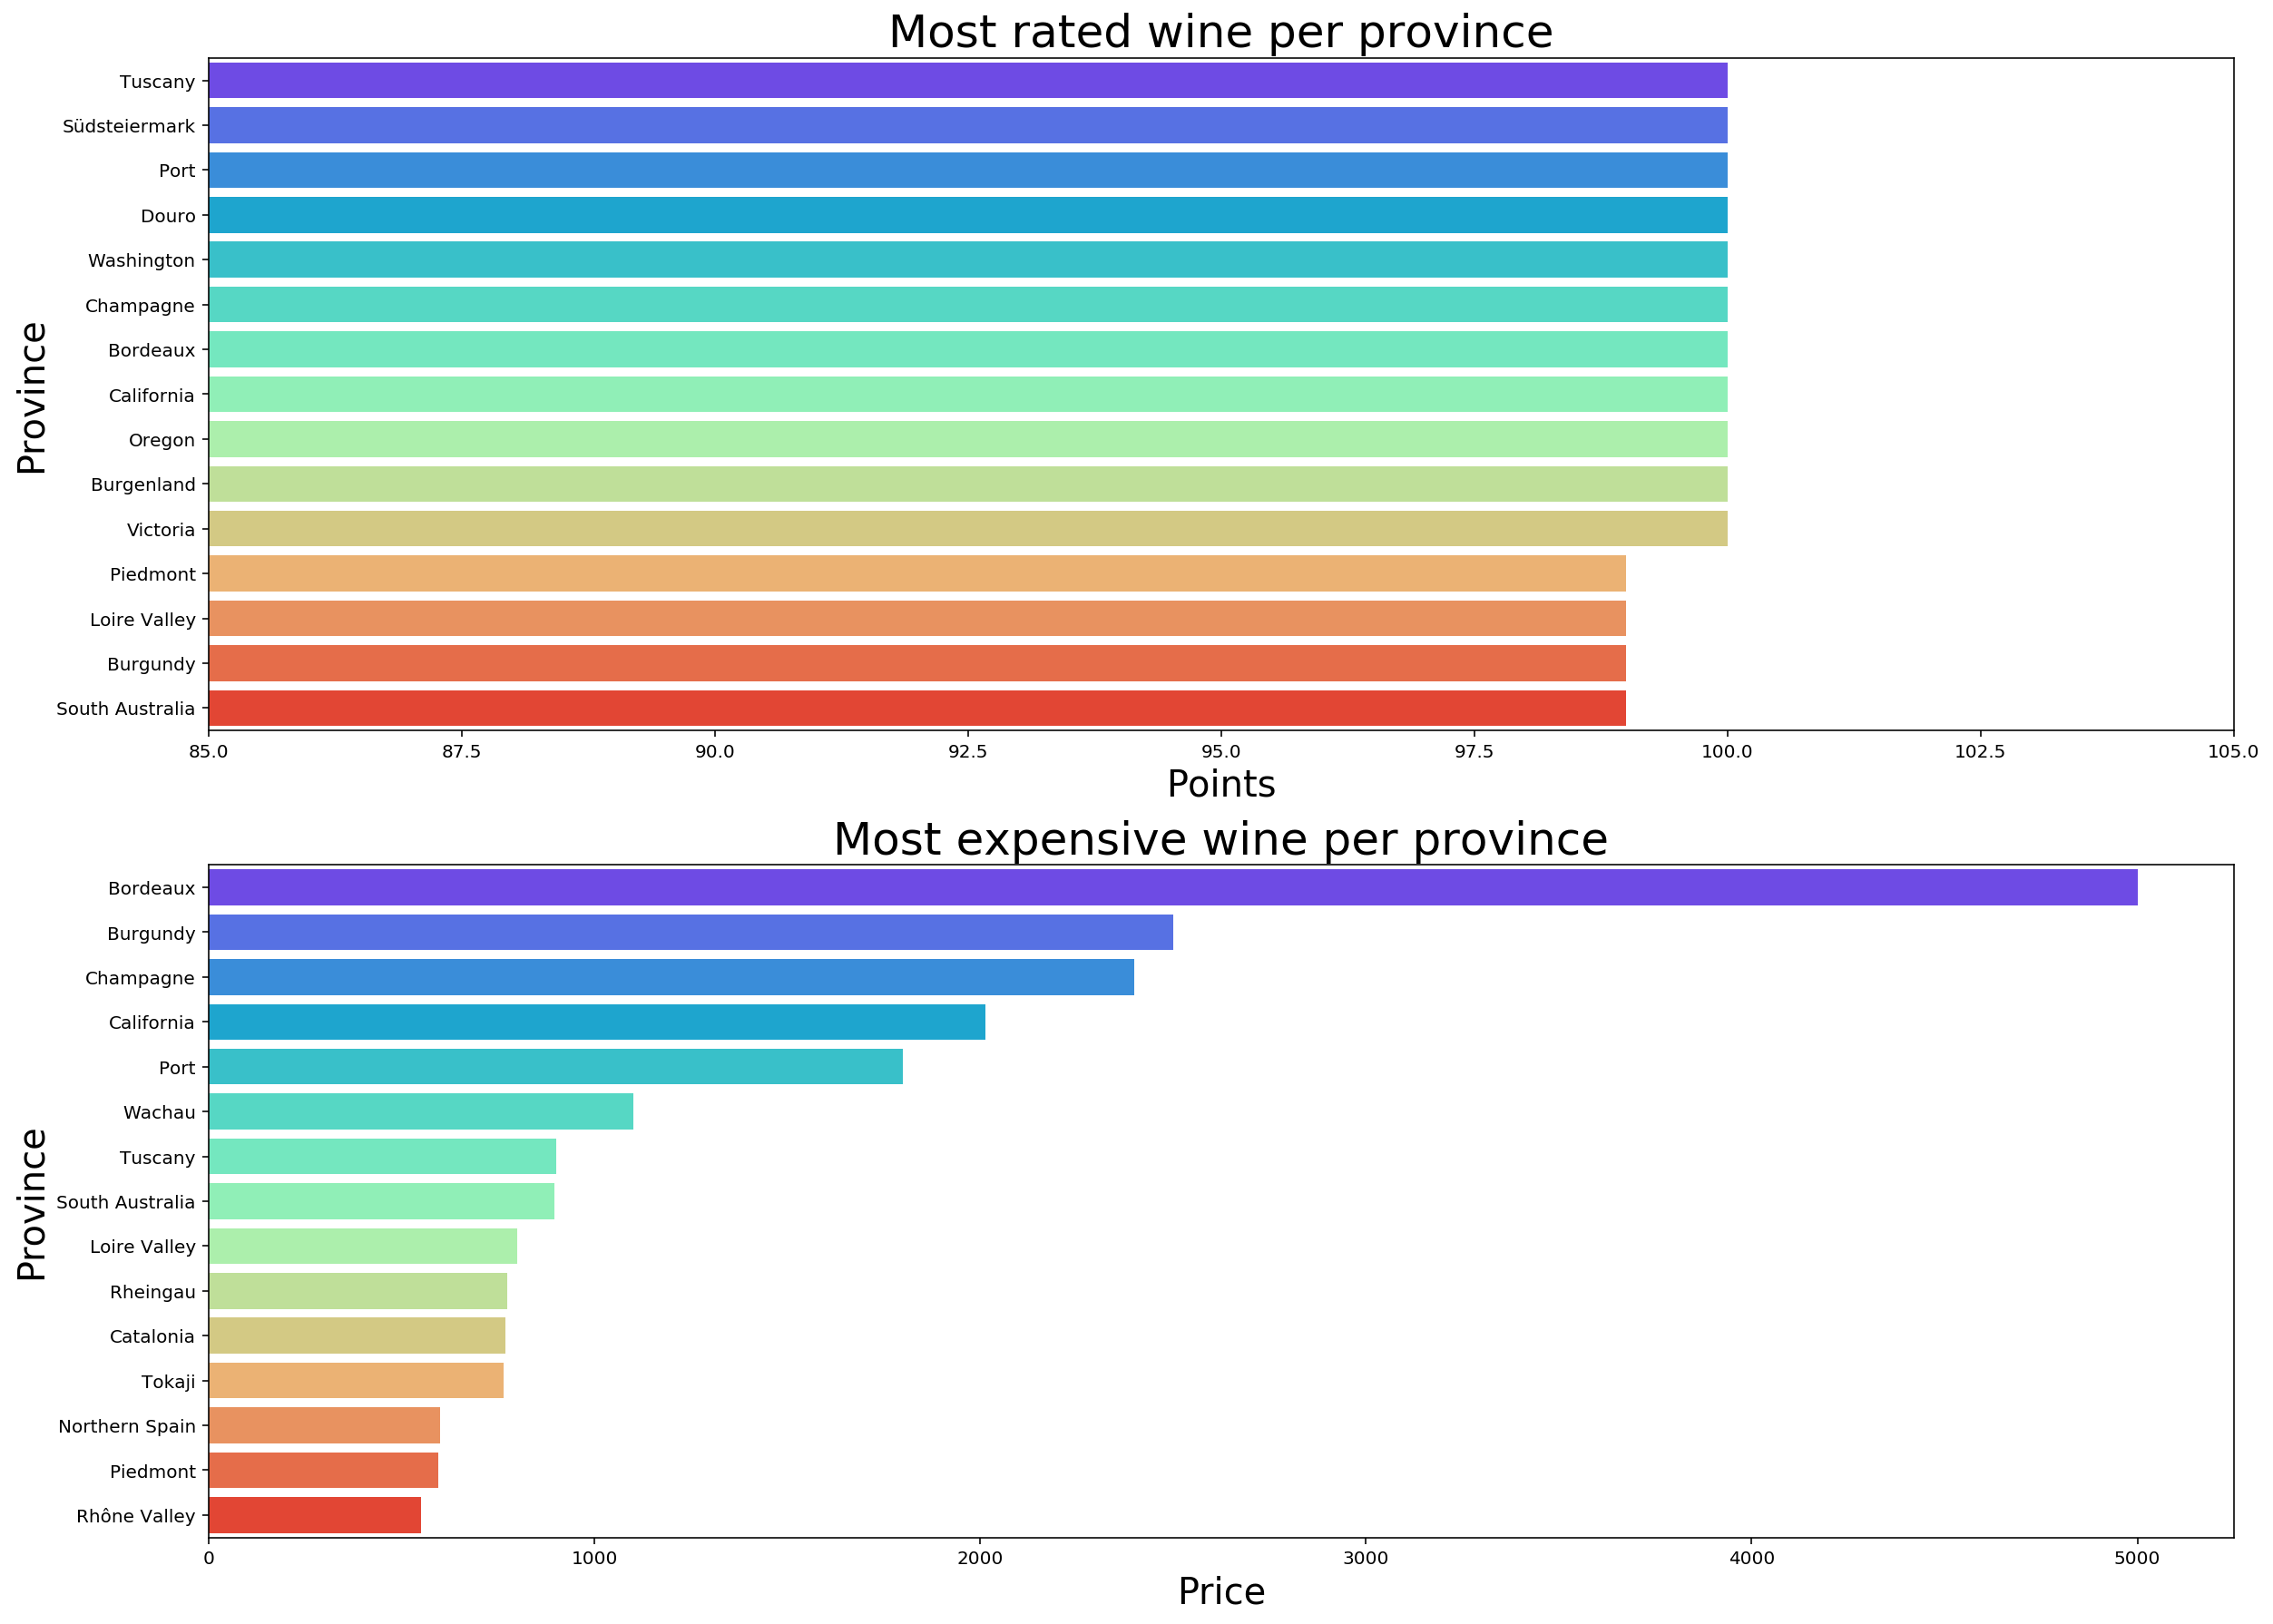

In [50]:
fig,ax = plt.subplots(2,1,figsize=(20,15))
ax1,ax2 = ax.flatten()

country_points_max = vino.groupby(['province'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_points_max['points'], y = country_points_max.index, palette= 'rainbow',ax=ax1)
ax1.set_title('Most rated wine per province', fontsize=25)
ax1.set_ylabel('Province',fontsize=20)
ax1.set_xlabel('Points',fontsize=20)
ax1.set_xlim(xmin=85)
country_price_max = vino.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = country_price_max['price'], y = country_price_max.index, palette= 'rainbow',ax=ax2)
ax2.set_title('Most expensive wine per province', fontsize=25)
ax2.set_ylabel('Province',fontsize=20)
ax2.set_xlabel('Price',fontsize=20)
plt.show()

## Variety, Province and Country

In [51]:
print("There are {} types of grapes(varieties) in this dataset such as {}... \n".
      format(len(vino.variety.unique()), ", ".join(vino.variety.unique()[0:5])))
print("There are {} provinces producing wine in this dataset such as {}... \n".
      format(len(vino.province.unique()), ", ".join(vino.province.unique()[0:5])))
print("There are {} countries producing wine in this dataset such as {}... \n".
      format(len(vino.country.unique()), ", ".join(vino.country.unique()[0:5]))) 
print("There are {} winery producing wine in this dataset such as {}... \n".
      format(len(vino.winery.unique()), ", ".join(vino.winery.unique()[0:5])))

There are 743 types of grapes(varieties) in this dataset such as Portuguese Red, Pinot Gris, Riesling, Pinot Noir, Tempranillo-Merlot... 

There are 450 provinces producing wine in this dataset such as Douro, Oregon, Michigan, Northern Spain, Sicily & Sardinia... 

There are 43 countries producing wine in this dataset such as Portugal, US, Spain, Italy, France... 

There are 17390 winery producing wine in this dataset such as Quinta dos Avidagos, Rainstorm, St. Julian, Sweet Cheeks, Tandem... 



The plots below show the fifth first variety, province and country with more wines in the big dataset


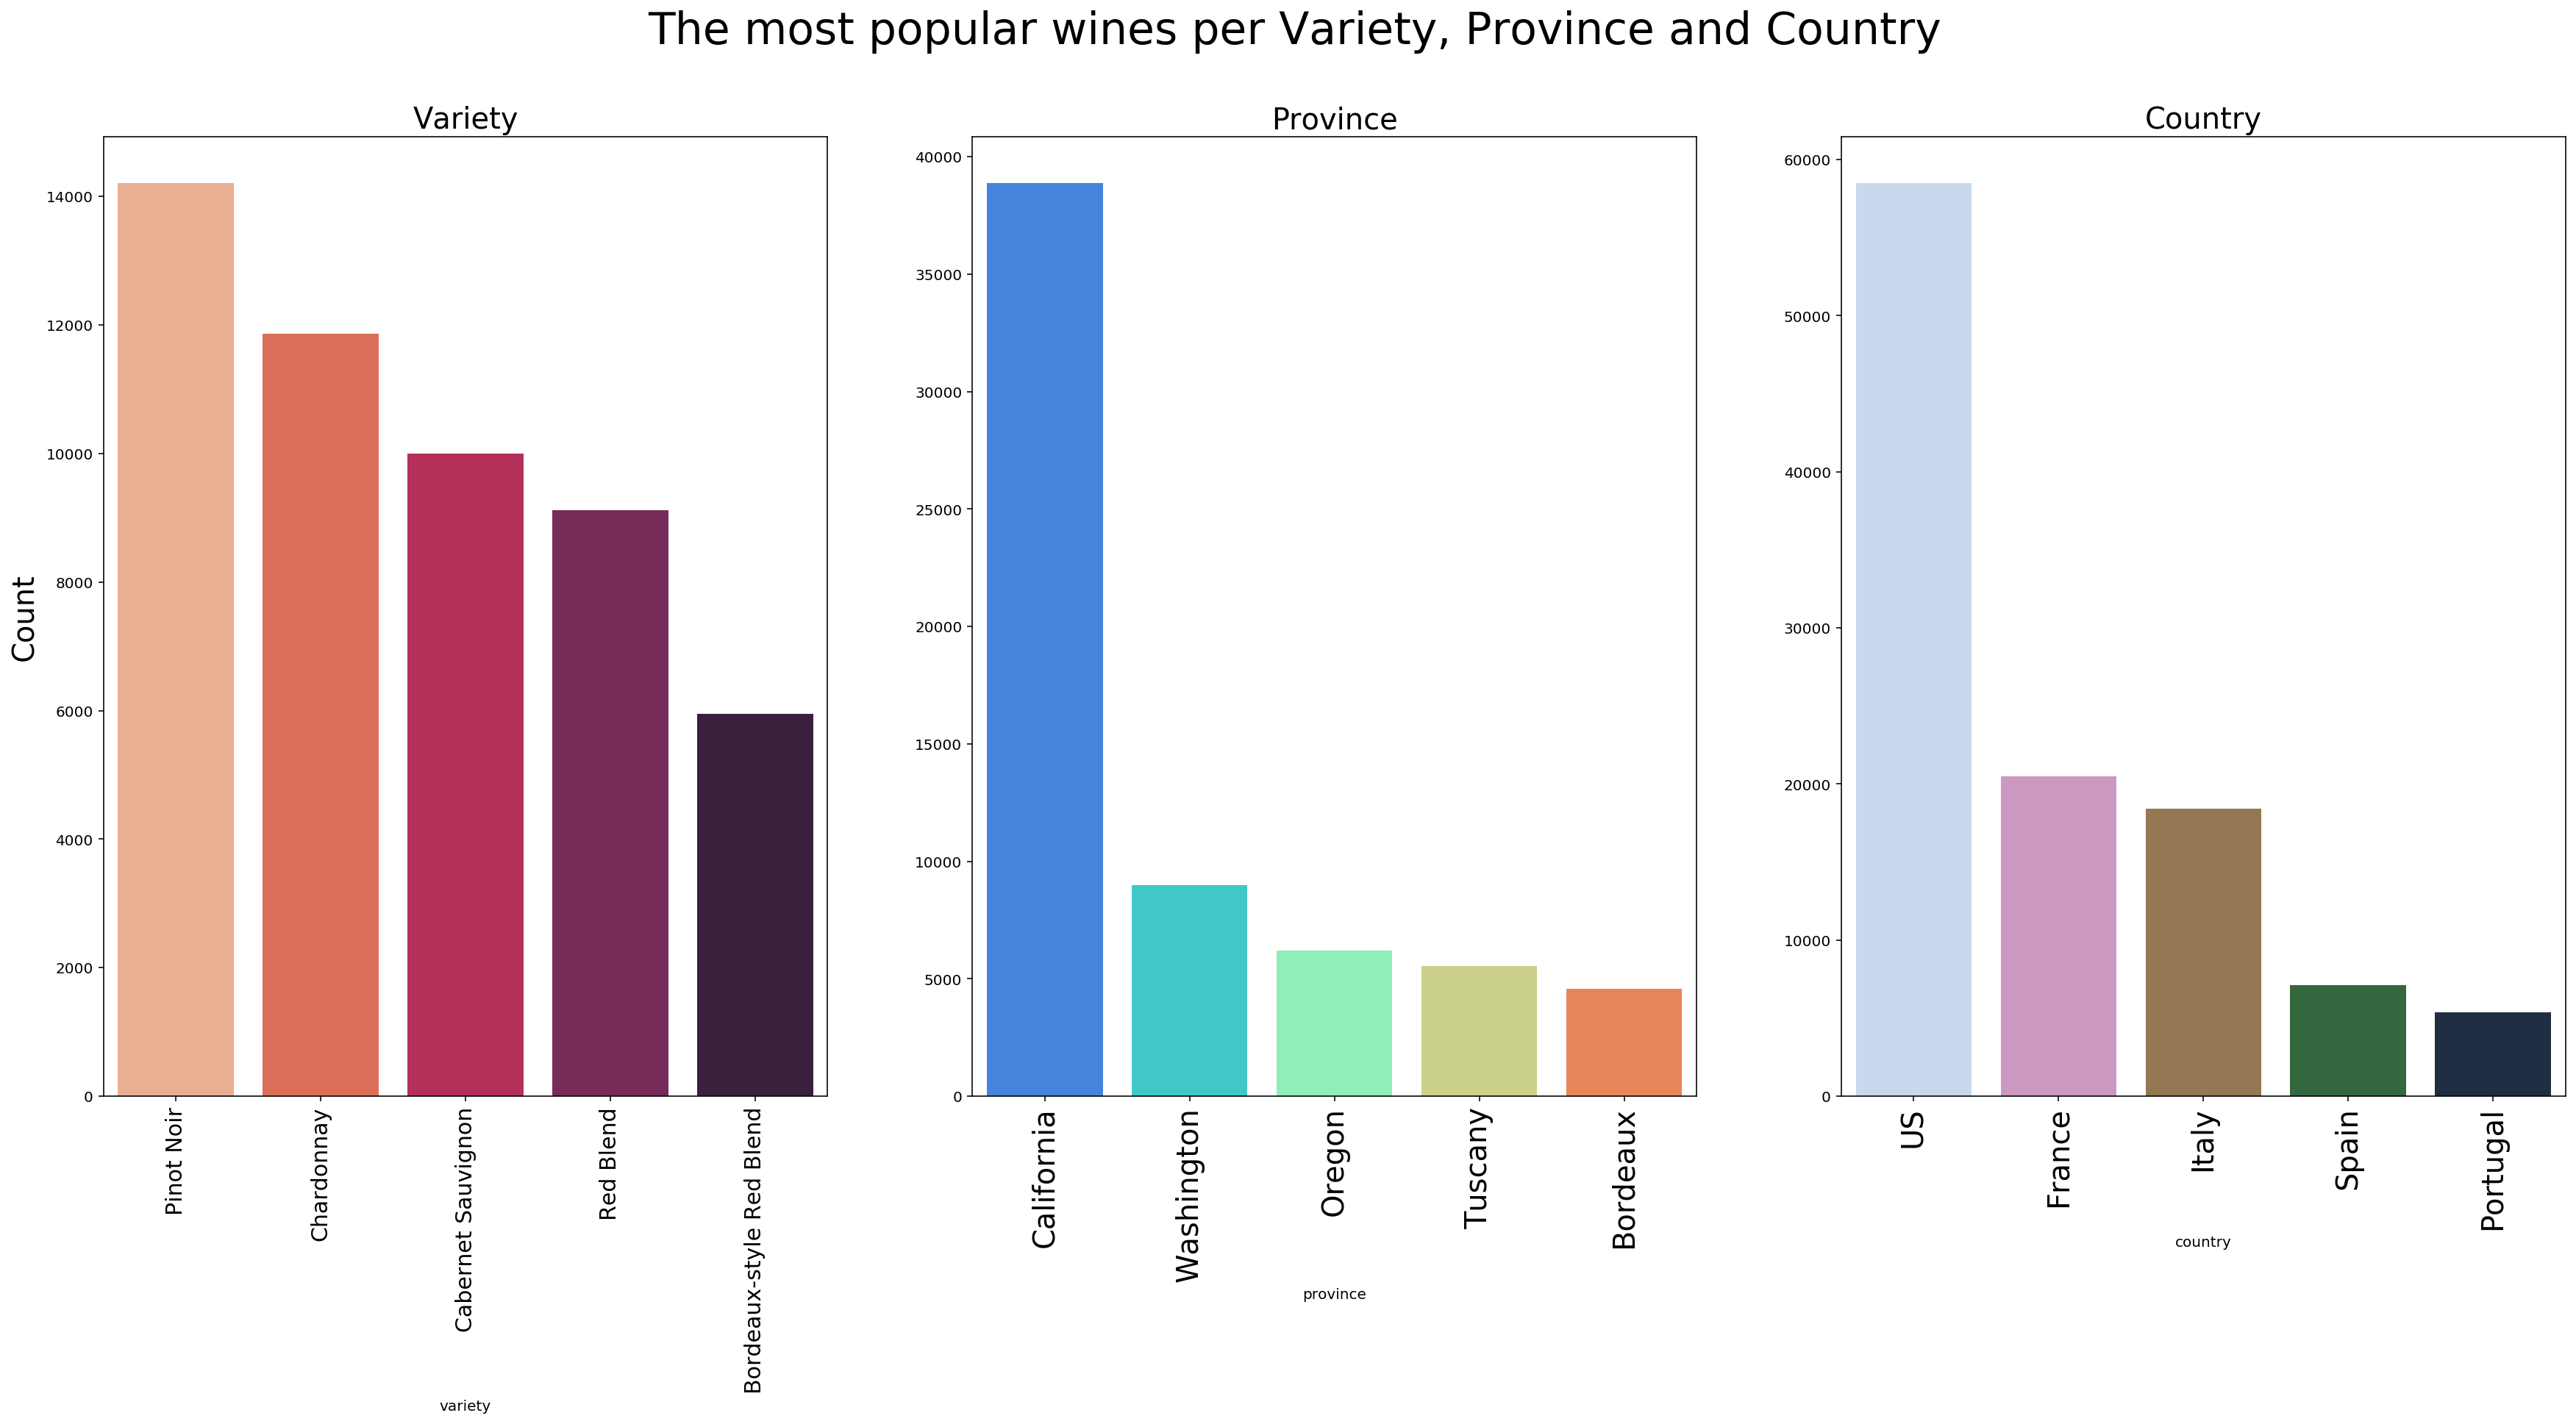

In [52]:
fig, ax = plt.subplots(1, 3, figsize=[30,12])
fig.suptitle("The most popular wines per Variety, Province and Country", fontsize=30)
sns.countplot('variety',data=vino, ax=ax[0],palette='rocket_r', order=pd.value_counts(vino['variety']).iloc[:5].index)
sns.countplot('province',data=vino, ax = ax[1], palette='rainbow', order=pd.value_counts(vino['province']).iloc[:5].index)
sns.countplot('country',data=vino, ax=ax[2], palette='cubehelix_r',order=pd.value_counts(vino['country']).iloc[:5].index)
ax[0].set_title('Variety', fontsize=20)
ax[1].set_title('Province', fontsize=20)
ax[2].set_title('Country', fontsize=20)
ax[0].set_ylabel('Count', fontsize=20)
ax[2].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticklabels(pd.value_counts(vino['variety']).iloc[:5].index, rotation=90, fontsize =15)
ax[1].set_xticklabels(pd.value_counts(vino['province']).iloc[:5].index, rotation=90, fontsize =20)
ax[2].set_xticklabels(pd.value_counts(vino['country']).iloc[:5].index, rotation=90, fontsize =20)
plt.show()

The results are similar that we obtain from the small dataset. Most of the wines are from US, more of 55.000 types of wine in this dataset. France (very famous for its wine) has around 20000 types of wine, folow for Italy (famous also for the quality of its wine), with around 18000 types of wine. Pinot Noir, Chardonay and Cabernet Sauvignon are the varieties that there are more in the dataset. They are in the world of the wine very common. These results do not surprise me because the data is from a US website. 

## WINE DESCRIPTION

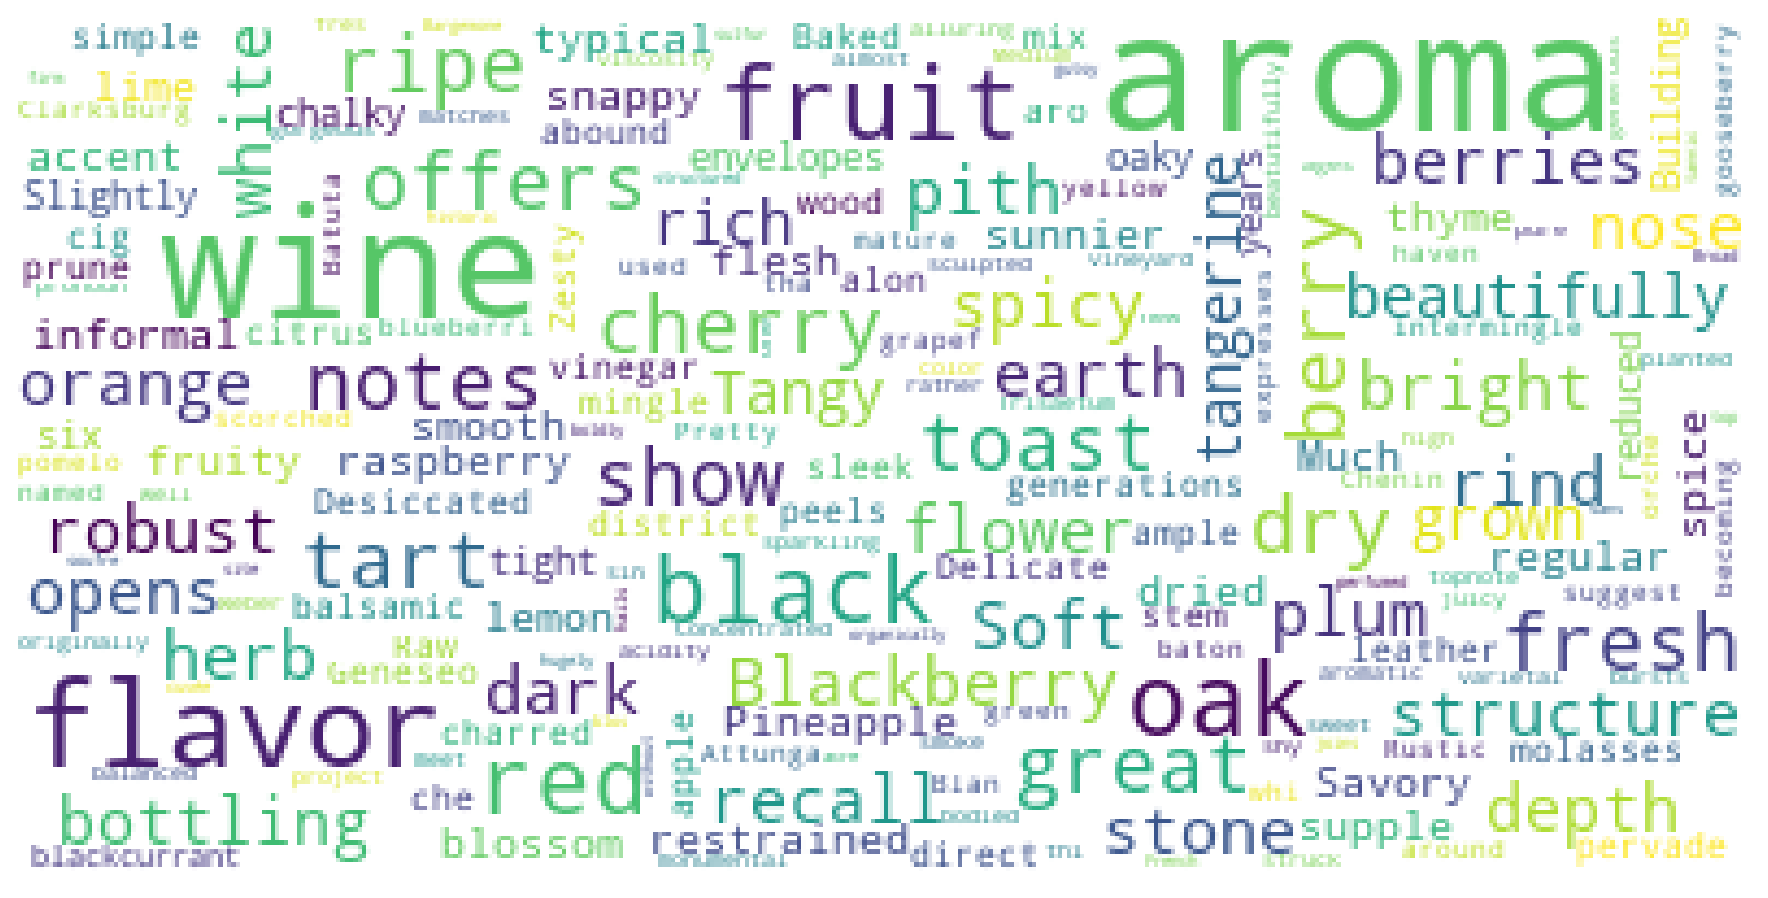

In [53]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(vino['description']))

print(wordcloud)
fig = plt.figure(figsize = (18, 8),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [54]:
wine_mask = np.array(Image.open("wine_mask_1.png"))

In [55]:
# Values of 255 are pure white, whereas values of 1 are black
# I used the transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [56]:
# Transform the mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [57]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

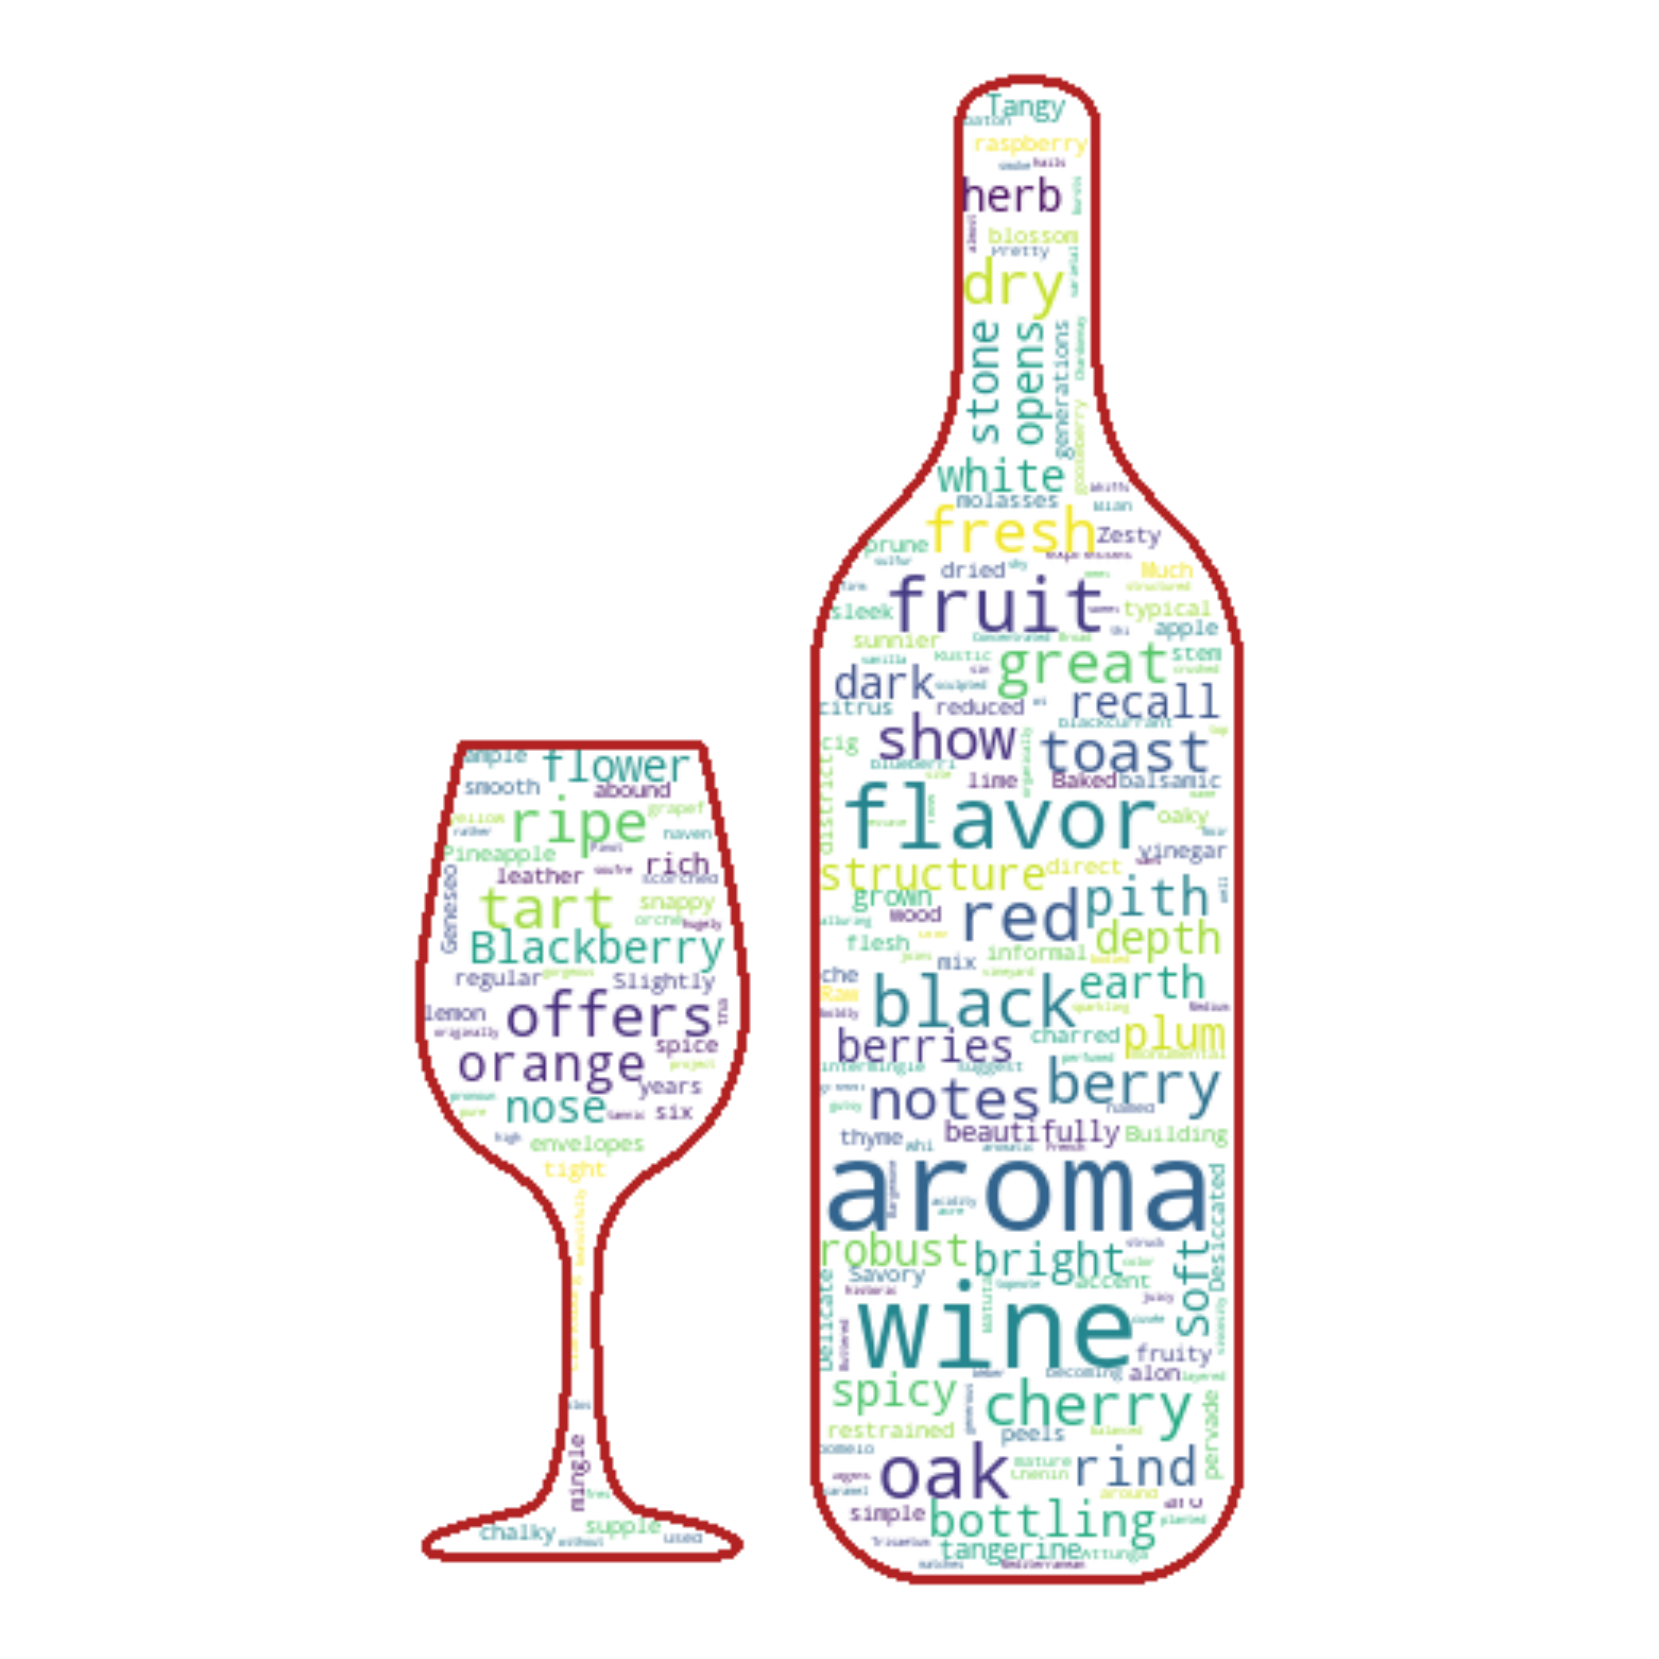

In [58]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(str(vino['description']))

# store to file
wc.to_file("./wine_mask.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
# I used the CountVectorizer to count words
cvec1 = CountVectorizer(strip_accents='unicode', ngram_range=(1, 1))
#strip_accents with 'inicode' that remove the accents and use NKFD normalization.
#ngram_range is the lower and upper boundary of the range of n values for different n-grams to be extracted
X_all1 = cvec1.fit_transform(vino['description'])
columns1 = cvec1.get_feature_names()

# note this is a large sparse matrix.
#    - rows are tweets, columns are words
X_all1

<131902x31359 sparse matrix of type '<class 'numpy.int64'>'
	with 4572897 stored elements in Compressed Sparse Row format>

In [60]:
# Converting X_all toarray() may use too much memory (particularly for 32-bit Python!)
# we'll use np.sum() to convert it directly from the sparse matrix.
# This is enormously more memory-efficient
# It only requires one int per column since summing across columns is the total word count.


def get_freq_words(sparse_counts, columns):

    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting

    word_counts = np.ravel(X_all1.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words




freq_words1 = get_freq_words(X_all1, columns1)
freq_words1[:20]

and        357351
the        226289
of         178648
with       119757
this       118351
is          96655
it          85145
wine        80105
flavors     65244
in          65078
to          57205
fruit       50187
on          49696
palate      42946
aromas      42593
that        39771
finish      36671
acidity     35379
from        33936
drink       32117
dtype: int64

Histagram of word counts

In [61]:
def hist_counts(series, bins=np.logspace(0, 5, 25), density=True):

    fig, ax = plt.subplots(figsize=(8, 4))
    series.hist(bins=bins, ax=ax, density=density)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Word count distribution')

    return fig, ax

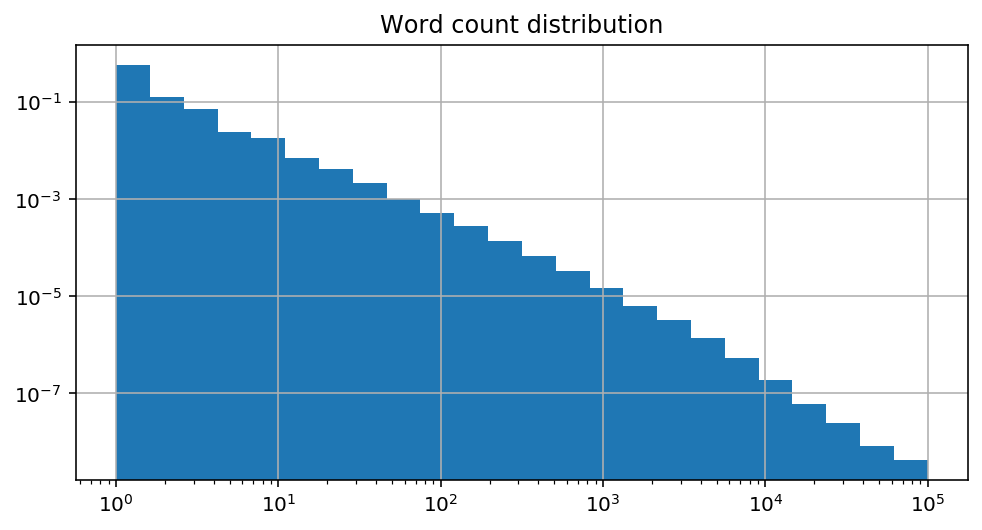

In [62]:
fig, ax = hist_counts(freq_words1)

Note above that many of the most common words actually may not be relevant to determining wine language.
I used 'stop_words' inside the CountVectorizer because I am going to eliminate most of the common words like 'and', 'the', 'of'... and so on.

In [63]:
cvec2 = CountVectorizer(strip_accents='unicode',
                       stop_words="english", 
                       ngram_range=(1, 1))

X_all2 = cvec2.fit_transform(vino['description'])
columns2 = cvec2.get_feature_names()
X_all2

<131902x31065 sparse matrix of type '<class 'numpy.int64'>'
	with 3136926 stored elements in Compressed Sparse Row format>

In [64]:
def get_freq_words(sparse_counts, columns):

    word_counts = np.ravel(X_all2.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words




freq_words2 = get_freq_words(X_all2, columns2)
freq_words2[:20]

wine       80105
flavors    65244
fruit      50187
palate     42946
aromas     42593
finish     36671
acidity    35379
drink      32117
tannins    32040
cherry     30655
black      30531
ripe       27550
red        22691
notes      19623
spice      19449
nose       19381
oak        18903
berry      17693
rich       17449
fresh      17264
dtype: int64

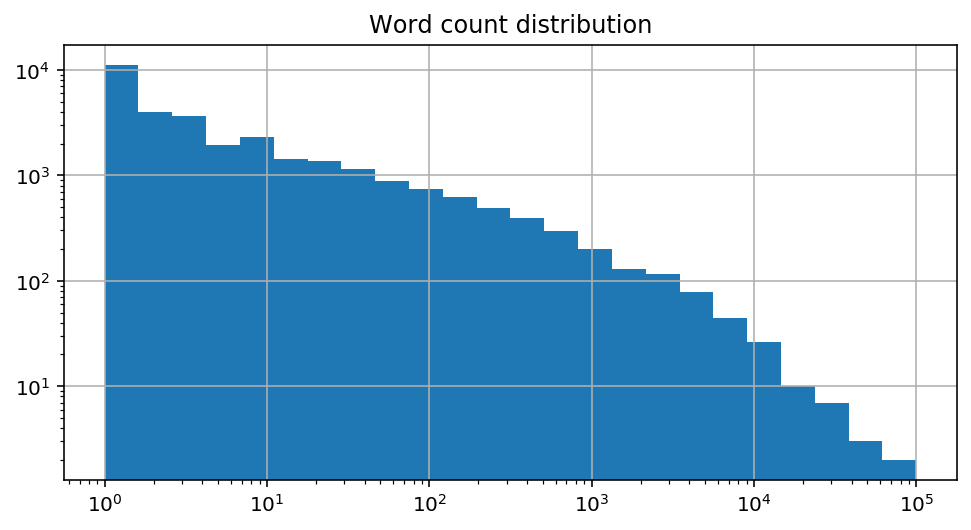

In [65]:
fig, ax = hist_counts(freq_words2, density=False)

The frequence of the words after remove some of the common words that they are not relative with wine language, are huge.

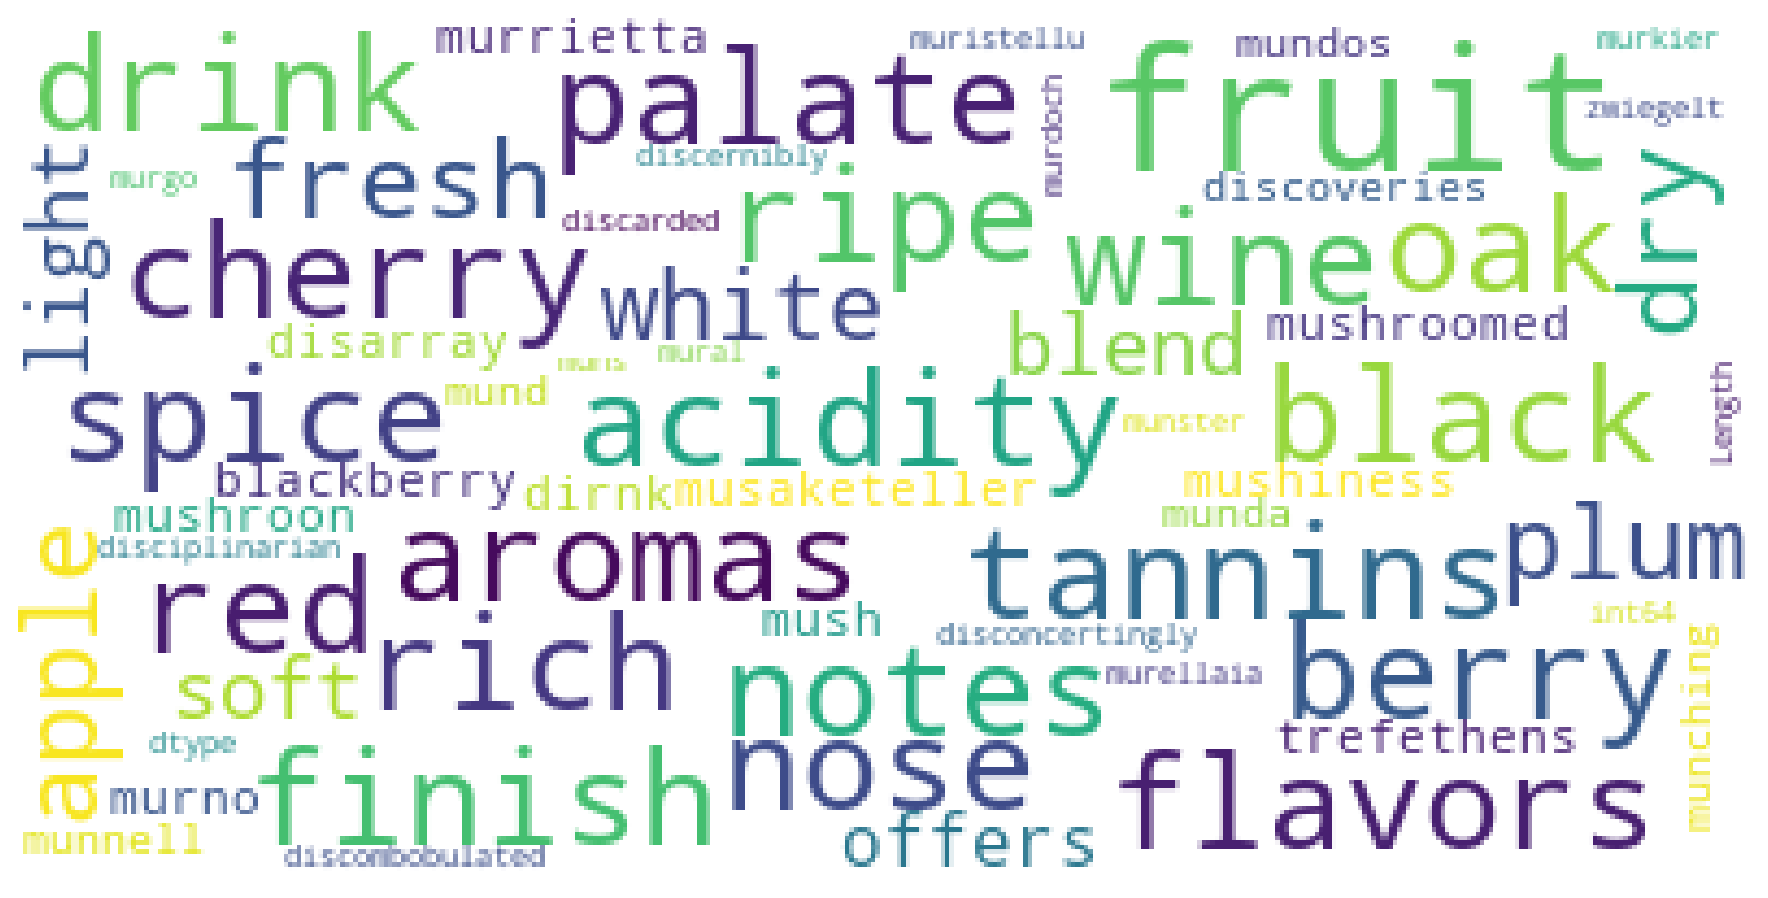

In [66]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(freq_words2))

print(wordcloud)
fig = plt.figure(figsize = (18, 8),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [67]:
wine_mask = np.array(Image.open("wine_mask_3.png"))
# Values of 255 are pure white, whereas values of 1 are black
# I used the transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [68]:
#Transform the mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
#Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

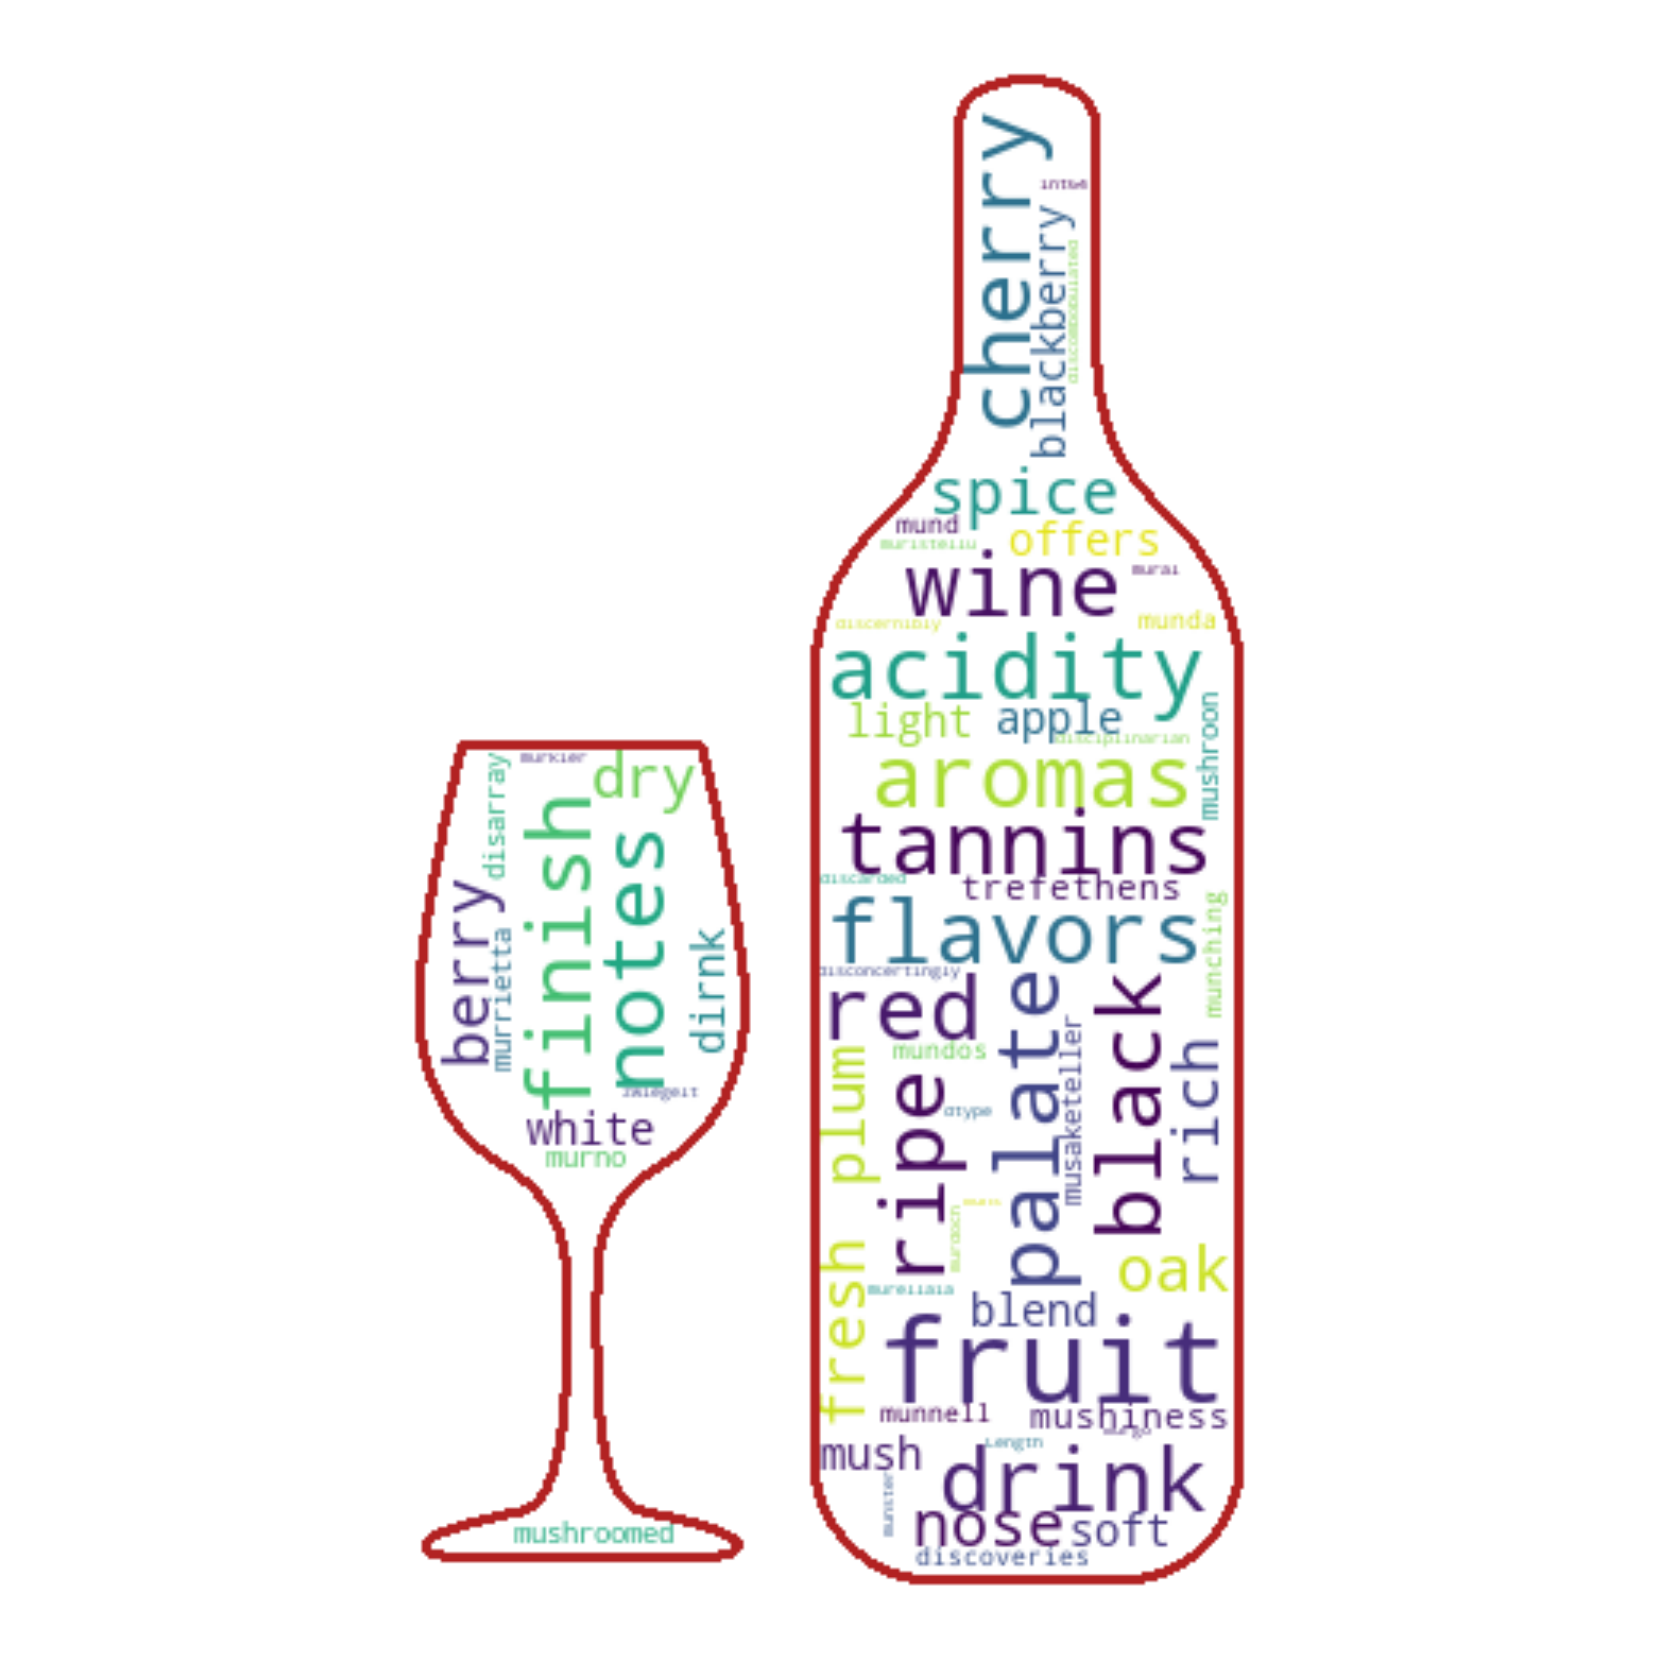

In [69]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(str(freq_words2))

# store to file
wc.to_file("./wine_mask_big.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

 After the EDA I realised that I could get better my models doing same improves in the data.:
-  I have 743 different types of grapes, in the big data set and 542 in the small data set, maybe I could group some of them.
- I would like to check if there are some mistakes in the spelling of some words in the description. 
- I would like to reduce the number of countries and varieties, using only the most representatives.

In realtion with the results from de small and big data set do not differ so much. The most frequently word are similar. Both of them have some outliers in the prices and points. They differ a little bit in the maximum values but it’s normal for the huge difference of rows.

The models I would like to use for this project will be:
-	CountVectoriazer
-	TfidfVectorizer
-	LogisticRegression
-	RandomForestClassifier
-	Native Bayes
-	SVM

And If I have time I will also use:
-	KNeighborsClassifier
-	DecisionTreeClassifier
-	Word2Vect
-	ExtraTreesClassifier

I would like to use GridSearch to find the best parameters.

### BASELINE

#### SMALL DATASET

In [70]:
print('The baselines of  my features are:')
print('The country baseline is', df.country.value_counts(normalize=True).max())
print('The variety baseline is', df.variety.value_counts(normalize=True).max())
print('The province baseline is', df.province.value_counts(normalize=True).max())

The baselines of  my features are:
The country baseline is 0.3593197943297044
The variety baseline is 0.1092663870856552
The province baseline is 0.024616533578445454


#### BIG DATASET

In [71]:
print('The baselines of my features are:')
print('The country baseline is', vino.country.value_counts(normalize=True).max())
print('The variety baseline is', vino.variety.value_counts(normalize=True).max())
print('The province baseline is', vino.province.value_counts(normalize=True).max())

The baselines of my features are:
The country baseline is 0.4436020682021501
The variety baseline is 0.10773989583096413
The province baseline is 0.2948097830207275


The targets for my models will be the country, the variety and the province.

In [72]:
df.to_csv('small_wineV1.csv', index=False)

In [73]:
vino.to_csv('big_wineV1.csv', index=False)